In [1]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from numba import njit, prange
import image_processing
import unittest
import matplotlib.patches as mpatches

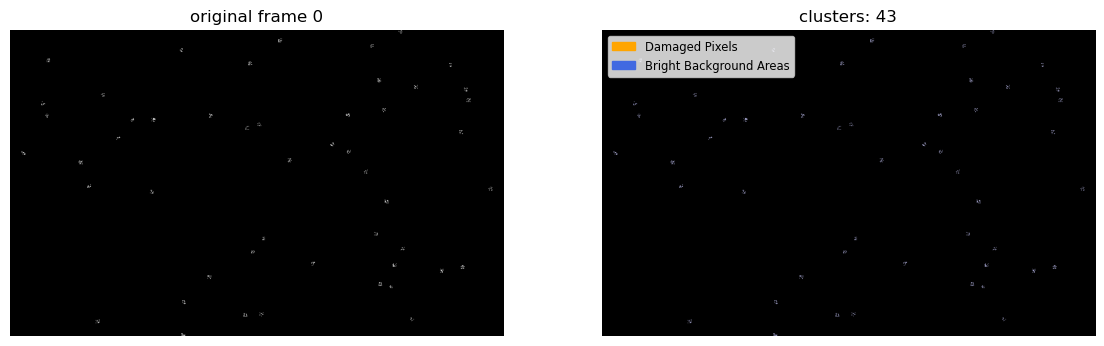

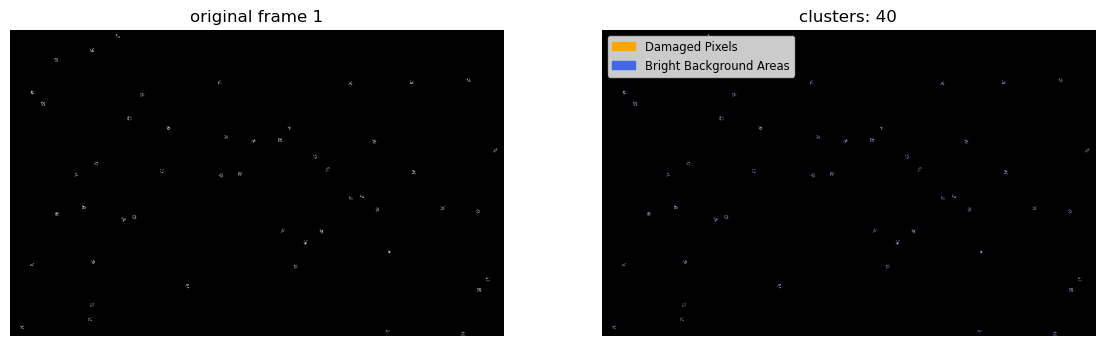

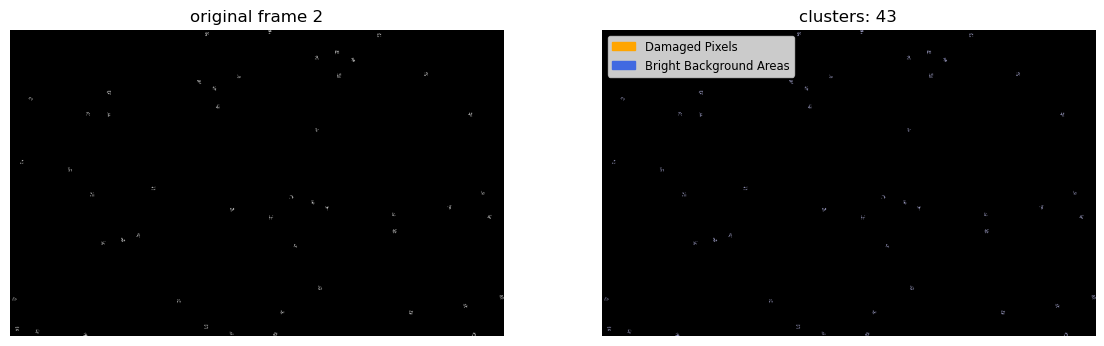

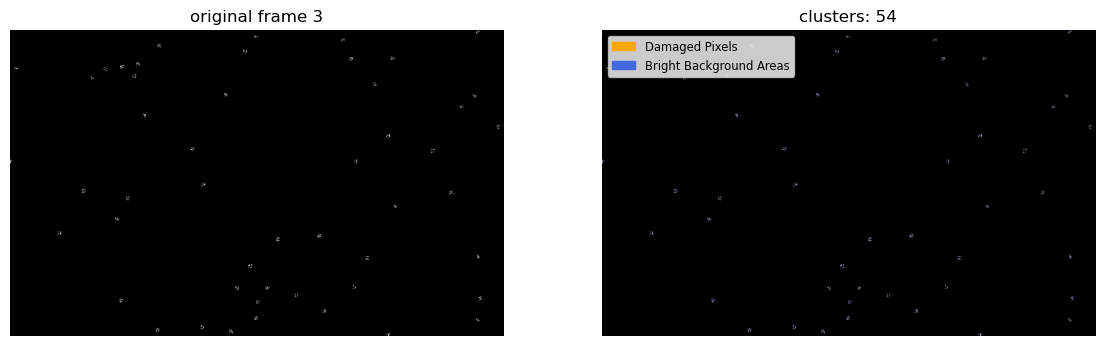

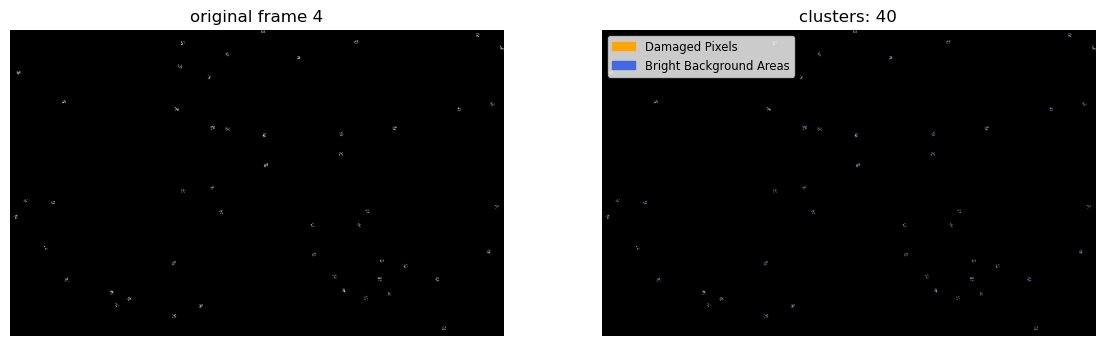

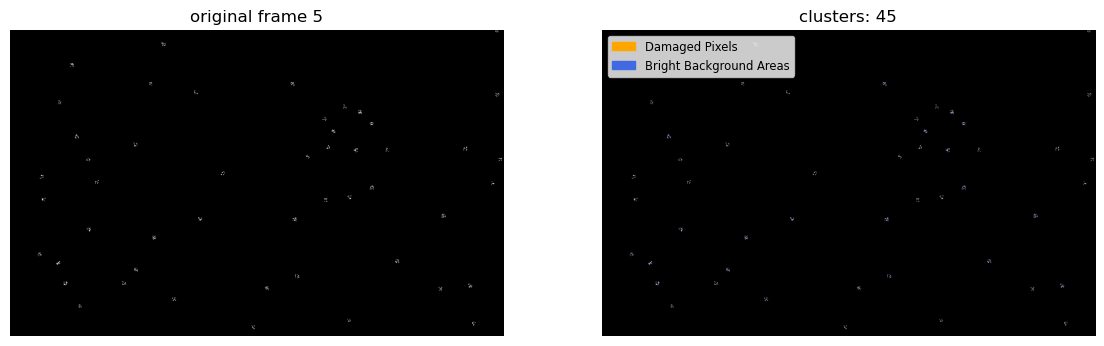

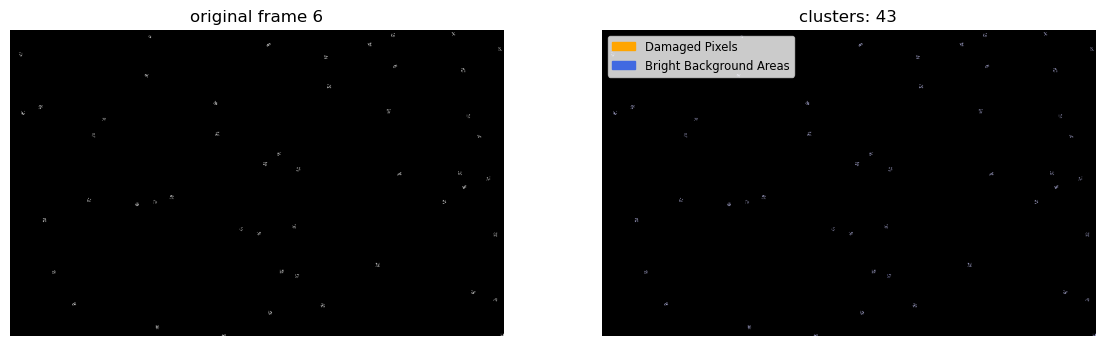

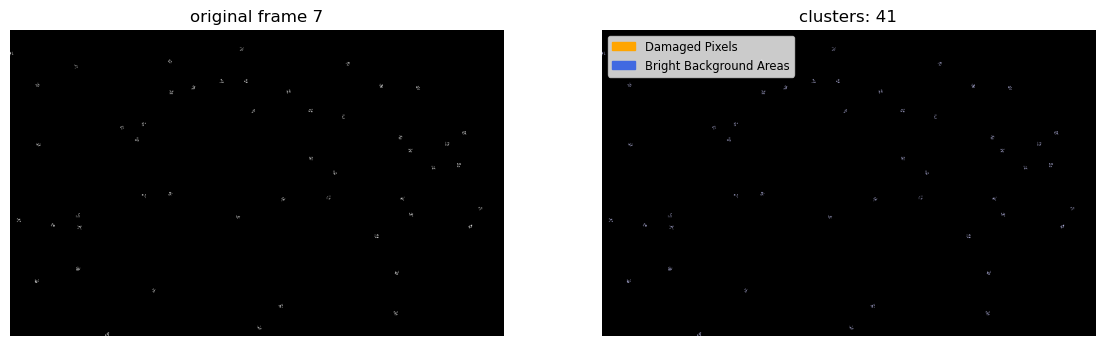

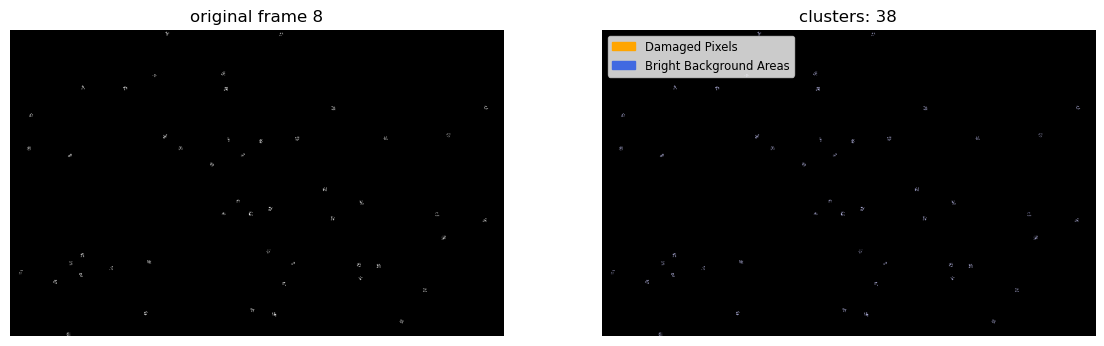

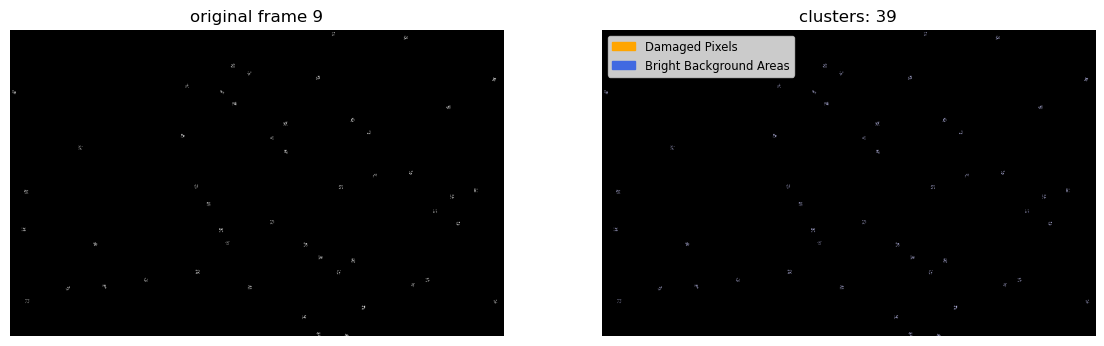

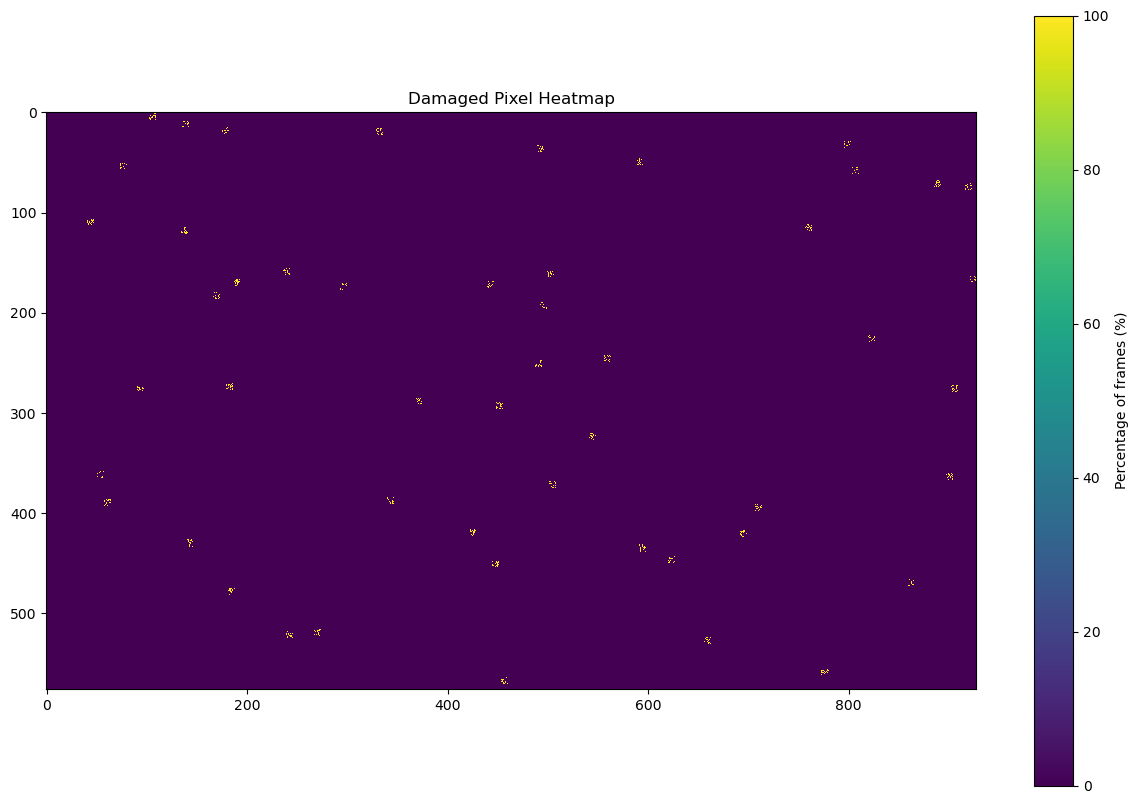

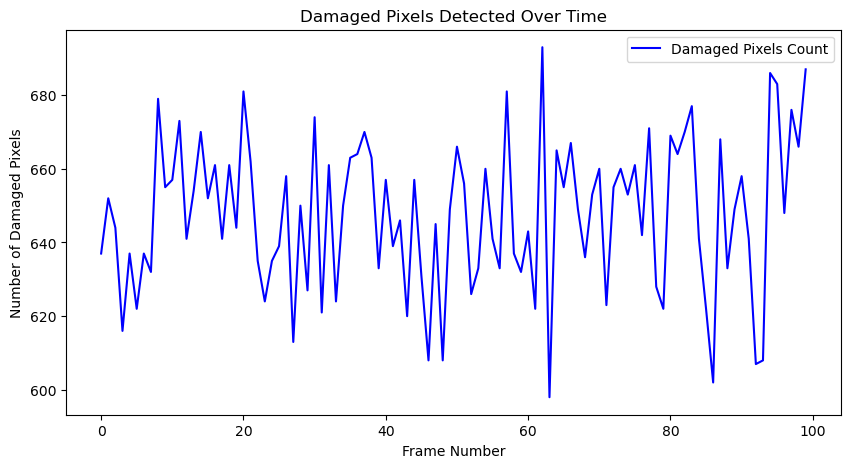

In [2]:
test, _ = image_processing.create_clustered_test_video()
test_pixels = image_processing.detect_damaged_pixels(test, plot = True, consecutive_threshold = 2, brightness_threshold = 140, flow_threshold = 1, number_of_plots=10)

In [3]:
class TestTemporalDamageFiltering(unittest.TestCase):
    def test_long_lasting_damaged_pixels(self):
    
        num_frames = 20
        width, height = 100, 80
        damaged_pixel_count = 30
        duration = 10
        consecutive_threshold = 2

        frames, _ = image_processing.create_temporal_test_video(
            num_frames,
            width,
            height,
            damaged_pixel_count = damaged_pixel_count,
            duration = duration,
            background_intensity = 0
        )

        counts = image_processing.detect_damaged_pixels(
            frames,
            plot = False,
            consecutive_threshold = consecutive_threshold
        )

        self.assertTrue(
            all(c == 0 for c in counts),
            f"expected zero counts when duration > {consecutive_threshold}, got {counts}"
        )

if __name__ == "__main__":
    unittest.main(argv = [""], exit = False)

F
FAIL: test_long_lasting_damaged_pixels (__main__.TestTemporalDamageFiltering.test_long_lasting_damaged_pixels)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\prw67787\AppData\Local\Temp\ipykernel_22048\1010040482.py", line 25, in test_long_lasting_damaged_pixels
    self.assertTrue(
AssertionError: False is not true : expected zero counts when duration > 2, got ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

----------------------------------------------------------------------
Ran 1 test in 0.137s

FAILED (failures=1)


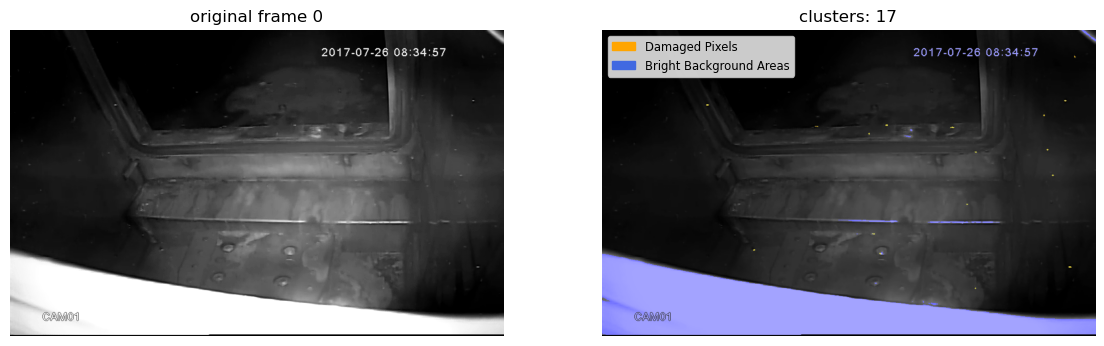

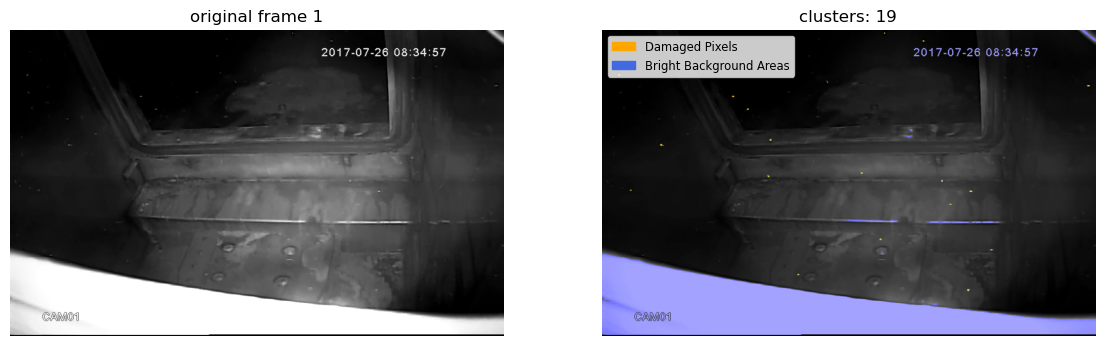

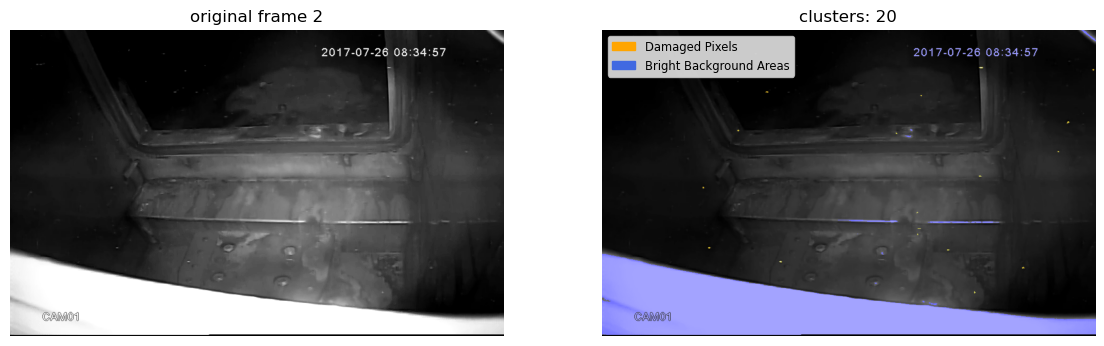

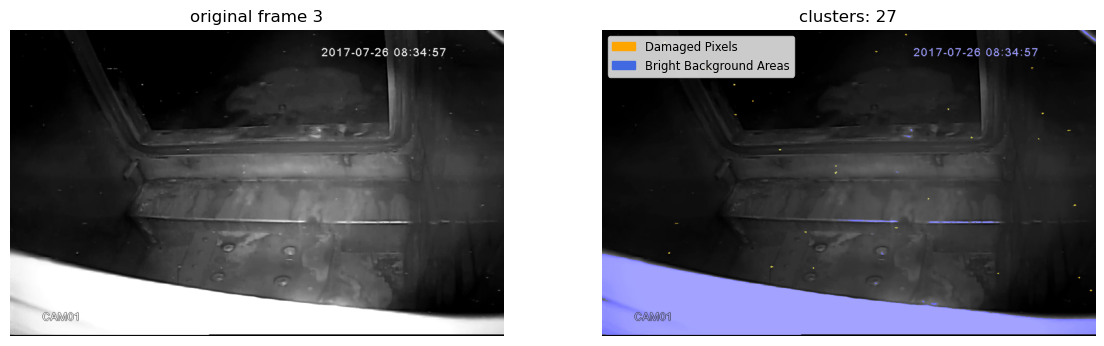

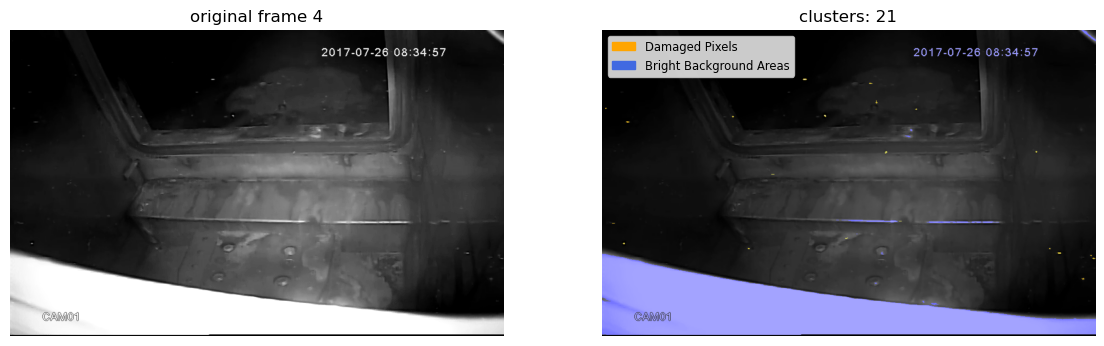

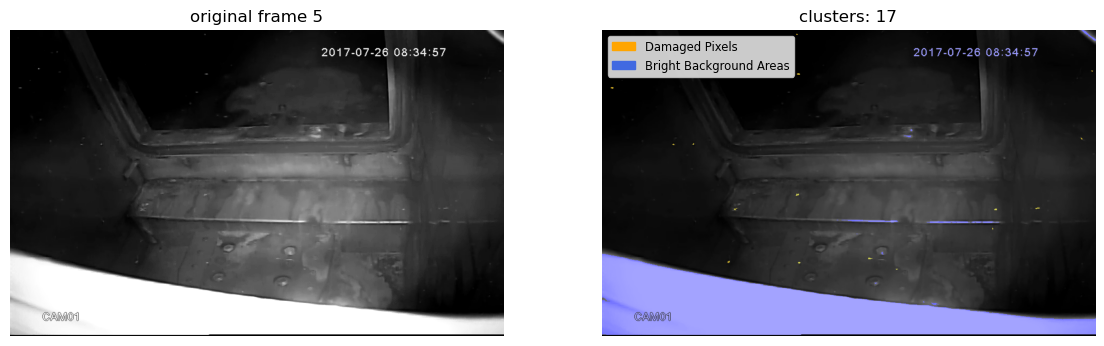

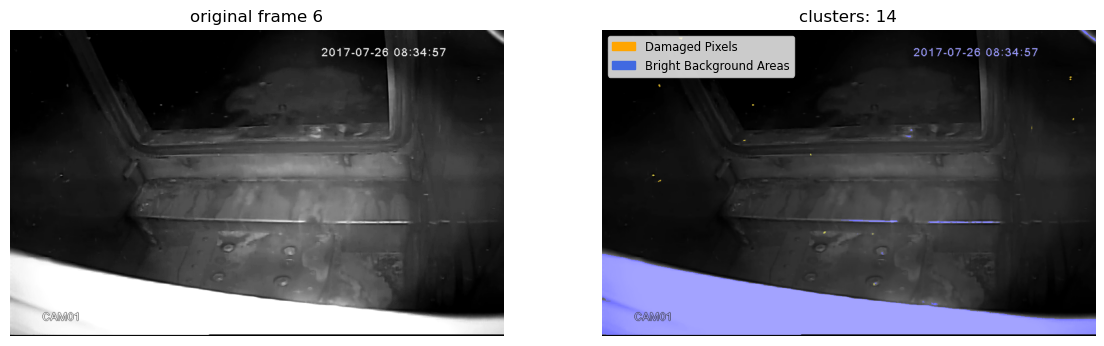

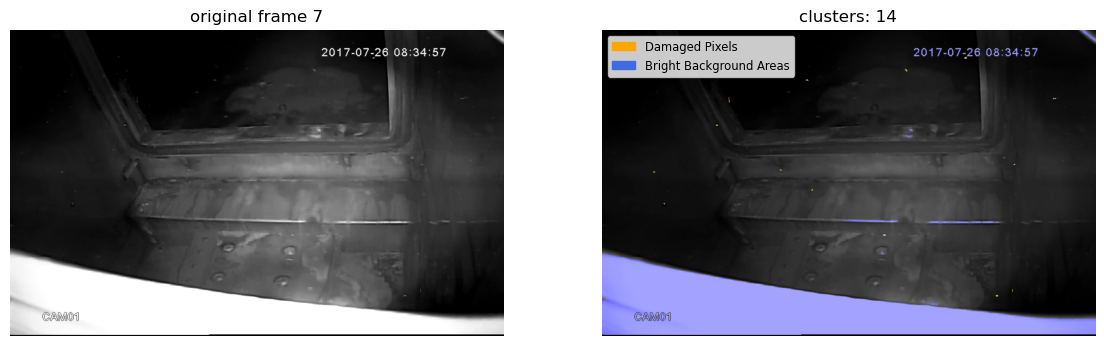

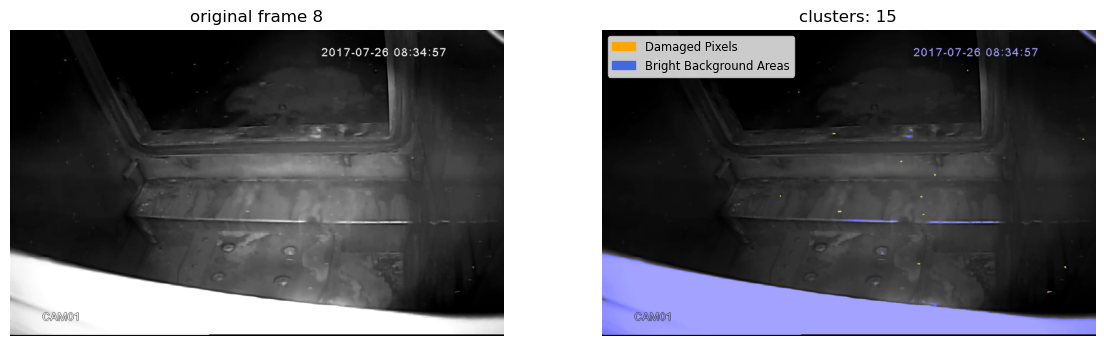

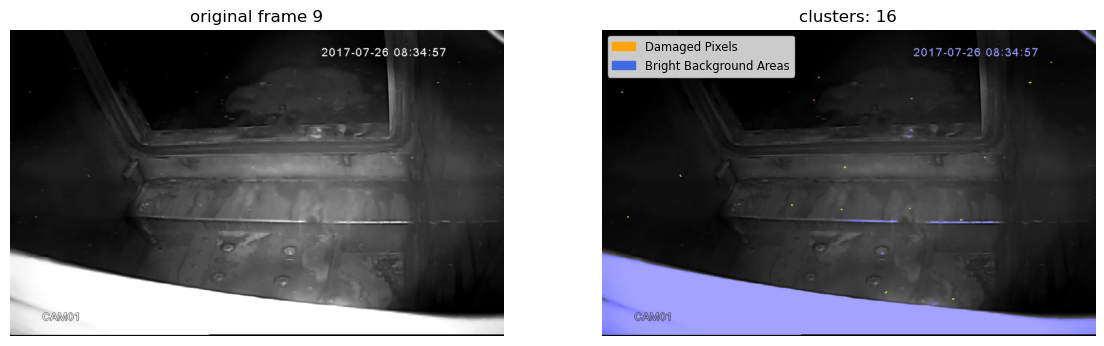

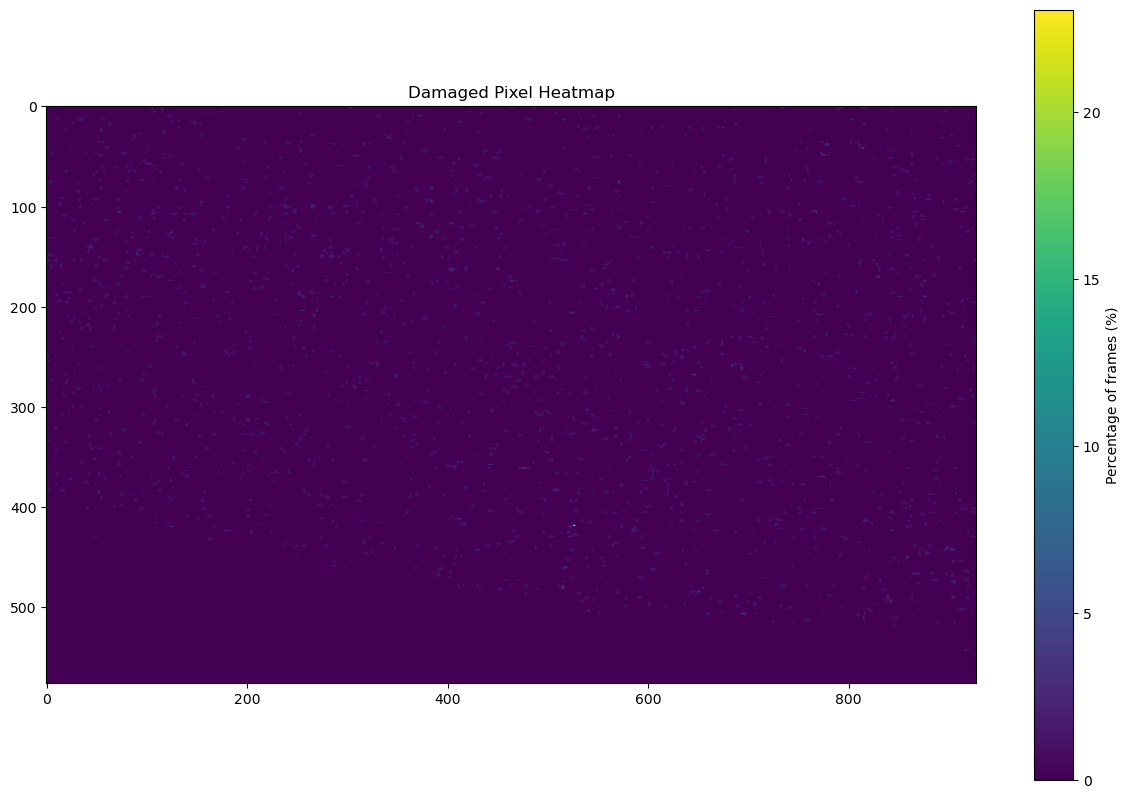

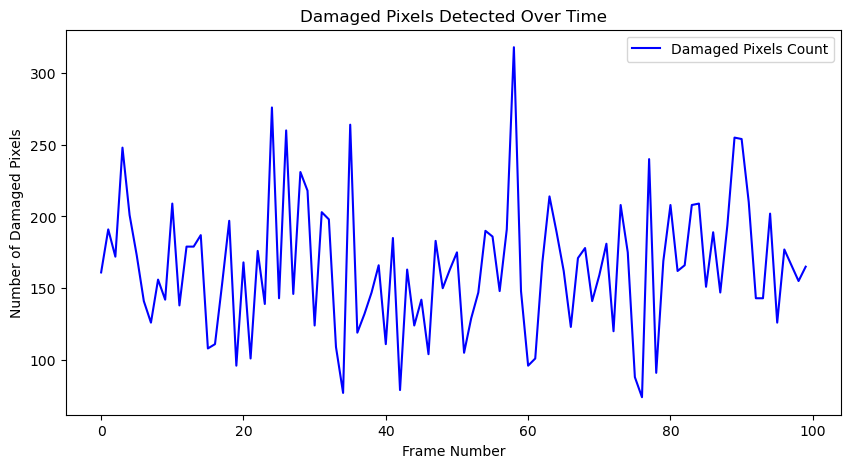

In [4]:
frame_threshold_low = 25000
frame_threshold_high = 25100

video_filename = "11_01_H_170726081325.avi"
frames = image_processing.load_video_frames(video_filename, frames_start = frame_threshold_low, frames_end = frame_threshold_high)
damaged_pixels = image_processing.detect_damaged_pixels(frames, plot = True, consecutive_threshold = 2, brightness_threshold = 170, flow_threshold = 1, number_of_plots=10)
     

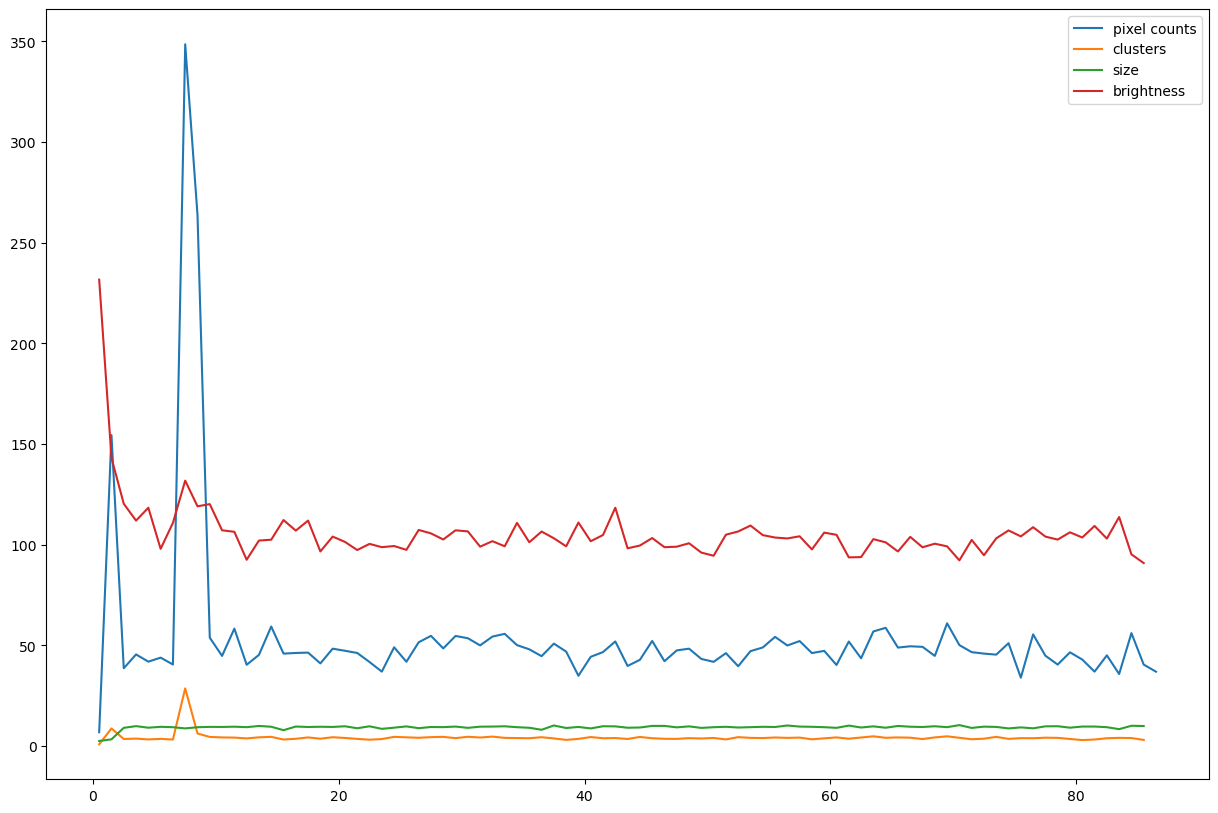

In [5]:
fig = plt.figure(figsize = (15, 10))
times = [ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5,
 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5,
 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5,
 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5,
 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5,
 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5,
 84.5, 85.5, 86.5,]
counts = [6.818181818181818, 154.4090909090909, 38.59090909090909, 45.45454545454545, 41.86363636363637, 43.86363636363637, 40.45454545454545, 348.59090909090907, 263.8181818181818, 53.77272727272727, 44.72727272727273, 58.27272727272727, 40.31818181818182, 45.22727272727273, 59.31818181818182, 45.86363636363637, 46.18181818181818, 46.36363636363637, 41.0, 48.31818181818182, 47.27272727272727, 46.18181818181818, 41.68181818181818, 36.90909090909091, 49.0, 41.81818181818182, 51.5, 54.68181818181818, 48.45454545454545, 54.63636363636363, 53.5, 49.95454545454545, 54.31818181818182, 55.68181818181818, 50.09090909090909, 48.0, 44.59090909090909, 50.81818181818182, 46.86363636363637, 34.86363636363637, 44.27272727272727, 46.63636363636363, 51.90909090909091, 39.72727272727273, 42.77272727272727, 52.13636363636363, 42.09090909090909, 47.45454545454545, 48.31818181818182, 43.22727272727273, 41.77272727272727, 46.09090909090909, 39.59090909090909, 47.09090909090909, 48.90909090909091, 54.18181818181818, 49.90909090909091, 52.09090909090909, 46.13636363636363, 47.22727272727273, 40.22727272727273, 51.86363636363637, 43.54545454545455, 56.86363636363637, 58.68181818181818, 48.86363636363637, 49.5, 49.22727272727273, 44.72727272727273, 60.90909090909091, 50.09090909090909, 46.59090909090909, 45.86363636363637, 45.36363636363637, 51.04545454545455, 33.90909090909091, 55.40909090909091, 44.81818181818182, 40.40909090909091, 46.5, 42.90909090909091, 36.90909090909091, 45.0, 35.72727272727273, 56.04545454545455, 40.40909090909091, 36.875]
clusters = [0.8181818181818182, 8.681818181818182, 3.4545454545454546, 3.6363636363636362, 3.227272727272727, 3.5, 3.1818181818181817, 28.59090909090909, 6.181818181818182, 4.454545454545454, 4.2272727272727275, 4.136363636363637, 3.727272727272727, 4.2727272727272725, 4.5, 3.1818181818181817, 3.5454545454545454, 4.2272727272727275, 3.590909090909091, 4.318181818181818, 3.9545454545454546, 3.5, 3.090909090909091, 3.409090909090909, 4.5, 4.2727272727272725, 4.045454545454546, 4.363636363636363, 4.5, 3.8636363636363638, 4.545454545454546, 4.181818181818182, 4.636363636363637, 4.0, 3.909090909090909, 3.8181818181818183, 4.318181818181818, 3.727272727272727, 3.0, 3.5, 4.409090909090909, 3.8181818181818183, 3.909090909090909, 3.4545454545454546, 4.454545454545454, 3.8181818181818183, 3.5454545454545454, 3.5, 3.8636363636363638, 3.6818181818181817, 3.9545454545454546, 3.227272727272727, 4.363636363636363, 4.0, 3.909090909090909, 4.181818181818182, 4.0, 4.136363636363637, 3.272727272727273, 3.772727272727273, 4.2272727272727275, 3.590909090909091, 4.181818181818182, 4.7727272727272725, 4.045454545454546, 4.2272727272727275, 4.090909090909091, 3.409090909090909, 4.2272727272727275, 4.7727272727272725, 4.045454545454546, 3.3181818181818183, 3.590909090909091, 4.5, 3.5, 3.8636363636363638, 3.8181818181818183, 4.090909090909091, 4.0, 3.4545454545454546, 2.909090909090909, 3.1818181818181817, 3.8181818181818183, 4.0, 3.909090909090909, 3.0]
size = [2.4621212121212124, 3.271754476584022, 8.99237012987013, 9.83409090909091, 9.052272727272728, 9.493181818181819, 9.31060606060606, 8.70566562698652, 9.288852813852813, 9.461688311688311, 9.426515151515153, 9.556439393939392, 9.321320346320347, 9.915909090909091, 9.536363636363635, 7.8212121212121195, 9.632900432900435, 9.406926406926408, 9.523484848484848, 9.43306277056277, 9.76060606060606, 8.782954545454546, 9.750757575757575, 8.483225108225108, 9.06720779220779, 9.698809523809523, 8.815386002886004, 9.401911976911975, 9.334794372294372, 9.617893217893217, 8.982738095238094, 9.561580086580086, 9.617207792207791, 9.754545454545454, 9.304924242424242, 9.022781385281386, 8.018560606060605, 10.163690476190476, 8.908549783549784, 9.422077922077923, 8.701839826839828, 9.777922077922078, 9.710930735930736, 9.041666666666668, 9.153517316017316, 9.939177489177489, 9.948863636363638, 9.228030303030302, 9.713419913419914, 8.958333333333334, 9.295670995670996, 9.502020202020203, 9.146969696969698, 9.316991341991342, 9.499621212121212, 9.406277056277055, 10.141341991341992, 9.614556277056277, 9.504437229437228, 9.308658008658009, 8.990422077922078, 10.097077922077922, 9.154329004329002, 9.719949494949496, 9.040151515151516, 9.912987012987013, 9.54368686868687, 9.40340909090909, 9.775324675324676, 9.323106060606062, 10.339880952380954, 8.946861471861473, 9.581493506493507, 9.440151515151515, 8.694155844155844, 9.205194805194806, 8.749837662337663, 9.737373737373737, 9.78308080808081, 9.070616883116884, 9.621969696969698, 9.62689393939394, 9.312662337662339, 8.327597402597403, 10.01017316017316, 9.889215686274511]
brightness = [231.6625, 143.0614857615147, 120.31025036164502, 111.94627309768492, 118.34319571077627, 97.91191801763469, 110.79757367886924, 131.79657191673277, 119.04746589963909, 120.13120374756905, 107.13012909200957, 106.37805677178395, 92.4835012027187, 102.03782374268256, 102.46037333027729, 112.21991201712707, 106.96460726585818, 111.94831576996194, 96.62645851755143, 103.99705245703097, 101.35886024316096, 97.32519576746692, 100.38045189409158, 98.74172026242174, 99.31885450193103, 97.41202197297484, 107.30228540500066, 105.58700108983344, 102.56003377339495, 107.12041050683483, 106.58527068574789, 99.00265133199278, 101.72511177474513, 99.18227113283069, 110.81227188004435, 101.19280276765527, 106.50885383894449, 103.1759976150954, 99.1703155192865, 110.97957436412422, 101.69840011963053, 104.79110200387217, 118.35220507999688, 98.17630430815444, 99.54939157265909, 103.2717302257417, 98.74065781848293, 98.97828308255004, 100.69632071731738, 96.0465196601523, 94.48047185919644, 104.93971622657577, 106.54256840843696, 109.48461150133708, 104.740559376451, 103.52409693848368, 103.07520168095444, 104.14981422377159, 97.62632723877414, 105.97792963293956, 104.8822845914978, 93.6740246146905, 93.81548859350164, 102.7283735269043, 101.15088764843671, 96.60655694321163, 103.85418772772339, 98.69918549861451, 100.46697938976563, 99.14768348464219, 92.18682930700216, 102.34644355467049, 94.73759900705817, 103.1399029760821, 107.058401562586, 104.0920156331242, 108.66742440840873, 103.99228416220053, 102.51158297956731, 106.12426081207695, 103.54572973474842, 109.28912133089959, 103.00030150774101, 113.718217695156, 95.17992363671715, 90.84396854869735]

plt.plot(times, counts, label = 'pixel counts')
plt.plot(times[:-1], clusters, label = 'clusters')
plt.plot(times[:-1], size, label = 'size')
plt.plot(times[:-1], brightness, label = 'brightness')

plt.legend()
plt.show()

In [14]:
counts = [6.818181818181818, 154.4090909090909, 38.59090909090909, 45.45454545454545, 41.31818181818182, 43.77272727272727, 40.31818181818182, 348.54545454545456, 263.45454545454544, 52.77272727272727, 44.72727272727273, 58.27272727272727, 40.31818181818182, 44.45454545454545, 59.27272727272727, 45.77272727272727, 46.13636363636363, 46.31818181818182, 40.68181818181818, 48.22727272727273, 47.27272727272727, 46.18181818181818, 41.45454545454545, 36.90909090909091, 48.95454545454545, 41.72727272727273, 51.45454545454545, 54.77272727272727, 48.40909090909091, 54.59090909090909, 53.40909090909091, 49.86363636363637, 54.40909090909091, 55.68181818181818, 50.09090909090909, 48.0, 46.31818181818182, 50.81818181818182, 46.86363636363637, 34.81818181818182, 44.13636363636363, 46.54545454545455, 51.86363636363637, 39.72727272727273, 42.68181818181818, 52.04545454545455, 41.90909090909091, 47.22727272727273, 48.13636363636363, 42.90909090909091, 41.77272727272727, 46.09090909090909, 39.5, 46.90909090909091, 48.77272727272727, 54.18181818181818, 49.81818181818182, 52.0, 46.27272727272727, 46.81818181818182, 40.0, 51.77272727272727, 43.54545454545455, 57.04545454545455, 58.68181818181818, 48.86363636363637, 49.36363636363637, 49.04545454545455, 44.68181818181818, 60.86363636363637, 49.77272727272727, 46.5, 43.90909090909091, 45.13636363636363, 51.04545454545455, 33.90909090909091, 55.40909090909091, 44.81818181818182, 40.36363636363637, 46.40909090909091, 42.81818181818182, 36.40909090909091, 45.0, 35.68181818181818, 55.95454545454545, 40.40909090909091, 40.63636363636363, 54.13636363636363, 46.40909090909091, 46.09090909090909, 39.95454545454545, 37.68181818181818, 41.5, 47.77272727272727, 50.18181818181818, 45.63636363636363, 52.72727272727273, 45.90909090909091, 57.40909090909091, 49.59090909090909, 42.22727272727273, 49.13636363636363, 49.63636363636363, 48.27272727272727, 50.36363636363637, 45.90909090909091, 53.40909090909091, 42.77272727272727, 42.90909090909091, 41.95454545454545, 58.40909090909091, 46.54545454545455, 39.04545454545455, 45.22727272727273, 42.90909090909091, 48.72727272727273, 53.77272727272727, 48.59090909090909, 49.77272727272727, 41.72727272727273, 45.0, 43.31818181818182, 29.5, 50.59090909090909, 42.13636363636363, 40.27272727272727, 48.31818181818182, 49.81818181818182, 47.86363636363637, 49.86363636363637, 44.5, 38.72727272727273, 42.54545454545455, 47.86363636363637, 41.13636363636363, 44.81818181818182, 37.31818181818182, 47.04545454545455, 44.13636363636363, 47.04545454545455, 39.31818181818182, 53.45454545454545, 39.09090909090909, 47.04545454545455, 43.5, 56.45454545454545, 57.81818181818182, 44.68181818181818, 43.22727272727273, 55.68181818181818, 44.54545454545455, 43.54545454545455, 46.04545454545455, 54.95454545454545, 52.40909090909091, 58.09090909090909, 45.95454545454545, 42.09090909090909, 56.27272727272727, 44.36363636363637, 43.18181818181818, 48.09090909090909, 46.09090909090909, 46.59090909090909, 43.0, 55.27272727272727, 43.68181818181818, 62.86363636363637, 48.45454545454545, 55.0, 44.5, 50.81818181818182, 31.0, 40.27272727272727, 56.0, 50.04545454545455, 57.40909090909091, 48.18181818181818, 39.31818181818182, 49.77272727272727, 55.27272727272727, 39.31818181818182, 50.45454545454545, 49.27272727272727, 46.45454545454545, 53.68181818181818, 46.95454545454545, 43.54545454545455, 53.72727272727273, 44.59090909090909, 31.181818181818183, 55.31818181818182, 45.72727272727273, 38.13636363636363, 44.22727272727273, 49.68181818181818, 47.13636363636363, 49.68181818181818, 48.72727272727273, 59.31818181818182, 41.77272727272727, 42.86363636363637, 46.77272727272727, 44.31818181818182, 52.36363636363637, 54.95454545454545, 49.68181818181818, 52.86363636363637, 35.68181818181818, 59.18181818181818, 47.09090909090909, 52.72727272727273, 52.40909090909091, 51.5, 52.13636363636363, 41.27272727272727, 43.54545454545455, 51.63636363636363, 39.54545454545455, 39.13636363636363, 49.31818181818182, 62.31818181818182, 39.59090909090909, 50.36363636363637, 65.54545454545455, 57.09090909090909, 43.13636363636363, 38.72727272727273, 56.27272727272727, 44.09090909090909, 45.22727272727273, 42.09090909090909, 52.54545454545455, 49.13636363636363, 48.45454545454545, 36.63636363636363, 57.0, 42.36363636363637, 57.45454545454545, 492.59090909090907, 681.8181818181819, 716.5, 674.7727272727273, 584.4545454545455, 803.9090909090909, 776.3181818181819, 1025.7272727272727, 840.1818181818181, 1088.3181818181818, 864.3636363636364, 716.1363636363636, 1017.9090909090909, 860.5, 721.3181818181819, 640.7727272727273, 669.0, 746.3181818181819, 898.0909090909091, 1095.8636363636363, 1130.0454545454545, 862.1363636363636, 1029.7727272727273, 1190.6818181818182, 858.5909090909091, 812.0, 967.7272727272727, 930.5454545454545, 766.0909090909091, 725.5909090909091, 692.1363636363636, 588.0, 600.5909090909091, 559.6363636363636, 490.59090909090907, 518.3181818181819, 546.7272727272727, 478.5, 587.5909090909091, 593.5454545454545, 668.9545454545455, 785.0, 752.2727272727273, 907.2727272727273, 1003.4545454545455, 790.6363636363636, 991.0, 1170.8636363636363, 1242.8636363636363, 918.8181818181819, 1050.590909090909, 1245.4545454545455, 1121.1363636363637, 1414.1818181818182, 1219.8181818181818, 1225.2272727272727, 1427.5, 1366.3636363636363, 1111.8636363636363, 830.1818181818181, 573.8636363636364, 352.45454545454544, 241.27272727272728, 212.72727272727272, 1058.7272727272727, 1437.6818181818182, 1301.590909090909, 1084.2727272727273, 1178.8181818181818, 807.3181818181819, 602.7272727272727, 556.5909090909091, 616.8181818181819, 640.0, 717.1363636363636, 1001.8181818181819, 1544.2727272727273, 1569.9545454545455, 1355.5454545454545, 1671.2727272727273, 1425.9545454545455, 1500.2272727272727, 1726.4545454545455, 1406.2272727272727, 1175.0454545454545, 1186.590909090909, 971.7727272727273, 722.6363636363636, 499.90909090909093, 1014.5, 1029.5, 1015.5909090909091, 903.8181818181819, 753.1818181818181, 723.0, 604.6363636363636, 560.4090909090909, 784.0, 637.2727272727273, 629.9545454545455, 574.9545454545455, 581.5909090909091, 407.04545454545456, 458.6818181818182, 547.6818181818181, 506.27272727272725, 321.8636363636364, 378.0, 455.59090909090907, 468.6363636363636, 418.90909090909093, 437.8636363636364, 467.6818181818182, 361.59090909090907, 248.5, 371.3181818181818, 394.22727272727275, 391.72727272727275, 374.04545454545456, 443.1818181818182, 420.09090909090907, 365.5, 446.8181818181818, 597.5909090909091, 858.8181818181819, 1136.8181818181818, 782.0454545454545, 608.2272727272727, 497.5, 454.3636363636364, 519.8181818181819, 944.4090909090909, 846.7727272727273, 1128.4545454545455, 1097.0454545454545, 1215.3636363636363, 1180.409090909091, 973.1363636363636, 837.1818181818181, 682.4545454545455, 622.0454545454545, 632.9090909090909, 611.2272727272727, 629.0, 603.1818181818181, 643.1818181818181, 614.2727272727273, 615.4545454545455, 616.6818181818181, 613.3636363636364, 600.8181818181819, 608.6818181818181, 670.8636363636364, 587.0, 714.8636363636364, 1023.5909090909091, 905.6818181818181, 810.3636363636364, 771.6818181818181, 945.6363636363636, 1214.2272727272727, 1098.9545454545455, 909.2727272727273, 1198.409090909091, 932.9545454545455, 702.5, 702.9545454545455, 1196.2272727272727, 644.9090909090909, 635.5909090909091, 859.9090909090909, 958.2727272727273, 871.2272727272727, 787.5, 870.1363636363636, 831.8636363636364, 713.7727272727273, 713.4090909090909, 682.7727272727273, 733.0454545454545, 678.0454545454545, 728.7727272727273, 998.6363636363636, 884.6363636363636, 660.6818181818181, 558.3636363636364, 558.8181818181819, 720.3181818181819, 782.8181818181819, 837.6363636363636, 872.2727272727273, 911.0909090909091, 1054.4545454545455, 1046.590909090909, 982.6363636363636, 968.2272727272727, 999.2272727272727, 903.9545454545455, 813.2272727272727, 675.0, 635.5, 860.1818181818181, 804.4090909090909, 1004.8636363636364, 895.9545454545455, 485.3181818181818, 811.7727272727273, 1085.0, 1075.8181818181818, 980.2727272727273, 964.7272727272727, 795.8636363636364, 708.1363636363636, 725.9090909090909, 641.4090909090909, 565.0454545454545, 587.7727272727273, 487.3181818181818, 567.5454545454545, 752.6363636363636, 725.8181818181819, 609.5454545454545, 567.0, 696.8181818181819, 710.2727272727273, 717.8181818181819, 688.7727272727273, 741.4545454545455, 761.6363636363636, 822.2727272727273, 648.9090909090909, 557.0, 503.5, 429.09090909090907, 391.1363636363636, 384.45454545454544, 349.90909090909093, 307.22727272727275, 341.3636363636364, 334.1818181818182, 328.8181818181818, 330.72727272727275, 753.0909090909091, 774.2272727272727, 828.1363636363636, 813.1363636363636, 612.0909090909091, 502.0, 414.45454545454544, 408.95454545454544, 720.5909090909091, 754.2727272727273, 899.1363636363636, 823.4090909090909, 745.9090909090909, 634.8181818181819, 487.6363636363636, 432.8181818181818, 399.09090909090907, 367.8181818181818, 403.77272727272725, 532.8181818181819, 650.6818181818181, 486.95454545454544, 836.5909090909091, 714.2727272727273, 654.0, 885.1363636363636, 949.9545454545455, 1040.6363636363637, 905.9090909090909, 873.0, 955.7727272727273, 778.5909090909091, 616.0, 484.72727272727275, 434.6818181818182, 447.54545454545456, 432.6363636363636, 392.72727272727275, 405.54545454545456, 412.0, 437.90909090909093, 388.27272727272725, 494.1363636363636, 933.6363636363636, 877.8181818181819, 1008.4090909090909, 992.7272727272727, 1015.5454545454545, 1047.6818181818182, 1046.8636363636363, 1019.2727272727273, 1220.8636363636363, 832.3181818181819, 608.0454545454545, 1082.590909090909, 1072.3636363636363, 960.2727272727273, 970.4090909090909, 1042.090909090909, 992.4545454545455, 800.0909090909091, 737.8636363636364, 641.1818181818181, 670.8181818181819, 651.2272727272727, 589.3181818181819, 598.9545454545455, 610.1363636363636, 569.1818181818181, 599.8636363636364, 731.3636363636364, 712.6363636363636, 809.3636363636364, 724.6818181818181, 828.0909090909091, 822.6818181818181, 985.0454545454545, 849.1818181818181, 990.9090909090909, 952.7727272727273, 912.3181818181819, 941.2727272727273, 903.1363636363636, 607.0909090909091, 531.7727272727273, 560.7272727272727, 550.9090909090909, 650.8181818181819, 616.0, 632.2272727272727, 540.5454545454545, 630.9545454545455, 386.45454545454544, 124.22727272727273, 115.68181818181819, 114.54545454545455, 111.95454545454545, 117.54545454545455, 113.0, 123.4090909090909, 116.0909090909091, 107.77272727272727, 99.31818181818181, 104.5909090909091, 88.95454545454545, 123.54545454545455, 110.13636363636364, 114.5, 101.27272727272727, 121.13636363636364, 103.13636363636364, 108.4090909090909, 115.77272727272727, 96.31818181818181, 113.86363636363636, 86.77272727272727, 125.0909090909091, 90.54545454545455, 106.9090909090909, 108.22727272727273, 131.95454545454547, 99.0, 96.13636363636364, 112.77272727272727, 112.54545454545455, 95.95454545454545, 101.31818181818181, 110.5, 107.13636363636364, 116.4090909090909, 124.5909090909091, 218.6818181818182, 156.6818181818182, 124.77272727272727, 244.27272727272728, 94.63636363636364, 89.0, 91.81818181818181, 94.5, 79.86363636363636, 76.4090909090909, 89.5909090909091, 87.31818181818181, 96.0909090909091, 72.81818181818181, 117.77272727272727, 141.0, 98.0909090909091, 171.0, 168.5909090909091, 136.3181818181818, 66.22727272727273, 57.54545454545455, 56.86363636363637, 69.45454545454545, 67.5909090909091, 60.31818181818182, 72.4090909090909, 342.5, 470.54545454545456, 485.8181818181818, 470.09090909090907, 521.4545454545455, 482.3181818181818, 597.5, 962.0454545454545, 999.1363636363636, 988.4545454545455, 825.5454545454545, 980.7272727272727, 943.8636363636364, 1059.7272727272727, 897.7272727272727, 948.0, 731.6363636363636, 560.6363636363636, 512.0, 485.6363636363636, 506.95454545454544, 522.4545454545455, 484.77272727272725, 512.1818181818181, 489.04545454545456, 485.95454545454544, 525.0, 497.27272727272725, 504.3636363636364, 544.8636363636364, 562.8181818181819, 490.8636363636364, 632.8636363636364, 549.2272727272727, 530.5909090909091, 721.5454545454545, 1031.1818181818182, 806.6818181818181, 830.2727272727273, 677.6818181818181, 625.4545454545455, 615.6363636363636, 707.5909090909091, 827.9090909090909, 715.2272727272727, 688.2272727272727, 1030.1363636363637, 883.8181818181819, 987.3181818181819, 977.8181818181819, 748.6818181818181, 665.0909090909091, 642.0, 584.5, 559.6818181818181, 549.0454545454545, 496.59090909090907, 505.90909090909093, 516.6363636363636, 505.27272727272725, 570.5, 650.7272727272727, 616.5909090909091, 520.9545454545455, 719.1818181818181, 883.0909090909091, 763.4090909090909, 698.5454545454545, 628.4090909090909, 633.5454545454545, 568.4090909090909, 514.9090909090909, 523.0454545454545, 585.9545454545455, 633.4545454545455, 577.0, 640.3181818181819, 609.2727272727273, 521.7272727272727, 666.6363636363636, 520.6363636363636, 476.6363636363636, 529.0, 550.0, 510.09090909090907, 506.22727272727275, 490.72727272727275, 517.1818181818181, 527.9090909090909, 518.9545454545455, 530.1818181818181, 532.0909090909091, 550.9090909090909, 488.72727272727275, 515.0, 530.7272727272727, 577.1363636363636, 689.9090909090909, 905.3181818181819, 732.1363636363636, 715.6363636363636, 793.7272727272727, 813.6363636363636, 1210.590909090909, 847.5454545454545, 954.8181818181819, 1204.5, 785.3636363636364, 793.7727272727273, 688.8636363636364, 625.0454545454545, 1064.2727272727273, 1111.0454545454545, 1094.090909090909, 1127.090909090909, 813.5, 926.7727272727273, 693.4545454545455, 687.2272727272727, 1076.5454545454545, 888.6363636363636, 760.5, 721.1818181818181, 639.8181818181819, 762.5909090909091, 782.0, 846.1363636363636, 835.5909090909091, 843.3636363636364, 695.1818181818181, 681.4090909090909, 701.5, 892.0, 1080.5454545454545, 1089.8636363636363, 907.9090909090909, 1009.3181818181819, 718.3636363636364, 862.4090909090909, 1128.5454545454545, 898.3181818181819, 1143.3181818181818, 959.2727272727273, 955.5454545454545, 1145.7272727272727, 1154.8181818181818, 844.1363636363636, 556.8181818181819, 477.09090909090907, 557.9090909090909, 542.0909090909091, 517.4545454545455, 532.3636363636364, 545.8636363636364, 552.0, 496.0, 552.3636363636364, 533.3181818181819, 538.0454545454545, 494.90909090909093, 513.4545454545455, 519.4090909090909, 497.6363636363636, 532.8181818181819, 537.9545454545455, 493.27272727272725, 541.0909090909091, 493.59090909090907, 543.1818181818181, 518.5454545454545, 506.3636363636364, 541.3181818181819, 519.2272727272727, 498.0, 470.22727272727275, 521.3181818181819, 504.59090909090907, 599.5909090909091, 553.0909090909091, 545.0454545454545, 493.1818181818182, 496.45454545454544, 750.7272727272727, 934.4545454545455, 761.4090909090909, 958.3636363636364, 1047.590909090909, 917.9090909090909, 866.5, 844.4090909090909, 757.7272727272727, 741.4090909090909, 740.8636363636364, 746.1818181818181, 671.7727272727273, 534.5454545454545, 666.7727272727273, 774.0454545454545, 733.0909090909091, 654.0909090909091, 487.8181818181818, 420.0, 379.72727272727275, 501.54545454545456, 663.4545454545455, 470.1818181818182, 376.22727272727275, 355.40909090909093, 295.1818181818182, 267.95454545454544, 286.3181818181818, 269.77272727272725, 267.1363636363636, 275.1363636363636, 277.59090909090907, 276.59090909090907, 281.3181818181818, 708.6818181818181, 643.2727272727273, 475.1363636363636, 576.2727272727273, 609.9545454545455, 594.6363636363636, 601.0454545454545, 489.90909090909093, 548.7272727272727, 530.2727272727273, 573.0, 542.8181818181819, 531.0, 500.45454545454544, 370.22727272727275, 126.45454545454545, 241.0909090909091, 291.45454545454544, 451.54545454545456, 827.6363636363636, 850.7727272727273, 776.3636363636364, 704.5909090909091, 776.3181818181819, 713.5454545454545, 678.4090909090909, 757.3181818181819, 840.5454545454545, 877.7727272727273, 910.4545454545455, 856.0909090909091, 829.5, 696.5454545454545, 800.2272727272727, 826.1363636363636, 828.5454545454545, 765.7272727272727, 737.1363636363636, 786.8636363636364, 556.0909090909091, 484.1818181818182, 431.8181818181818, 437.3636363636364, 400.09090909090907, 404.04545454545456, 381.95454545454544, 521.8636363636364, 335.6363636363636, 214.9090909090909, 219.13636363636363, 204.1818181818182, 208.63636363636363, 201.6818181818182, 206.5, 197.36363636363637, 197.95454545454547, 351.5, 436.04545454545456, 922.5454545454545, 857.0454545454545, 737.1363636363636, 871.0909090909091, 994.9545454545455, 977.6363636363636, 1070.6363636363637, 1025.5454545454545, 1003.4090909090909, 956.5, 816.8181818181819, 440.04545454545456, 342.95454545454544, 297.09090909090907, 271.1363636363636, 238.3181818181818, 252.86363636363637, 267.77272727272725, 266.1363636363636, 237.95454545454547, 258.8636363636364, 245.72727272727272, 272.1818181818182, 239.4090909090909, 252.86363636363637, 253.9090909090909, 260.04545454545456, 280.27272727272725, 247.5, 247.54545454545453, 254.0909090909091, 247.72727272727272, 246.86363636363637, 237.0909090909091, 435.0, 530.5454545454545, 650.5, 630.7272727272727, 562.6818181818181, 500.90909090909093, 522.8181818181819, 519.4090909090909, 504.3636363636364, 712.8636363636364, 701.9545454545455, 642.6363636363636, 606.0, 736.0454545454545, 352.5, 623.2272727272727, 569.3181818181819, 512.1818181818181, 517.6363636363636, 525.9545454545455, 540.7727272727273, 477.54545454545456, 422.1363636363636, 382.72727272727275, 546.5909090909091, 429.09090909090907, 599.0, 404.27272727272725, 446.22727272727275, 421.8181818181818, 408.1818181818182, 570.7727272727273, 773.4090909090909, 871.0, 704.4545454545455, 815.1363636363636, 879.0454545454545, 501.8181818181818, 365.8636363636364, 165.1818181818182, 267.90909090909093, 316.90909090909093, 467.6818181818182, 385.45454545454544, 331.0, 249.54545454545453, 572.2272727272727, 673.8636363636364, 745.6818181818181, 752.0454545454545, 856.6818181818181, 701.4545454545455, 577.0454545454545, 553.3181818181819, 533.5454545454545, 716.2727272727273, 645.0454545454545, 633.1818181818181, 628.6818181818181, 614.0454545454545, 623.1363636363636, 632.7727272727273, 618.4545454545455, 611.8636363636364, 704.3636363636364, 838.1818181818181, 955.4090909090909, 867.3181818181819, 752.5454545454545, 956.9545454545455, 867.6818181818181, 970.7272727272727, 1077.0, 901.9545454545455, 794.8181818181819, 646.6818181818181, 572.9090909090909, 543.5, 563.5, 535.2272727272727, 531.7272727272727, 521.5, 528.0909090909091, 522.8181818181819, 493.3181818181818, 516.6818181818181, 553.2727272727273, 546.1818181818181, 547.8636363636364, 508.8181818181818, 521.4090909090909, 554.2727272727273, 539.5909090909091, 538.9545454545455, 522.9545454545455, 558.9090909090909, 536.5454545454545, 549.7727272727273, 521.3181818181819, 585.4545454545455, 548.6818181818181, 539.9545454545455, 512.7727272727273, 538.9090909090909, 534.9545454545455, 566.3181818181819, 576.9545454545455, 912.5, 765.5909090909091, 984.1818181818181, 1051.2727272727273, 1049.409090909091, 1231.6363636363637, 1306.7272727272727, 1347.0454545454545, 1335.9545454545455, 1387.3636363636363, 1059.1818181818182, 924.0, 923.4090909090909, 909.9090909090909, 1316.5454545454545, 1430.0, 1344.1818181818182, 1173.0454545454545, 980.4090909090909, 828.1363636363636, 764.7727272727273, 807.7727272727273, 847.8636363636364, 701.9545454545455, 446.77272727272725, 643.0909090909091, 720.8636363636364, 791.0909090909091, 843.0454545454545, 844.0, 765.3636363636364, 783.1363636363636, 752.7727272727273, 689.1363636363636, 573.5, 544.6818181818181, 996.6818181818181, 568.9090909090909, 542.5909090909091, 518.5909090909091, 387.8181818181818, 277.6818181818182, 227.86363636363637, 217.86363636363637, 230.72727272727272, 222.86363636363637, 202.77272727272728, 221.3181818181818, 196.95454545454547, 203.0, 193.22727272727272, 207.6818181818182, 215.77272727272728, 362.59090909090907, 285.8181818181818, 230.22727272727272, 229.95454545454547, 211.95454545454547, 219.95454545454547, 226.22727272727272, 186.5909090909091, 194.54545454545453, 239.77272727272728, 209.63636363636363, 196.6818181818182, 195.13636363636363, 195.45454545454547, 205.22727272727272, 197.5, 204.54545454545453, 186.95454545454547, 204.0909090909091, 209.36363636363637, 203.13636363636363, 202.27272727272728, 194.5, 185.86363636363637, 189.45454545454547, 201.45454545454547, 214.13636363636363, 197.27272727272728, 202.36363636363637, 191.6818181818182, 171.27272727272728, 184.1818181818182, 200.77272727272728, 209.6818181818182, 187.95454545454547, 205.1818181818182, 196.0, 204.45454545454547, 191.1818181818182, 205.36363636363637, 198.27272727272728, 217.0, 198.04545454545453, 200.36363636363637, 199.63636363636363, 192.0, 207.95454545454547, 177.3181818181818, 201.86363636363637, 208.6818181818182, 198.1818181818182, 208.22727272727272, 202.45454545454547, 218.54545454545453, 211.22727272727272, 189.0909090909091, 208.54545454545453, 182.54545454545453, 196.0909090909091, 205.8181818181818, 187.0909090909091, 208.4090909090909, 195.6818181818182, 209.04545454545453, 195.95454545454547, 203.1818181818182, 188.36363636363637, 182.36363636363637, 211.5, 190.0909090909091, 210.86363636363637, 203.36363636363637, 204.63636363636363, 202.45454545454547, 191.72727272727272, 190.22727272727272, 198.86363636363637, 195.6818181818182, 204.13636363636363, 204.95454545454547, 192.13636363636363, 197.8181818181818, 209.54545454545453, 202.13636363636363, 213.3181818181818, 198.27272727272728, 201.04545454545453, 210.1818181818182, 211.72727272727272, 187.5909090909091, 214.54545454545453, 204.72727272727272, 198.45454545454547, 198.95454545454547, 190.4090909090909, 204.0909090909091, 194.4090909090909, 185.1818181818182, 209.72727272727272, 202.8181818181818, 207.86363636363637, 219.6818181818182, 192.1818181818182, 213.72727272727272, 218.5, 213.0, 192.4090909090909, 190.6818181818182, 212.54545454545453, 206.27272727272728, 200.1818181818182, 200.6818181818182, 205.22727272727272, 191.95454545454547, 184.1818181818182, 195.36363636363637, 201.13636363636363, 204.0909090909091, 204.86363636363637, 199.54545454545453, 196.45454545454547, 197.72727272727272, 181.27272727272728, 203.45454545454547, 208.86363636363637, 194.45454545454547, 207.0909090909091, 222.54545454545453, 209.13636363636363, 178.95454545454547, 215.54545454545453, 201.36363636363637, 206.5, 203.3181818181818, 191.22727272727272, 211.77272727272728, 188.04545454545453, 201.63636363636363, 201.8181818181818, 193.13636363636363, 176.95454545454547, 210.54545454545453, 189.36363636363637, 202.22727272727272, 187.45454545454547, 197.4090909090909, 219.77272727272728, 201.86363636363637, 207.95454545454547, 186.1818181818182, 210.1818181818182, 186.86363636363637, 185.95454545454547, 179.6818181818182, 197.04545454545453, 197.1818181818182, 203.4090909090909, 195.5909090909091, 197.22727272727272, 207.36363636363637, 186.36363636363637, 197.45454545454547, 203.86363636363637, 197.54545454545453, 192.6818181818182, 192.86363636363637, 178.6818181818182, 196.27272727272728, 210.9090909090909, 197.77272727272728, 202.95454545454547, 212.04545454545453, 201.36363636363637, 196.95454545454547, 209.0909090909091, 187.0, 193.0909090909091, 206.1818181818182, 190.45454545454547, 204.5909090909091, 216.1818181818182, 199.0, 194.0, 226.36363636363637, 215.5, 193.3181818181818, 213.0909090909091, 203.5909090909091, 223.3181818181818, 593.1818181818181, 448.54545454545456, 471.1818181818182, 446.27272727272725, 528.9090909090909, 622.4090909090909, 615.6363636363636, 665.8636363636364, 665.1818181818181, 760.1818181818181, 716.3636363636364, 781.4545454545455, 809.0909090909091, 815.5454545454545, 924.9090909090909, 1002.4545454545455, 1049.9545454545455, 1039.5, 1011.2727272727273, 1055.8636363636363, 1019.6363636363636, 1279.1363636363637, 1471.7272727272727, 1181.7272727272727, 788.5, 809.1818181818181, 778.0909090909091, 745.5909090909091, 758.9090909090909, 774.1363636363636, 753.7272727272727, 762.8636363636364, 725.0909090909091, 775.0454545454545, 737.4090909090909, 709.9090909090909, 787.5, 763.1818181818181, 738.3636363636364, 720.2727272727273, 1423.3181818181818, 2364.590909090909, 3512.5454545454545, 3794.2727272727275, 3755.5, 3678.409090909091, 3596.409090909091, 3211.3636363636365, 2918.2272727272725, 3156.681818181818, 3287.5, 3393.5, 3374.2272727272725, 3394.181818181818, 3248.7272727272725, 3427.090909090909, 3864.818181818182, 4259.5, 4117.545454545455, 4007.8636363636365, 4001.8636363636365, 4056.181818181818, 3990.8636363636365, 4011.7272727272725, 4110.409090909091, 4150.318181818182, 4115.5, 4038.318181818182, 3963.681818181818, 3963.090909090909, 4173.181818181818, 4277.772727272727, 4122.045454545455, 4195.090909090909, 4078.9545454545455, 4189.5, 4179.454545454545, 4097.181818181818, 4017.0, 4057.3636363636365, 4027.9545454545455, 4049.7272727272725, 4060.818181818182, 4108.409090909091, 3293.7272727272725, 2949.5, 3009.318181818182, 2529.2272727272725, 1090.6363636363637, 628.0, 1278.0454545454545, 1872.6818181818182, 2770.0, 3078.6363636363635, 2978.681818181818, 3057.5454545454545, 3015.2727272727275, 3049.5454545454545, 3004.1363636363635, 3012.2727272727275, 3170.681818181818, 2672.318181818182, 3123.7727272727275, 3129.5, 2948.590909090909, 3129.409090909091, 3031.181818181818, 3143.681818181818, 3136.409090909091, 3144.5, 3082.909090909091, 3127.7727272727275, 3118.318181818182, 3056.2272727272725, 3022.409090909091, 3151.7727272727275, 3045.1363636363635, 3122.090909090909, 3043.681818181818, 3082.8636363636365, 3084.7727272727275, 3099.1363636363635, 3305.318181818182, 3220.5454545454545, 2641.6363636363635, 2878.681818181818, 2227.590909090909, 2082.4545454545455, 2091.8636363636365, 2079.2272727272725, 2011.8636363636363, 2191.909090909091, 2024.0454545454545, 1775.8181818181818, 881.9545454545455, 971.2727272727273, 1608.0, 1654.1818181818182, 1656.909090909091, 1672.909090909091, 1622.409090909091, 2118.818181818182, 1953.3636363636363, 1829.0, 1418.8636363636363, 1242.5454545454545, 1316.409090909091, 1494.8636363636363, 1126.5454545454545, 1038.090909090909, 1067.4545454545455, 921.0909090909091, 977.8181818181819, 1001.1363636363636, 1685.6363636363637, 2644.909090909091, 2773.5454545454545, 2831.7272727272725, 2961.7727272727275, 2884.590909090909, 2774.318181818182, 2802.818181818182, 2882.681818181818, 3154.090909090909, 3616.090909090909, 3368.0, 3517.1363636363635, 3522.2272727272725, 3729.818181818182, 3701.1363636363635, 3693.181818181818, 3777.2272727272725, 4689.181818181818, 4952.818181818182, 3565.181818181818, 3473.5, 3456.6363636363635, 3543.681818181818, 3424.181818181818, 3440.181818181818, 3066.909090909091, 3102.8636363636365, 2977.5454545454545, 2793.0, 2564.7727272727275, 2677.181818181818, 2646.2727272727275, 2647.409090909091, 2669.5454545454545, 2696.3636363636365, 2822.681818181818, 3188.1363636363635, 3257.181818181818, 3353.2727272727275, 3577.5454545454545, 3224.7272727272725, 3326.318181818182, 3506.5454545454545, 3444.7272727272725, 3448.8636363636365, 3211.7727272727275, 3757.8636363636365, 3538.818181818182, 3538.681818181818, 3554.318181818182, 4434.909090909091, 4631.5, 4118.181818181818, 3636.0454545454545, 3552.909090909091, 3448.5, 3724.9545454545455, 3471.818181818182, 3912.409090909091, 3755.3636363636365, 3831.7727272727275, 2992.318181818182, 3289.6363636363635, 3268.7272727272725, 3234.3636363636365, 3176.7272727272725, 3340.0454545454545, 3228.409090909091, 3283.909090909091, 3138.9545454545455, 3217.090909090909, 3271.0454545454545, 3229.4545454545455, 3215.9545454545455, 3229.9545454545455, 3205.4545454545455, 3279.3636363636365, 3240.590909090909, 3286.0454545454545, 3519.5454545454545, 3942.318181818182, 3121.8636363636365, 2903.681818181818, 2887.3636363636365, 3015.181818181818, 2886.5454545454545, 2939.590909090909, 2866.4545454545455, 2918.5, 2943.5, 2879.2272727272725, 3013.0454545454545, 3275.9545454545455, 3478.2727272727275, 3594.318181818182, 3518.409090909091, 3564.6363636363635, 3631.681818181818, 3513.409090909091, 3419.9545454545455, 3570.181818181818, 3418.2272727272725, 3563.9545454545455, 3970.7727272727275, 3990.4545454545455, 4432.136363636364, 4728.727272727273, 3863.5, 3467.2727272727275, 3444.2727272727275, 3526.3636363636365, 3492.5454545454545, 4467.181818181818, 4476.590909090909, 3950.1363636363635, 3271.4545454545455, 3355.2727272727275, 3343.2272727272725, 3312.5454545454545, 3395.090909090909, 3439.0, 3108.590909090909, 2964.181818181818, 2944.090909090909, 3065.681818181818, 4365.681818181818, 4672.227272727273, 3497.1363636363635, 3593.409090909091, 3487.2272727272725, 3396.590909090909, 3534.3636363636365, 3433.8636363636365, 3451.409090909091, 3391.590909090909, 3012.5, 2918.6363636363635, 3364.1363636363635, 3502.6363636363635, 3076.6363636363635, 2859.5454545454545, 2907.9545454545455, 2851.409090909091, 2871.909090909091, 2872.2272727272725, 2894.5454545454545, 2841.2727272727275, 2903.3636363636365, 2879.181818181818, 2849.7727272727275, 2967.318181818182, 2906.1363636363635, 2797.8636363636365, 2817.5, 2903.090909090909, 2926.5454545454545, 3026.909090909091, 2042.2727272727273, 1234.090909090909, 1179.7272727272727, 1081.5454545454545, 1290.8636363636363, 1911.8636363636363, 1838.7727272727273, 1873.6363636363637, 1819.4545454545455, 1898.409090909091, 1881.1363636363637, 1850.590909090909, 1764.590909090909, 1864.090909090909, 2119.2272727272725, 2638.2727272727275, 3023.818181818182, 2877.909090909091, 2963.590909090909, 3115.8636363636365, 3027.6363636363635, 3101.0, 3061.7272727272725, 3069.181818181818, 3115.6363636363635, 3399.0, 3284.7727272727275, 3386.1363636363635, 3524.2272727272725, 3442.0454545454545, 3592.0454545454545, 4739.0, 4797.818181818182, 3997.5454545454545, 3525.590909090909, 3506.409090909091, 3364.0, 3557.090909090909, 3577.8636363636365, 3701.4545454545455, 3739.9545454545455, 3643.6363636363635, 3551.9545454545455, 3598.4545454545455, 3614.318181818182, 3780.7272727272725, 3573.5454545454545, 3457.5454545454545, 3525.0, 3630.590909090909, 2424.590909090909, 2675.2272727272725, 2126.6363636363635, 2117.0454545454545, 2126.0454545454545, 2019.7727272727273, 722.4545454545455, 687.4545454545455, 670.9545454545455, 702.0909090909091, 719.3636363636364, 682.2272727272727, 704.0909090909091, 654.9545454545455, 682.4545454545455, 694.4545454545455, 696.9090909090909, 1427.090909090909, 1494.6363636363637, 1506.0454545454545, 1579.1363636363637, 1519.0, 2031.1818181818182, 2798.590909090909, 2910.181818181818, 2987.6363636363635, 2825.318181818182, 2924.4545454545455, 2921.909090909091, 2917.909090909091, 2938.5454545454545, 2886.5, 3088.7727272727275, 3219.0, 3410.3636363636365, 3915.6363636363635, 4035.681818181818, 4011.0, 3928.590909090909, 4040.590909090909, 3945.8636363636365, 4128.090909090909, 3840.0454545454545, 3997.681818181818, 3984.7727272727275, 4161.863636363636, 3991.2727272727275, 4027.0454545454545, 3980.0454545454545, 3981.090909090909, 3912.409090909091, 4011.318181818182, 4032.6363636363635, 4024.090909090909, 3669.590909090909, 3746.8636363636365, 3082.7272727272725, 3226.0454545454545, 3117.7272727272725, 3215.9545454545455, 3224.590909090909, 3156.2727272727275, 2958.1363636363635, 1379.4545454545455, 851.2727272727273, 1382.1363636363637, 2073.6363636363635, 2123.4545454545455, 2155.3636363636365, 2184.181818181818, 2100.181818181818, 2177.5, 2108.318181818182, 2613.4545454545455, 2996.181818181818, 3341.4545454545455, 3432.090909090909, 3628.9545454545455, 3657.8636363636365, 3617.3636363636365, 3534.9545454545455, 3579.2727272727275, 3572.2727272727275, 3600.7272727272725, 3523.681818181818, 3635.2272727272725, 3663.3636363636365, 3703.318181818182, 3855.2272727272725, 3613.409090909091, 3795.3636363636365, 3340.0, 2582.9545454545455, 1845.6818181818182, 1836.3181818181818, 1854.8181818181818, 1924.6818181818182, 814.2727272727273, 756.0454545454545, 740.2727272727273, 750.9090909090909, 746.7727272727273, 1018.5454545454545, 1176.5454545454545, 769.2272727272727, 757.8181818181819, 728.4090909090909, 445.04545454545456, 450.8181818181818, 413.72727272727275, 419.1363636363636, 74.31818181818181, 36.36363636363637, 37.81818181818182, 30.318181818181817, 42.36363636363637, 60.45454545454545, 64.36363636363636, 63.27272727272727, 65.45454545454545, 58.63636363636363, 55.27272727272727, 83.04545454545455, 65.5909090909091, 96.0909090909091, 80.0, 79.45454545454545, 97.04545454545455, 101.45454545454545, 91.18181818181819, 98.0909090909091, 81.72727272727273, 94.27272727272727, 83.0909090909091, 90.63636363636364, 92.36363636363636, 69.18181818181819, 90.13636363636364, 102.9090909090909, 98.5909090909091, 110.54545454545455, 114.54545454545455, 95.68181818181819, 76.22727272727273, 47.31818181818182, 41.18181818181818, 44.77272727272727, 43.22727272727273, 42.0, 47.68181818181818, 34.77272727272727, 45.45454545454545, 42.63636363636363, 39.31818181818182, 46.86363636363637, 47.18181818181818, 35.81818181818182, 45.13636363636363, 48.90909090909091, 23.954545454545453, 29.818181818181817, 29.772727272727273, 72.5, 669.6363636363636, 1068.7727272727273, 1181.3636363636363, 968.4545454545455, 1062.5454545454545, 981.9090909090909, 1114.9545454545455, 828.0, 782.6818181818181, 787.8636363636364, 1120.9545454545455, 1081.0454545454545, 906.5, 945.9545454545455, 882.4545454545455, 888.2727272727273, 876.6818181818181, 1070.3636363636363, 888.3636363636364, 896.4545454545455, 994.0454545454545, 1322.9545454545455, 837.4545454545455, 1059.909090909091, 1254.5, 1198.3636363636363, 1590.7272727272727, 2083.681818181818, 4365.181818181818, 4223.136363636364, 1390.590909090909, 1226.0, 1570.2727272727273, 1108.3181818181818, 820.9090909090909, 1002.4545454545455, 844.5, 869.7272727272727, 1072.6818181818182, 1103.8181818181818, 1059.2272727272727, 1201.1363636363637, 1166.6363636363637, 1456.7727272727273, 1295.1818181818182, 1164.8636363636363, 1011.5909090909091, 995.9090909090909, 1358.4545454545455, 1366.3181818181818, 1207.2727272727273, 1212.8181818181818, 1234.2727272727273, 1222.3181818181818, 1277.2272727272727, 1228.590909090909, 1282.7727272727273, 1210.7727272727273, 1233.090909090909, 1185.1363636363637, 1235.1363636363637, 1201.8181818181818, 2217.3636363636365, 1666.3636363636363, 1771.5454545454545, 1729.9545454545455, 1722.9545454545455, 1922.8636363636363, 2285.5454545454545, 2059.4545454545455, 2042.7727272727273, 2128.681818181818, 2185.7727272727275, 2004.4545454545455, 2066.6363636363635, 2487.7272727272725, 2973.7727272727275, 3033.681818181818, 3984.7727272727275, 4159.0, 3356.8636363636365, 2290.2272727272725, 1666.8181818181818, 1815.7272727272727, 2612.590909090909, 4162.772727272727, 4317.954545454545, 4304.454545454545, 4303.818181818182, 4311.136363636364, 4438.136363636364, 4389.909090909091, 4087.7272727272725, 2301.590909090909, 2403.181818181818, 2329.5, 2396.3636363636365, 2410.9545454545455, 2458.090909090909, 2455.818181818182, 2386.5, 2425.6363636363635, 2117.9545454545455, 1509.1363636363637, 1454.3181818181818, 1924.0454545454545, 3901.5454545454545, 4018.5454545454545, 2289.4545454545455, 1730.4545454545455, 1759.4545454545455, 1718.909090909091, 1772.8181818181818, 1816.1363636363637, 1884.909090909091, 1908.3181818181818, 1902.1363636363637, 1853.4545454545455, 1806.3636363636363, 1863.2727272727273, 1938.5, 1377.2272727272727, 639.6818181818181, 763.0454545454545, 567.8636363636364, 1430.5, 2005.4545454545455, 2107.818181818182, 3030.8636363636365, 3786.681818181818, 3754.0454545454545, 3693.7727272727275, 3567.1363636363635, 3601.0454545454545, 3561.590909090909, 3634.3636363636365, 3722.9545454545455, 3697.3636363636365, 3692.681818181818, 3604.409090909091, 4096.863636363636, 3817.409090909091, 3452.6363636363635, 3490.7727272727275, 3540.8636363636365, 3532.090909090909, 3530.8636363636365, 3643.090909090909, 3490.090909090909, 3614.0, 3528.7727272727275, 3652.5454545454545, 3420.8636363636365, 3553.318181818182, 3592.909090909091, 3612.4545454545455, 3463.8636363636365, 3467.318181818182, 3501.090909090909, 3552.909090909091, 3530.090909090909, 3542.5, 3598.5454545454545, 3559.5, 3479.5, 3531.318181818182, 3536.2272727272725, 3575.9545454545455, 3871.318181818182, 4149.772727272727, 4270.636363636364, 4704.272727272727, 4472.0, 3288.4545454545455, 3898.1363636363635, 3863.590909090909, 3792.318181818182, 3874.7272727272725, 3943.590909090909, 3968.681818181818, 3887.1363636363635, 4031.5454545454545, 3976.0454545454545, 3960.818181818182, 4178.636363636364, 4089.8636363636365, 3990.6363636363635, 4157.727272727273, 3176.0, 3013.5454545454545, 3003.6363636363635, 3016.6363636363635, 2931.0454545454545, 2913.5, 2236.9545454545455, 2491.7272727272725, 2462.0, 2407.681818181818, 2635.5454545454545, 2829.2272727272725, 3372.818181818182, 4325.454545454545, 3566.5, 2324.7727272727275, 2432.318181818182, 2405.5, 2469.4545454545455, 2454.1363636363635, 2535.9545454545455, 2596.2727272727275, 1746.9545454545455, 975.0454545454545, 867.5909090909091, 911.0909090909091, 899.3181818181819, 932.4545454545455, 1236.2727272727273, 1148.590909090909, 1016.3181818181819, 1076.090909090909, 1175.5, 1498.6363636363637, 2183.8636363636365, 2398.2272727272725, 2454.2727272727275, 2420.4545454545455, 2433.6363636363635, 2399.9545454545455, 2413.9545454545455, 2683.590909090909, 3478.9545454545455, 3090.5, 3128.6363636363635, 3134.3636363636365, 3117.7727272727275, 3566.2272727272725, 3825.8636363636365, 3883.409090909091, 3868.090909090909, 3819.7727272727275, 3894.7272727272725, 3748.5454545454545, 3927.090909090909, 3347.5, 3295.818181818182, 3246.6363636363635, 3291.681818181818, 3221.7272727272725, 3373.590909090909, 3522.090909090909, 3491.4545454545455, 3434.9545454545455, 3474.409090909091, 3485.5, 3558.6363636363635, 3569.2272727272725, 3519.818181818182, 3476.0454545454545, 3539.7272727272725, 3571.090909090909, 3495.2272727272725, 3439.090909090909, 3474.090909090909, 3516.6363636363635, 3571.3636363636365, 3450.2272727272725, 3590.0454545454545, 3479.8636363636365, 3524.4545454545455, 3499.3636363636365, 3627.818181818182, 3624.818181818182, 3577.9545454545455, 3634.5454545454545, 3650.409090909091, 3560.590909090909, 3636.2272727272725, 3423.590909090909, 3898.0454545454545, 4053.2727272727275, 4083.6363636363635, 4013.7727272727275, 3381.090909090909, 3514.181818181818, 3462.818181818182, 3498.7727272727275, 3600.409090909091, 3627.6363636363635, 3831.090909090909, 3624.9545454545455, 3751.3636363636365, 3699.818181818182, 4332.590909090909, 4211.727272727273, 4397.863636363636, 3994.5454545454545, 4000.2727272727275, 3392.2272727272725, 3503.2272727272725, 3506.7272727272725, 3486.8636363636365, 3651.6363636363635, 3915.590909090909, 3493.8636363636365, 3525.5454545454545, 3557.909090909091, 3403.909090909091, 3551.4545454545455, 3268.909090909091, 3051.409090909091, 3125.8636363636365, 3163.0454545454545, 3439.3636363636365, 3484.681818181818, 3402.6363636363635, 3512.6363636363635, 3474.909090909091, 3598.1363636363635, 3542.0454545454545, 3572.2272727272725, 3504.590909090909, 3602.2727272727275, 3492.409090909091, 3475.9545454545455, 3695.5, 3792.9545454545455, 4331.318181818182, 4202.090909090909, 4211.272727272727, 3579.2272727272725, 3224.681818181818, 3072.4545454545455, 3852.818181818182, 4032.681818181818, 4063.818181818182, 4018.318181818182, 4375.090909090909, 4406.045454545455, 3998.0454545454545, 4004.9545454545455, 4095.2727272727275, 4101.454545454545, 4089.590909090909, 4007.4545454545455, 4047.181818181818, 3961.1363636363635, 4004.2272727272725, 4013.409090909091, 4053.6363636363635, 4058.318181818182, 3688.1363636363635, 3894.9545454545455, 3838.9545454545455, 3840.4545454545455, 3812.1363636363635, 3805.909090909091, 3870.590909090909, 3808.4545454545455, 3752.0, 3790.5454545454545, 2929.409090909091, 3176.7727272727275, 3009.090909090909, 3157.3636363636365, 3002.409090909091, 3149.818181818182, 3063.9545454545455, 3149.2272727272725, 3132.3636363636365, 1652.5454545454545, 971.2272727272727, 253.22727272727272, 44.72727272727273, 38.31818181818182, 33.95454545454545, 34.63636363636363, 52.13636363636363, 105.22727272727273, 142.22727272727272, 145.1818181818182, 171.04545454545453, 143.63636363636363, 151.22727272727272, 154.72727272727272, 151.5909090909091, 151.3181818181818, 162.54545454545453, 129.4090909090909, 140.77272727272728, 157.45454545454547, 167.5, 151.45454545454547, 171.5909090909091, 142.22727272727272, 158.04545454545453, 205.63636363636363, 65.77272727272727, 33.04545454545455, 31.0, 45.95454545454545, 39.63636363636363, 38.90909090909091, 35.59090909090909, 35.09090909090909, 39.09090909090909, 40.86363636363637, 34.0, 33.27272727272727, 38.04545454545455, 47.68181818181818, 43.59090909090909, 42.63636363636363, 31.727272727272727, 31.818181818181817, 45.0, 41.5, 44.90909090909091, 47.81818181818182, 34.86363636363637, 44.45454545454545, 38.27272727272727, 38.18181818181818, 40.36363636363637, 35.40909090909091, 38.95454545454545, 36.59090909090909, 27.181818181818183, 43.09090909090909, 38.31818181818182, 53.81818181818182, 40.45454545454545, 34.72727272727273, 38.90909090909091, 37.90909090909091, 51.72727272727273, 292.6363636363636, 2924.181818181818, 3843.181818181818, 3514.9545454545455, 2811.5454545454545, 2910.681818181818, 3873.0, 4125.090909090909, 4117.545454545455, 4116.272727272727, 4083.8636363636365, 4197.363636363636, 4092.9545454545455, 4082.0454545454545, 4057.909090909091, 4261.0, 4119.863636363636, 4001.409090909091, 2934.9545454545455, 928.5909090909091, 548.6818181818181, 557.2272727272727, 563.5454545454545, 294.95454545454544, 182.6818181818182, 140.45454545454547, 160.72727272727272, 163.13636363636363, 158.54545454545453, 168.36363636363637, 139.77272727272728, 629.4090909090909, 1423.8181818181818, 2092.909090909091, 3216.1363636363635, 3481.181818181818, 3151.1363636363635, 3261.7272727272725, 3132.318181818182, 3132.590909090909, 3110.4545454545455, 3273.0454545454545, 3139.9545454545455, 3132.409090909091, 3118.590909090909, 2784.181818181818, 2798.0454545454545, 2825.318181818182, 2720.0454545454545, 2928.818181818182, 2798.0454545454545, 2848.181818181818, 3140.8636363636365, 2797.5, 2956.7727272727275, 2908.7727272727275, 2939.3636363636365, 2750.1363636363635, 2799.318181818182, 2759.3636363636365, 2724.5454545454545, 2860.0, 2756.5454545454545, 2805.1363636363635, 3010.5454545454545, 3404.8636363636365, 3200.409090909091, 3318.0454545454545, 2876.2727272727275, 2462.681818181818, 2449.409090909091, 2487.318181818182, 2492.8636363636365, 2829.0, 2248.0454545454545, 2244.5454545454545, 2166.681818181818, 2196.818181818182, 2212.1363636363635, 2214.909090909091, 2188.909090909091, 2231.2727272727275, 2141.681818181818, 2501.1363636363635, 1905.3181818181818, 1911.7272727272727, 1922.0454545454545, 2005.1818181818182, 2083.2727272727275, 1964.7727272727273, 1866.7272727272727, 1908.8636363636363, 1946.0, 2003.0454545454545, 1930.5, 1943.7727272727273, 1832.909090909091, 1958.7727272727273, 1898.2272727272727, 1887.6363636363637, 1913.8181818181818, 1980.5, 1894.7727272727273, 1934.3181818181818, 1951.090909090909, 2039.7727272727273, 2080.7272727272725, 3011.5, 3491.6363636363635, 3746.6363636363635, 3122.6363636363635, 3244.818181818182, 3381.4545454545455, 3452.681818181818, 3169.5454545454545, 3224.7272727272725, 3218.818181818182, 3301.090909090909, 3282.181818181818, 3294.409090909091, 3129.181818181818, 3337.2727272727275, 3223.9545454545455, 3308.8636363636365, 3380.8636363636365, 3291.5, 3226.9545454545455, 3298.6363636363635, 3348.4545454545455, 3303.681818181818, 3205.818181818182, 3198.9545454545455, 2184.0, 884.8636363636364, 555.0454545454545, 601.7272727272727, 368.59090909090907, 243.0909090909091, 159.77272727272728, 157.1818181818182, 150.27272727272728, 238.22727272727272, 432.77272727272725, 595.2272727272727, 923.7727272727273, 1441.1818181818182, 1733.409090909091, 1364.4545454545455, 603.3636363636364, 630.6363636363636, 613.9545454545455, 1051.1363636363637, 994.4545454545455, 529.2727272727273, 550.5454545454545, 575.1363636363636, 569.8636363636364, 563.2727272727273, 573.9090909090909, 563.1363636363636, 544.9545454545455, 547.5909090909091, 568.3636363636364, 542.0454545454545, 1381.1363636363637, 1823.7727272727273, 1763.5, 1758.8181818181818, 1786.8181818181818, 1593.3636363636363, 1045.9545454545455, 867.1818181818181, 403.40909090909093, 741.0909090909091, 2302.090909090909, 4340.318181818182, 4648.454545454545, 4858.772727272727, 4660.409090909091, 4761.318181818182, 4684.454545454545, 4761.454545454545, 4338.909090909091, 2798.818181818182, 2889.9545454545455, 3018.318181818182, 3002.090909090909, 3038.1363636363635, 2985.1363636363635, 3023.0, 3042.318181818182, 3048.6363636363635, 3021.0454545454545, 3046.5454545454545, 2879.1363636363635, 2522.7272727272725, 630.4545454545455, 332.54545454545456, 107.72727272727273, 105.5909090909091, 101.68181818181819, 96.04545454545455, 90.77272727272727, 108.68181818181819, 96.63636363636364, 115.9090909090909, 91.45454545454545, 93.5909090909091, 101.4090909090909, 93.5909090909091, 88.18181818181819, 104.0909090909091, 97.9090909090909, 92.54545454545455, 80.45454545454545, 84.4090909090909, 48.54545454545455, 34.81818181818182, 37.68181818181818, 82.63636363636364, 90.54545454545455, 53.45454545454545, 60.59090909090909, 37.45454545454545, 31.727272727272727, 31.318181818181817, 31.272727272727273, 30.90909090909091, 43.31818181818182, 32.04545454545455, 32.45454545454545, 30.181818181818183, 37.77272727272727, 24.318181818181817, 74.0, 125.9090909090909, 1303.1818181818182, 1440.6363636363637, 1501.0, 1322.0, 3471.5454545454545, 3586.318181818182, 3804.6363636363635, 2544.5454545454545, 1097.6818181818182, 827.9090909090909, 2811.590909090909, 3142.5, 4285.181818181818, 3836.590909090909, 3434.181818181818, 3215.409090909091, 3202.681818181818, 3454.1363636363635, 3428.590909090909, 3259.2727272727275, 3248.4545454545455, 3519.6363636363635, 3208.090909090909, 3125.181818181818, 3255.9545454545455, 3032.681818181818, 3185.2727272727275, 3491.7272727272725, 4006.7272727272725, 4278.954545454545, 4796.227272727273, 4768.909090909091, 4775.681818181818, 4618.409090909091, 3295.681818181818, 3341.0454545454545, 3288.090909090909, 3389.318181818182, 3027.090909090909, 3018.590909090909, 3455.909090909091, 3255.8636363636365, 3308.6363636363635, 3245.2272727272725, 3263.909090909091, 3431.318181818182, 3465.9545454545455, 3419.590909090909, 3469.409090909091, 3537.909090909091, 3631.0454545454545, 3633.818181818182, 3656.318181818182, 3627.2727272727275, 3638.7727272727275, 3687.0, 3610.409090909091, 3609.0454545454545, 3790.7272727272725, 3675.0454545454545, 3578.7727272727275, 2801.3636363636365, 2886.181818181818, 2967.3636363636365, 2940.7272727272725, 2903.3636363636365, 2929.2727272727275, 2985.409090909091, 2843.8636363636365, 2935.2272727272725, 2932.409090909091, 2883.2727272727275, 2847.1363636363635, 2973.7727272727275, 2917.5454545454545, 2989.1363636363635, 2945.5, 2978.7727272727275, 2858.3636363636365, 2938.7727272727275, 2951.7727272727275, 2893.7272727272725, 2895.909090909091, 3132.2272727272725, 3902.090909090909, 2863.4545454545455, 3374.6363636363635, 3855.090909090909, 3666.409090909091, 3878.6363636363635, 3406.9545454545455, 3457.5454545454545, 3342.0, 3690.409090909091, 4295.636363636364, 3594.5, 3354.0, 3431.7272727272725, 2947.7272727272725, 2801.7272727272725, 1911.409090909091, 851.5909090909091, 1055.3636363636363, 1481.2727272727273, 1689.090909090909, 1757.909090909091, 1753.909090909091, 861.5454545454545, 528.3636363636364, 695.4090909090909, 665.7272727272727, 658.9090909090909, 607.0, 476.27272727272725, 750.5909090909091, 577.9545454545455, 554.1818181818181, 553.6363636363636, 593.6363636363636, 788.7272727272727, 783.0909090909091, 746.7272727272727, 677.6363636363636, 638.0454545454545, 592.8636363636364, 636.4090909090909, 563.9090909090909, 605.3181818181819, 1328.1818181818182, 2972.6363636363635, 3192.681818181818, 3285.0, 3264.909090909091, 3156.0454545454545, 3226.681818181818, 3155.681818181818, 3183.5, 2807.681818181818, 3145.5, 3312.0, 3191.590909090909, 3145.318181818182, 3079.8636363636365, 3215.6363636363635, 3151.3636363636365, 3304.181818181818, 3212.7727272727275, 3229.181818181818, 3179.590909090909, 3184.1363636363635, 3349.909090909091, 3582.2727272727275, 3501.181818181818, 3618.2272727272725, 3538.8636363636365, 3362.818181818182, 2352.181818181818, 2026.7272727272727, 2460.2272727272725, 3896.409090909091, 4893.863636363636, 4960.772727272727, 5009.5, 4552.363636363636, 2417.7272727272725, 1890.8181818181818, 2048.2272727272725, 2036.1363636363637, 2008.090909090909, 1738.1363636363637, 1769.7272727272727, 2318.0, 2237.4545454545455, 2166.4545454545455, 2290.9545454545455, 2135.7272727272725, 2109.9545454545455, 2152.909090909091, 2846.7727272727275, 2856.9545454545455, 2890.8636363636365, 2990.9545454545455, 3065.318181818182, 3203.0, 3050.2727272727275, 3177.318181818182, 3020.318181818182, 3154.2727272727275, 3061.3636363636365, 3096.3636363636365, 3127.681818181818, 3125.2272727272725, 3148.0454545454545, 3158.1363636363635, 3070.909090909091, 3088.5454545454545, 3024.5454545454545, 3118.1363636363635, 3220.818181818182, 3186.7727272727275, 3028.318181818182, 3325.7272727272725, 3094.0, 3126.5, 2992.2727272727275, 2932.681818181818, 3400.4545454545455, 2688.181818181818, 668.0454545454545, 275.09090909090907, 686.5909090909091, 1357.8181818181818, 1359.3181818181818, 1323.3181818181818, 1287.8636363636363, 1248.7272727272727, 1304.8181818181818, 1294.0454545454545, 1297.8181818181818, 1348.9545454545455, 1323.909090909091, 1323.1363636363637, 1320.5454545454545, 1317.5454545454545, 1372.5454545454545, 1305.090909090909, 1307.2272727272727, 1376.0, 1267.9545454545455, 1364.0, 1268.0454545454545, 1362.090909090909, 1299.409090909091, 1319.7272727272727, 1276.0454545454545, 1382.9545454545455, 1306.0454545454545, 1278.0454545454545, 1332.2272727272727, 1319.1363636363637, 1290.9545454545455, 1365.909090909091, 1296.4545454545455, 1278.090909090909, 1308.1363636363637, 1325.090909090909, 1321.2272727272727, 1311.5454545454545, 1292.909090909091, 1315.4545454545455, 1358.0454545454545, 1340.7272727272727, 1321.5, 1343.3181818181818, 1219.3181818181818, 1303.2727272727273, 1251.3636363636363, 1332.409090909091, 1309.3636363636363, 1346.7727272727273, 1310.6818181818182, 1287.5454545454545, 1290.2727272727273, 1281.1363636363637, 1310.2727272727273, 1357.2727272727273, 1352.0, 1322.7272727272727, 1292.3181818181818, 1291.6363636363637, 1344.3636363636363, 1289.6363636363637, 1303.8181818181818, 1337.090909090909, 1306.3636363636363, 1311.3181818181818, 1335.0, 1330.3636363636363, 1372.2727272727273, 1298.7727272727273, 1294.0454545454545, 1302.1818181818182, 1321.1818181818182, 1313.5454545454545, 1379.5454545454545, 1278.6363636363637, 1314.2272727272727, 1326.1818181818182, 1315.3636363636363, 1326.3181818181818, 1269.7727272727273, 1335.0, 1347.1818181818182, 1335.0, 1315.8181818181818, 1338.2727272727273, 1343.3181818181818, 1315.5454545454545, 1362.5, 1313.409090909091, 1331.409090909091, 1315.4545454545455, 1329.8181818181818, 1353.4545454545455, 1290.7272727272727, 1322.8181818181818, 1332.590909090909, 1328.0454545454545, 1231.1818181818182, 1330.3636363636363, 1289.2272727272727, 1354.1818181818182, 1323.8636363636363, 1350.9545454545455, 1325.2727272727273, 1391.5454545454545, 1313.909090909091, 1337.7272727272727, 1298.090909090909, 1306.1818181818182, 1283.2727272727273, 1332.9545454545455, 1326.7727272727273, 1294.3636363636363, 1335.9545454545455, 1320.4545454545455, 1322.2727272727273, 1320.9545454545455, 1285.909090909091, 1283.8181818181818, 1305.6818181818182, 1307.5, 1334.0, 1327.1818181818182, 1311.8636363636363, 1301.2272727272727, 1332.9545454545455, 1338.8181818181818, 1282.5454545454545, 1336.5, 1325.090909090909, 1279.909090909091, 1306.7272727272727, 1319.8636363636363, 1336.7727272727273, 1327.409090909091, 1271.6363636363637, 1322.2727272727273, 1304.6363636363637, 1355.5, 1267.1363636363637, 1345.3181818181818, 1298.2272727272727, 1316.8636363636363, 1319.3636363636363, 1283.2727272727273, 1306.090909090909, 1335.6818181818182, 1306.1363636363637, 1355.3636363636363, 1346.0454545454545, 1304.9545454545455, 1246.5454545454545, 1330.909090909091, 1317.8636363636363, 1363.6818181818182, 1305.3636363636363, 1350.909090909091, 1328.4545454545455, 1301.8181818181818, 1295.0, 1286.0454545454545, 1276.3181818181818, 1311.409090909091, 1319.6363636363637, 1277.6818181818182, 1329.0454545454545, 1273.1818181818182, 1374.7727272727273, 1348.3636363636363, 1331.5, 1311.5454545454545, 1286.1818181818182, 1290.7727272727273, 1278.590909090909, 1361.7727272727273, 1265.090909090909, 1277.3636363636363, 1312.3181818181818, 1294.0454545454545, 1329.8636363636363, 1296.6363636363637, 1338.6363636363637, 1308.8181818181818, 1359.0, 1343.9545454545455, 1342.6363636363637, 1323.2272727272727, 1339.0454545454545, 1344.9545454545455, 1310.6818181818182, 1333.7727272727273, 1235.7727272727273, 1303.4545454545455, 1330.3181818181818, 1310.2272727272727, 1302.0, 1355.3181818181818, 1311.5454545454545, 1330.2272727272727, 1324.5, 1257.4545454545455, 1270.409090909091, 1310.9545454545455, 1297.1363636363637, 1340.3181818181818, 1285.090909090909, 1277.590909090909, 1321.9545454545455, 1331.409090909091, 1349.7727272727273, 1356.8181818181818, 1292.8636363636363, 1327.090909090909, 1285.2727272727273, 1291.8181818181818, 1296.3181818181818, 1308.9545454545455, 1347.7272727272727, 1317.590909090909, 1289.3181818181818, 1330.3636363636363, 1302.3636363636363, 1298.1363636363637, 1335.3181818181818, 1039.0454545454545, 162.95454545454547, 52.27272727272727, 55.27272727272727, 54.27272727272727, 51.0, 53.5, 47.31818181818182, 52.40909090909091, 58.5, 50.36363636363637, 50.86363636363637, 51.22727272727273, 61.40909090909091, 44.5, 50.72727272727273, 51.63636363636363, 52.04545454545455, 46.72727272727273, 50.13636363636363, 50.54545454545455, 57.63636363636363, 42.0, 55.90909090909091, 43.77272727272727, 52.54545454545455, 57.04545454545455, 57.81818181818182, 52.13636363636363, 49.27272727272727, 62.81818181818182, 57.59090909090909, 50.31818181818182, 53.40909090909091, 52.31818181818182, 38.59090909090909, 57.18181818181818, 52.27272727272727, 49.68181818181818, 63.90909090909091, 48.31818181818182, 37.45454545454545, 51.36363636363637, 53.86363636363637, 62.81818181818182, 55.09090909090909, 36.72727272727273, 46.0, 40.27272727272727, 43.0, 54.90909090909091, 52.22727272727273, 52.04545454545455, 64.72727272727273, 51.5, 44.45454545454545, 39.31818181818182, 58.90909090909091, 45.0, 52.31818181818182, 52.0, 65.22727272727273, 55.90909090909091, 56.95454545454545, 45.5, 49.5, 60.45454545454545, 45.81818181818182, 48.59090909090909, 47.54545454545455, 63.68181818181818, 47.86363636363637, 57.22727272727273, 57.5, 53.31818181818182, 53.59090909090909, 38.09090909090909, 45.27272727272727, 44.40909090909091, 43.72727272727273, 59.18181818181818, 43.95454545454545, 54.27272727272727, 51.27272727272727, 51.5, 102.04545454545455, 1381.5, 3235.0, 3325.2272727272725, 3308.9545454545455, 3572.181818181818, 3282.409090909091, 3392.7272727272725, 3383.5, 3416.4545454545455, 3367.681818181818, 3388.0, 3836.7272727272725, 3729.7727272727275, 3705.318181818182, 3671.318181818182, 3655.4545454545455, 3784.090909090909, 3754.6363636363635, 3748.5, 3488.2272727272725, 3842.409090909091, 3317.3636363636365, 3360.2727272727275, 3362.9545454545455, 3282.8636363636365, 3065.6363636363635, 1439.0, 1245.8181818181818, 1206.590909090909, 1263.8181818181818, 1404.1363636363637, 1428.8636363636363, 1719.909090909091, 1776.409090909091, 2222.9545454545455, 2910.4545454545455, 3157.3636363636365, 3204.6363636363635, 2984.0, 3101.409090909091, 3633.5, 3818.1363636363635, 3817.090909090909, 2738.7272727272725, 2669.9545454545455, 1811.3181818181818, 1177.2727272727273, 1284.909090909091, 1473.0, 2502.5454545454545, 3418.7272727272725, 3843.590909090909, 3963.6363636363635, 3990.9545454545455, 4038.318181818182, 3394.1363636363635, 3297.6363636363635, 2217.9545454545455, 2167.6363636363635, 1892.590909090909, 967.5909090909091, 457.6818181818182, 443.54545454545456, 343.8181818181818, 113.45454545454545, 143.3181818181818, 149.22727272727272, 258.22727272727275, 356.09090909090907, 487.90909090909093, 456.5, 454.77272727272725, 448.04545454545456, 506.6818181818182, 487.90909090909093, 467.3636363636364, 454.54545454545456, 105.31818181818181, 106.77272727272727, 49.18181818181818, 47.31818181818182, 71.27272727272727, 168.63636363636363, 231.5909090909091, 149.5, 105.5909090909091, 1353.909090909091, 2292.3636363636365, 2033.2272727272727, 1929.909090909091, 1917.5, 1946.5, 1913.9545454545455, 1918.7727272727273, 1891.9545454545455, 1894.6363636363637, 1843.8636363636363, 2002.590909090909, 1914.7727272727273, 1931.1818181818182, 1972.5, 2220.318181818182, 2148.181818181818, 2380.681818181818, 2547.1363636363635, 2724.5454545454545, 2691.5454545454545, 2536.0, 2444.5454545454545, 2469.0, 2463.7272727272725, 2547.4545454545455, 2532.909090909091, 2472.6363636363635, 2457.318181818182, 2450.0, 2440.318181818182, 2444.590909090909, 2572.5454545454545, 2566.7727272727275, 2480.590909090909, 2541.7727272727275, 2520.681818181818, 2534.3636363636365, 2486.9545454545455, 2599.0, 2508.0, 2488.909090909091, 2474.1363636363635, 2475.5454545454545, 2518.4545454545455, 2564.590909090909, 2473.4545454545455, 2453.181818181818, 2559.9545454545455, 2548.2272727272725, 2515.3636363636365, 2509.2272727272725, 2522.5454545454545, 2413.181818181818, 2476.318181818182, 2514.2727272727275, 2473.2272727272725, 2457.409090909091, 2516.681818181818, 2544.681818181818, 2482.181818181818, 2429.7727272727275, 2580.6363636363635, 2531.909090909091, 2495.7727272727275, 2542.2272727272725, 2505.3636363636365, 2472.3636363636365, 2462.6363636363635, 2539.6363636363635, 2496.2727272727275, 2749.3636363636365, 2634.409090909091, 2240.1363636363635, 1787.9545454545455, 1624.1818181818182, 1325.4545454545455, 1380.8181818181818, 1348.2727272727273, 1144.7727272727273, 1389.1363636363637, 1199.7727272727273, 1291.0454545454545, 1265.7272727272727, 1266.3181818181818, 1315.8181818181818, 1239.1363636363637, 1218.1818181818182, 1034.6818181818182, 1179.9545454545455, 1001.5, 827.5909090909091, 692.6363636363636, 597.7727272727273, 796.6818181818181, 798.6818181818181, 1002.5454545454545, 759.4090909090909, 746.5909090909091, 346.1363636363636, 462.0, 641.5, 488.22727272727275, 744.9090909090909, 541.4545454545455, 436.40909090909093, 589.9090909090909, 474.27272727272725, 225.54545454545453, 241.86363636363637, 335.5, 638.8636363636364, 999.8636363636364, 1065.9545454545455, 1039.6363636363637, 1123.6818181818182, 1134.6363636363637, 1079.2727272727273, 1125.0, 977.6818181818181, 1045.3181818181818, 1113.8636363636363, 1021.5, 1057.3636363636363, 1076.7727272727273, 1037.590909090909, 1224.7727272727273, 1178.2272727272727, 1085.3181818181818, 1185.0, 1110.9545454545455, 955.5, 875.9090909090909, 880.3636363636364, 890.5454545454545, 1039.5, 954.7727272727273, 914.2272727272727, 1165.1818181818182, 1081.9545454545455, 945.7272727272727, 905.9545454545455, 914.5909090909091, 1109.8181818181818, 1123.7272727272727, 1024.6818181818182, 972.8636363636364, 967.4090909090909, 922.9545454545455, 964.6363636363636, 982.3181818181819, 929.6363636363636, 977.0909090909091, 922.7272727272727, 971.5, 911.4090909090909, 959.3636363636364, 977.6363636363636, 980.9090909090909, 929.0909090909091, 936.3636363636364, 943.5, 947.1363636363636, 951.4090909090909, 934.7727272727273, 969.0, 945.1818181818181, 758.0909090909091, 751.2272727272727, 720.8181818181819, 762.1363636363636, 776.4545454545455, 1089.8636363636363, 990.1818181818181, 989.3636363636364, 1572.3636363636363, 1398.0, 1156.5454545454545, 979.8636363636364, 999.7272727272727, 1016.8636363636364, 1009.8636363636364, 909.5, 979.9090909090909, 887.4545454545455, 830.9545454545455, 784.4545454545455, 985.7727272727273, 976.9090909090909, 932.5454545454545, 747.8636363636364, 607.9545454545455, 595.1363636363636, 571.2727272727273, 758.0454545454545, 599.6818181818181, 714.6818181818181, 494.04545454545456, 383.40909090909093, 603.7272727272727, 880.1818181818181, 482.1818181818182, 427.0, 804.0454545454545, 418.40909090909093, 576.3636363636364, 505.09090909090907, 445.04545454545456, 470.5, 625.4090909090909, 546.3636363636364, 676.9090909090909, 652.6363636363636, 613.1363636363636, 561.0, 697.7272727272727, 707.0909090909091, 672.4545454545455, 551.2727272727273, 348.5, 439.1818181818182, 588.1363636363636, 554.1363636363636, 384.40909090909093, 456.6818181818182, 402.8181818181818, 181.5909090909091, 464.6818181818182, 321.3636363636364, 418.27272727272725, 331.0, 344.3636363636364, 350.3636363636364, 351.6363636363636, 341.27272727272725, 450.04545454545456, 448.8636363636364, 395.95454545454544, 359.3181818181818, 652.7727272727273, 737.5909090909091, 609.2272727272727, 574.2727272727273, 587.2272727272727, 611.8181818181819, 589.4090909090909, 590.7727272727273, 619.9545454545455, 800.8181818181819, 657.4545454545455, 617.0454545454545, 726.1818181818181, 678.2272727272727, 634.0, 598.5909090909091, 688.7727272727273, 554.6818181818181, 273.59090909090907, 320.90909090909093, 605.7727272727273, 485.77272727272725, 628.1818181818181, 565.4090909090909, 650.3181818181819, 413.54545454545456, 319.04545454545456, 211.0, 235.1818181818182, 122.9090909090909, 151.6818181818182, 281.3636363636364, 739.8636363636364, 713.5, 556.5909090909091, 610.6363636363636, 354.22727272727275, 23.227272727272727, 12.0, 13.136363636363637, 14.954545454545455, 20.5, 24.818181818181817, 26.40909090909091, 25.181818181818183, 24.181818181818183, 18.59090909090909, 15.818181818181818, 12.090909090909092, 11.5, 14.954545454545455, 12.818181818181818, 12.727272727272727, 12.363636363636363, 13.727272727272727, 8.772727272727273, 11.272727272727273, 18.272727272727273, 11.090909090909092, 30.90909090909091, 503.27272727272725, 846.0909090909091, 961.9090909090909, 811.1363636363636, 540.0454545454545, 534.2272727272727, 528.3636363636364, 493.04545454545456, 502.0, 452.72727272727275, 479.27272727272725, 480.54545454545456, 477.95454545454544, 511.6818181818182, 487.8636363636364, 482.3636363636364, 473.04545454545456, 500.8181818181818, 476.77272727272725, 472.40909090909093, 472.8181818181818, 603.0, 919.0909090909091, 933.5454545454545, 1038.409090909091, 1146.4545454545455, 992.0454545454545, 743.3636363636364, 694.1363636363636, 639.9090909090909, 654.6363636363636, 844.5454545454545, 761.9090909090909, 876.9090909090909, 927.1363636363636, 968.8181818181819, 1004.3636363636364, 871.1363636363636, 516.3636363636364, 418.77272727272725, 360.77272727272725, 322.6363636363636, 517.4090909090909, 360.0, 61.77272727272727, 171.22727272727272, 769.5, 1249.3181818181818, 1156.1363636363637, 1111.1363636363637, 834.2272727272727, 296.8181818181818, 611.4545454545455, 297.90909090909093, 187.4090909090909, 245.4090909090909, 335.8636363636364, 323.1363636363636, 420.1818181818182, 359.27272727272725, 233.95454545454547, 228.13636363636363, 90.72727272727273, 269.72727272727275, 90.72727272727273, 105.22727272727273, 195.36363636363637, 185.72727272727272, 222.22727272727272, 285.5, 236.3181818181818, 240.0, 431.09090909090907, 287.6818181818182, 445.8181818181818, 335.8181818181818, 422.6818181818182, 372.72727272727275, 409.1818181818182, 407.3181818181818, 316.40909090909093, 315.6363636363636, 317.8181818181818, 391.95454545454544, 365.0, 396.27272727272725, 291.40909090909093, 316.09090909090907, 262.8181818181818, 256.1818181818182, 356.1363636363636, 105.63636363636364, 170.86363636363637, 7.2272727272727275, 2.8636363636363638, 7.7727272727272725, 7.045454545454546, 3.909090909090909, 3.3636363636363638, 7.181818181818182, 12.363636363636363, 14.681818181818182, 16.59090909090909, 6.090909090909091, 9.5, 15.090909090909092, 5.2272727272727275, 5.0, 7.7272727272727275, 6.681818181818182, 8.318181818181818, 18.09090909090909, 27.5, 1.4090909090909092, 8.727272727272727, 7.7272727272727275, 3.772727272727273, 6.181818181818182, 14.409090909090908, 8.818181818181818, 6.409090909090909, 5.318181818181818, 11.681818181818182, 5.0, 5.7272727272727275, 5.681818181818182, 5.590909090909091, 4.409090909090909, 4.909090909090909, 5.636363636363637, 5.909090909090909, 6.318181818181818, 8.181818181818182, 3.772727272727273, 9.681818181818182, 4.636363636363637, 3.090909090909091, 5.363636363636363, 10.863636363636363, 4.454545454545454, 16.818181818181817, 3.272727272727273, 9.136363636363637, 3.227272727272727, 5.409090909090909, 11.909090909090908, 5.045454545454546, 1.0909090909090908, 5.5, 7.818181818181818, 3.1818181818181817, 16.09090909090909, 22.09090909090909, 4.318181818181818, 43.18181818181818, 5.7272727272727275, 4.681818181818182, 3.409090909090909, 3.409090909090909, 67.81818181818181, 282.3181818181818, 616.7272727272727, 449.72727272727275, 461.0, 399.59090909090907, 450.90909090909093, 424.04545454545456, 409.77272727272725, 435.6363636363636, 424.54545454545456, 430.8181818181818, 423.1818181818182, 403.72727272727275, 448.09090909090907, 426.95454545454544, 427.09090909090907, 507.1363636363636, 724.2272727272727, 590.8636363636364, 550.1818181818181, 431.3636363636364, 400.5, 300.27272727272725, 348.45454545454544, 406.8181818181818, 317.0, 172.1818181818182, 171.8181818181818, 221.04545454545453, 410.54545454545456, 658.8636363636364, 1120.909090909091, 1676.2727272727273, 163.54545454545453, 68.86363636363636, 62.09090909090909, 61.0, 50.04545454545455, 465.54545454545456, 548.6363636363636, 382.3181818181818, 306.09090909090907, 419.0, 437.3181818181818, 944.5, 377.6818181818182, 184.22727272727272, 114.5, 134.0, 1952.3181818181818, 1774.0, 1874.3636363636363, 1925.6818181818182, 838.1818181818181, 295.8181818181818, 183.45454545454547, 137.9090909090909, 124.13636363636364, 93.4090909090909, 88.36363636363636, 96.77272727272727, 174.54545454545453, 463.5, 1484.4545454545455, 856.1363636363636, 707.5, 1383.5, 977.1363636363636, 335.40909090909093, 40.68181818181818, 501.27272727272725, 996.3636363636364, 1217.7272727272727, 930.2727272727273, 769.9545454545455, 95.77272727272727, 72.81818181818181, 730.8636363636364, 549.7727272727273, 301.90909090909093, 379.8636363636364, 228.0, 335.1818181818182, 471.6818181818182, 536.7272727272727, 374.45454545454544, 386.6363636363636, 468.0, 827.2727272727273, 835.0, 875.4090909090909, 869.5, 876.2727272727273, 883.0, 905.0, 910.9090909090909, 959.9545454545455, 971.8636363636364, 973.1363636363636, 1104.8181818181818, 1144.6818181818182, 1157.909090909091, 1089.0, 1131.1818181818182, 1226.6363636363637, 1020.2727272727273, 1045.909090909091, 946.9090909090909, 1062.5, 1113.1818181818182, 1003.0454545454545, 862.7272727272727, 838.2272727272727, 1148.1363636363637, 1098.0454545454545, 1051.8181818181818, 905.3636363636364, 864.0909090909091, 905.4545454545455, 872.4545454545455, 649.2727272727273, 478.77272727272725, 674.3636363636364, 629.8636363636364, 830.7272727272727, 669.0454545454545, 462.5, 521.8181818181819, 519.9090909090909, 753.9545454545455, 843.4090909090909, 659.4090909090909, 631.4545454545455, 352.72727272727275, 491.59090909090907, 561.0454545454545, 385.0, 530.8636363636364, 359.04545454545456, 463.04545454545456, 720.1363636363636, 772.8636363636364, 555.0909090909091, 461.1363636363636, 445.1363636363636, 571.4545454545455, 723.0, 852.7272727272727, 985.6363636363636, 1024.909090909091, 692.3636363636364, 813.8181818181819, 715.6363636363636, 668.9090909090909, 860.2727272727273, 585.4545454545455, 398.6363636363636, 474.04545454545456, 605.0, 549.4090909090909, 671.8181818181819, 438.40909090909093, 670.2272727272727, 416.77272727272725, 490.8636363636364, 477.90909090909093, 407.1363636363636, 503.0, 163.86363636363637, 175.1818181818182, 35.22727272727273, 5.5, 24.59090909090909, 4.363636363636363, 4.636363636363637, 10.0, 30.954545454545453, 25.636363636363637, 5.681818181818182, 16.136363636363637, 31.818181818181817, 10.318181818181818, 65.13636363636364, 5.5, 4.954545454545454, 87.81818181818181, 29.772727272727273, 66.9090909090909, 162.04545454545453, 366.40909090909093, 470.3181818181818, 387.72727272727275, 424.22727272727275, 425.09090909090907, 429.5, 413.6363636363636, 417.95454545454544, 425.27272727272725, 421.77272727272725, 436.54545454545456, 433.40909090909093, 433.04545454545456, 448.04545454545456, 406.8636363636364, 408.40909090909093, 430.0, 427.90909090909093, 426.1363636363636, 440.0, 466.59090909090907, 1022.0454545454545, 1154.409090909091, 1135.0454545454545, 921.0454545454545, 934.5909090909091, 1079.409090909091, 656.3181818181819, 456.59090909090907, 417.5, 421.77272727272725, 408.3636363636364, 433.6363636363636, 441.40909090909093, 645.9090909090909, 486.95454545454544, 334.27272727272725, 92.31818181818181, 123.9090909090909, 646.9090909090909, 951.5, 1245.5454545454545, 911.4545454545455, 865.2727272727273, 1881.6818181818182, 2035.0, 1933.1363636363637, 1631.0, 2319.818181818182, 2677.818181818182, 2205.681818181818, 2346.5, 2575.5, 2689.909090909091, 2112.181818181818, 1030.6818181818182, 506.8181818181818, 867.9545454545455, 1149.0454545454545, 1619.0454545454545, 1864.0, 1632.2727272727273, 281.40909090909093, 220.22727272727272, 262.09090909090907, 1797.4545454545455, 2256.3636363636365, 1044.7727272727273, 2593.5454545454545, 1031.8636363636363, 2316.3636363636365, 1063.909090909091, 1622.9545454545455, 1525.2727272727273, 1938.0454545454545, 1572.4545454545455, 943.2727272727273, 592.0454545454545, 1749.2272727272727, 1671.0, 559.8636363636364, 461.40909090909093, 431.22727272727275, 375.5, 1270.4545454545455, 1273.0, 680.3181818181819, 921.3181818181819, 1260.6818181818182, 1454.7272727272727, 1092.6818181818182, 423.77272727272725, 868.2727272727273, 669.9090909090909, 764.5909090909091, 854.7727272727273, 467.45454545454544, 727.3636363636364, 815.0, 421.3636363636364, 484.54545454545456, 1083.6363636363637, 761.3181818181819, 464.8181818181818, 246.4090909090909, 387.09090909090907, 868.1363636363636, 247.95454545454547, 1489.590909090909, 2972.0454545454545, 1806.8181818181818, 2171.1363636363635, 2497.090909090909, 1221.090909090909, 1120.4545454545455, 1027.2727272727273, 745.2272727272727, 519.0, 305.1363636363636, 345.77272727272725, 533.7727272727273, 2159.090909090909, 539.0909090909091, 454.59090909090907, 1175.0454545454545, 1003.2272727272727, 652.5454545454545, 950.6818181818181, 2257.3636363636365, 1118.0, 545.3181818181819, 654.3181818181819, 2197.7727272727275, 2494.9545454545455, 2522.909090909091, 2598.090909090909, 2717.5454545454545, 2418.681818181818, 2147.1363636363635, 2655.090909090909, 2759.681818181818, 3073.4545454545455, 2767.181818181818, 3061.409090909091, 3221.0454545454545, 3199.7727272727275, 3117.818181818182, 2750.3636363636365, 2794.5, 3099.181818181818, 3160.6363636363635, 2671.090909090909, 2207.090909090909, 2323.7727272727275, 2382.6363636363635, 3064.590909090909, 2692.681818181818, 3057.3636363636365, 2968.3636363636365, 2655.8636363636365, 3063.4545454545455, 2728.2727272727275, 1840.2272727272727, 2061.590909090909, 2652.7727272727275, 2662.0454545454545, 2492.5, 2639.818181818182, 2530.181818181818, 2401.7272727272725, 2283.7727272727275, 2123.0454545454545, 2247.318181818182, 2158.2727272727275, 2367.818181818182, 2433.090909090909, 2620.5, 2230.6363636363635, 2012.2272727272727, 1502.1818181818182, 1283.4545454545455, 1098.8181818181818, 754.8181818181819, 821.7272727272727, 863.3181818181819, 927.0909090909091, 1427.2272727272727, 1265.2272727272727, 1249.3636363636363, 986.4090909090909, 1138.1818181818182, 1155.590909090909, 1074.6818181818182, 1439.7727272727273, 1778.909090909091, 1330.090909090909, 1391.0454545454545, 1496.9545454545455, 1509.3636363636363, 1355.409090909091, 1565.5454545454545, 1446.090909090909, 1519.3181818181818, 1649.7272727272727, 1511.2727272727273, 1634.3636363636363, 1097.6818181818182, 964.5, 1257.6818181818182, 1475.6363636363637, 1348.090909090909, 924.0, 860.9090909090909, 681.5454545454545, 719.5454545454545, 1018.4090909090909, 1596.3181818181818, 1761.3181818181818, 1634.0, 1427.409090909091, 1402.409090909091, 1098.6363636363637, 1096.8181818181818, 896.8636363636364, 718.4545454545455, 427.77272727272725, 448.8181818181818, 272.0, 494.22727272727275, 1593.0, 1734.6363636363637, 1543.590909090909, 910.5, 590.5909090909091, 807.2272727272727, 1332.7727272727273, 2094.0, 2286.681818181818, 2218.3636363636365, 1885.9545454545455, 1572.0, 1216.909090909091, 482.22727272727275, 284.6818181818182, 317.90909090909093, 249.45454545454547, 214.3181818181818, 256.77272727272725, 225.3181818181818, 146.0, 152.9090909090909, 172.9090909090909, 160.95454545454547, 119.77272727272727, 117.9090909090909, 146.9090909090909, 214.45454545454547, 186.27272727272728, 1317.0454545454545, 704.4545454545455, 224.3181818181818, 821.1818181818181, 1623.9545454545455, 1247.3181818181818, 1440.4545454545455, 1745.9545454545455, 2299.1363636363635, 1876.3181818181818, 1942.6818181818182, 1816.6818181818182, 2070.8636363636365, 2279.6363636363635, 1996.3636363636363, 1827.0, 983.6363636363636, 732.3636363636364, 827.5909090909091, 630.4090909090909, 739.8181818181819, 753.3181818181819, 1820.7727272727273, 2150.1363636363635, 2212.2727272727275, 1632.0454545454545, 1316.7727272727273, 1445.5, 1367.0, 1545.7272727272727, 1618.090909090909, 1673.8181818181818, 1449.6363636363637, 1828.2272727272727, 1680.3636363636363, 1696.8181818181818, 1298.1818181818182, 1766.8636363636363, 1630.0, 1793.3636363636363, 1548.1818181818182, 1132.909090909091, 1082.3181818181818, 1073.7727272727273, 1339.5, 1100.5454545454545, 1002.5, 955.1363636363636, 1199.909090909091, 1330.9545454545455, 1376.4545454545455, 1198.1818181818182, 1214.409090909091, 1513.2727272727273, 1209.5454545454545, 1213.3181818181818, 1124.5454545454545, 1045.6363636363637, 1047.7727272727273, 952.9090909090909, 798.9545454545455, 803.9545454545455, 1120.3181818181818, 992.1363636363636, 1133.7272727272727, 968.7727272727273, 1116.7727272727273, 930.9090909090909, 962.3636363636364, 875.4090909090909, 897.2727272727273, 716.0909090909091, 719.6818181818181, 732.6363636363636, 400.09090909090907, 536.2727272727273, 457.40909090909093, 488.77272727272725, 1073.909090909091, 1077.8636363636363, 1021.5, 1178.1363636363637, 1289.6818181818182, 942.2727272727273, 1024.2272727272727, 940.4090909090909, 943.1818181818181, 953.5909090909091, 1080.1363636363637, 1158.0, 1166.9545454545455, 1268.5454545454545, 1175.2727272727273, 1266.7727272727273, 1331.3181818181818, 1094.6363636363637, 1336.9545454545455, 1291.0, 1015.5909090909091, 1052.3636363636363, 1288.2727272727273, 1360.8181818181818, 1484.1363636363637, 1652.590909090909, 1505.1363636363637, 1633.9545454545455, 1388.9545454545455, 1391.8181818181818, 1236.8181818181818, 1305.2272727272727, 1286.409090909091, 1379.909090909091, 1513.3636363636363, 1788.5454545454545, 1757.4545454545455, 1731.0454545454545, 1778.2272727272727, 1940.3181818181818, 1872.1363636363637, 1708.5454545454545, 1922.8181818181818, 1873.6363636363637, 1884.1818181818182, 1860.9545454545455, 1625.2727272727273, 1103.0, 2027.6818181818182, 1688.3181818181818, 1277.2727272727273, 1012.5909090909091, 899.1818181818181, 860.1818181818181, 1065.1818181818182, 1296.7272727272727, 1193.0, 1422.090909090909, 1735.3636363636363, 1784.6818181818182, 1388.909090909091, 1599.9545454545455, 1086.6363636363637, 1732.3181818181818, 967.5454545454545, 1131.1363636363637, 1385.590909090909, 1623.2272727272727, 1822.590909090909, 1937.5, 1844.6818181818182, 1654.090909090909, 1220.4545454545455, 824.9545454545455, 463.0, 595.7272727272727, 536.8181818181819, 520.2727272727273, 480.8636363636364, 315.04545454545456, 347.5, 253.22727272727272, 284.77272727272725, 227.13636363636363, 265.0, 253.36363636363637, 195.0, 133.0909090909091, 134.1818181818182, 134.77272727272728, 130.6818181818182, 114.5909090909091, 124.04545454545455, 113.4090909090909, 91.36363636363636, 64.04545454545455, 75.9090909090909, 97.0]
clusters = [0.8181818181818182, 8.681818181818182, 3.4545454545454546, 3.6363636363636362, 3.3181818181818183, 3.6363636363636362, 3.409090909090909, 28.681818181818183, 6.0, 4.409090909090909, 4.2272727272727275, 4.136363636363637, 3.727272727272727, 4.181818181818182, 4.454545454545454, 3.1363636363636362, 3.5454545454545454, 4.136363636363637, 3.5, 4.2727272727272725, 3.9545454545454546, 3.5, 3.0454545454545454, 3.409090909090909, 4.409090909090909, 4.2272727272727275, 4.0, 4.2727272727272725, 4.454545454545454, 3.8181818181818183, 4.454545454545454, 4.136363636363637, 4.681818181818182, 4.0, 3.909090909090909, 3.909090909090909, 4.318181818181818, 3.727272727272727, 2.9545454545454546, 3.5, 4.318181818181818, 3.727272727272727, 3.909090909090909, 3.409090909090909, 4.454545454545454, 3.6818181818181817, 3.5454545454545454, 3.3181818181818183, 3.772727272727273, 3.6363636363636362, 3.8636363636363638, 3.1818181818181817, 4.2272727272727275, 3.772727272727273, 3.909090909090909, 4.181818181818182, 3.8181818181818183, 4.090909090909091, 3.1363636363636362, 3.4545454545454546, 4.136363636363637, 3.590909090909091, 4.136363636363637, 4.818181818181818, 4.045454545454546, 4.181818181818182, 4.0, 3.3181818181818183, 4.2272727272727275, 4.7272727272727275, 3.9545454545454546, 3.272727272727273, 3.1363636363636362, 4.5, 3.409090909090909, 3.8636363636363638, 3.8181818181818183, 4.045454545454546, 3.909090909090909, 3.409090909090909, 2.772727272727273, 3.1363636363636362, 3.727272727272727, 3.909090909090909, 3.909090909090909, 2.8181818181818183, 4.681818181818182, 3.590909090909091, 3.6363636363636362, 3.590909090909091, 3.590909090909091, 2.6818181818181817, 3.6363636363636362, 3.9545454545454546, 4.090909090909091, 4.545454545454546, 3.3181818181818183, 3.6818181818181817, 4.636363636363637, 3.772727272727273, 3.1818181818181817, 4.909090909090909, 3.1818181818181817, 4.5, 4.2272727272727275, 3.909090909090909, 3.9545454545454546, 3.1363636363636362, 3.0454545454545454, 3.8636363636363638, 4.681818181818182, 3.090909090909091, 4.636363636363637, 3.272727272727273, 3.727272727272727, 4.090909090909091, 4.409090909090909, 3.6363636363636362, 3.590909090909091, 3.5, 4.454545454545454, 2.3636363636363638, 3.6818181818181817, 3.772727272727273, 3.227272727272727, 3.4545454545454546, 4.090909090909091, 4.136363636363637, 3.4545454545454546, 4.409090909090909, 3.3181818181818183, 3.5, 3.8636363636363638, 4.090909090909091, 3.6363636363636362, 3.3636363636363638, 3.5, 3.9545454545454546, 3.4545454545454546, 3.772727272727273, 4.318181818181818, 3.090909090909091, 3.8181818181818183, 3.6818181818181817, 4.318181818181818, 4.636363636363637, 4.2272727272727275, 3.909090909090909, 4.2272727272727275, 4.136363636363637, 3.772727272727273, 3.4545454545454546, 4.181818181818182, 4.090909090909091, 4.590909090909091, 3.9545454545454546, 3.727272727272727, 4.681818181818182, 4.2272727272727275, 3.5, 3.5454545454545454, 3.6818181818181817, 4.590909090909091, 3.772727272727273, 3.6818181818181817, 3.772727272727273, 4.909090909090909, 4.2727272727272725, 4.909090909090909, 3.1363636363636362, 4.5, 3.409090909090909, 3.1818181818181817, 3.6818181818181817, 4.409090909090909, 4.818181818181818, 3.6363636363636362, 4.2272727272727275, 3.772727272727273, 3.9545454545454546, 4.136363636363637, 3.6363636363636362, 4.454545454545454, 4.0, 3.6363636363636362, 4.045454545454546, 3.8636363636363638, 4.454545454545454, 3.909090909090909, 2.9545454545454546, 4.2272727272727275, 3.6818181818181817, 4.045454545454546, 3.8181818181818183, 3.727272727272727, 4.045454545454546, 4.5, 3.5454545454545454, 4.7727272727272725, 3.409090909090909, 3.727272727272727, 3.590909090909091, 4.045454545454546, 4.136363636363637, 4.409090909090909, 4.2727272727272725, 4.2272727272727275, 3.772727272727273, 4.045454545454546, 4.045454545454546, 4.363636363636363, 4.318181818181818, 4.2272727272727275, 4.2727272727272725, 4.2272727272727275, 3.5454545454545454, 3.9545454545454546, 3.1363636363636362, 3.5454545454545454, 4.181818181818182, 4.181818181818182, 3.8636363636363638, 3.6818181818181817, 4.863636363636363, 4.909090909090909, 3.727272727272727, 3.5, 3.8181818181818183, 4.181818181818182, 4.045454545454546, 3.909090909090909, 4.2727272727272725, 4.181818181818182, 3.772727272727273, 3.3636363636363638, 4.2272727272727275, 4.681818181818182, 4.5, 19.136363636363637, 52.5, 53.0, 52.63636363636363, 79.36363636363636, 70.22727272727273, 52.68181818181818, 54.77272727272727, 92.5, 93.0, 91.72727272727273, 73.86363636363636, 77.0909090909091, 87.22727272727273, 62.68181818181818, 55.54545454545455, 51.36363636363637, 45.04545454545455, 47.40909090909091, 40.13636363636363, 35.40909090909091, 38.04545454545455, 40.36363636363637, 30.863636363636363, 37.86363636363637, 40.13636363636363, 42.54545454545455, 49.63636363636363, 49.68181818181818, 57.68181818181818, 67.0909090909091, 56.77272727272727, 67.31818181818181, 84.72727272727273, 88.27272727272727, 67.77272727272727, 71.0909090909091, 93.95454545454545, 82.86363636363636, 100.68181818181819, 87.45454545454545, 94.86363636363636, 99.22727272727273, 100.04545454545455, 79.9090909090909, 56.54545454545455, 44.5, 25.5, 18.363636363636363, 16.40909090909091, 91.77272727272727, 98.0909090909091, 84.36363636363636, 75.04545454545455, 42.77272727272727, 38.31818181818182, 42.40909090909091, 42.59090909090909, 63.81818181818182, 111.5909090909091, 104.95454545454545, 105.0, 116.22727272727273, 103.9090909090909, 117.63636363636364, 92.45454545454545, 81.95454545454545, 66.72727272727273, 51.04545454545455, 40.59090909090909, 72.18181818181819, 71.18181818181819, 67.36363636363636, 59.36363636363637, 50.18181818181818, 45.86363636363637, 38.09090909090909, 48.90909090909091, 43.09090909090909, 45.13636363636363, 40.59090909090909, 44.63636363636363, 36.09090909090909, 31.318181818181817, 43.86363636363637, 41.5, 29.136363636363637, 27.09090909090909, 33.18181818181818, 37.45454545454545, 32.72727272727273, 29.954545454545453, 37.09090909090909, 31.59090909090909, 17.90909090909091, 23.681818181818183, 33.22727272727273, 31.545454545454547, 30.40909090909091, 33.45454545454545, 35.68181818181818, 26.90909090909091, 34.09090909090909, 44.86363636363637, 70.31818181818181, 93.04545454545455, 74.81818181818181, 52.77272727272727, 44.77272727272727, 38.18181818181818, 40.40909090909091, 79.45454545454545, 77.0, 94.04545454545455, 97.5, 97.68181818181819, 94.0909090909091, 79.22727272727273, 69.63636363636364, 54.13636363636363, 55.77272727272727, 51.45454545454545, 49.86363636363637, 53.68181818181818, 50.18181818181818, 55.54545454545455, 48.45454545454545, 49.86363636363637, 50.90909090909091, 51.27272727272727, 47.77272727272727, 51.27272727272727, 52.31818181818182, 50.63636363636363, 75.0909090909091, 85.72727272727273, 73.72727272727273, 63.18181818181818, 75.5, 96.5909090909091, 95.77272727272727, 84.0, 93.4090909090909, 67.22727272727273, 53.31818181818182, 83.81818181818181, 75.72727272727273, 74.04545454545455, 82.68181818181819, 71.9090909090909, 68.22727272727273, 71.81818181818181, 74.36363636363636, 62.09090909090909, 65.36363636363636, 57.95454545454545, 63.5, 54.59090909090909, 74.36363636363636, 80.81818181818181, 65.68181818181819, 53.18181818181818, 47.04545454545455, 48.27272727272727, 68.31818181818181, 67.77272727272727, 76.54545454545455, 80.63636363636364, 86.5, 82.13636363636364, 81.27272727272727, 84.36363636363636, 79.63636363636364, 69.63636363636364, 59.72727272727273, 51.59090909090909, 63.68181818181818, 66.77272727272727, 84.77272727272727, 74.68181818181819, 85.77272727272727, 82.95454545454545, 79.63636363636364, 76.0, 60.40909090909091, 59.72727272727273, 53.95454545454545, 48.81818181818182, 45.0, 61.45454545454545, 61.5, 55.90909090909091, 48.31818181818182, 60.27272727272727, 60.18181818181818, 58.63636363636363, 58.54545454545455, 60.90909090909091, 63.59090909090909, 67.27272727272727, 57.31818181818182, 48.31818181818182, 44.68181818181818, 37.45454545454545, 32.72727272727273, 32.18181818181818, 28.90909090909091, 25.272727272727273, 27.954545454545453, 28.09090909090909, 26.727272727272727, 27.863636363636363, 63.72727272727273, 66.04545454545455, 73.81818181818181, 62.18181818181818, 49.18181818181818, 40.04545454545455, 35.36363636363637, 39.63636363636363, 70.5, 69.0909090909091, 75.22727272727273, 67.22727272727273, 58.59090909090909, 48.77272727272727, 39.81818181818182, 35.31818181818182, 32.27272727272727, 29.40909090909091, 40.59090909090909, 56.27272727272727, 48.68181818181818, 56.09090909090909, 68.68181818181819, 59.68181818181818, 69.45454545454545, 85.5909090909091, 82.4090909090909, 66.0, 78.4090909090909, 70.22727272727273, 49.68181818181818, 42.81818181818182, 37.5, 36.45454545454545, 35.13636363636363, 32.59090909090909, 32.90909090909091, 32.36363636363637, 34.86363636363637, 31.045454545454547, 32.68181818181818, 75.9090909090909, 71.22727272727273, 84.4090909090909, 76.5909090909091, 84.86363636363636, 83.45454545454545, 91.45454545454545, 99.77272727272727, 51.04545454545455, 66.04545454545455, 81.22727272727273, 83.5, 77.31818181818181, 85.54545454545455, 80.68181818181819, 66.5909090909091, 59.90909090909091, 55.18181818181818, 56.36363636363637, 54.22727272727273, 49.18181818181818, 48.90909090909091, 50.31818181818182, 45.95454545454545, 48.81818181818182, 61.0, 63.5, 64.77272727272727, 62.77272727272727, 70.27272727272727, 71.5, 78.5909090909091, 73.86363636363636, 89.72727272727273, 73.5909090909091, 80.5909090909091, 84.5909090909091, 65.0, 46.13636363636363, 46.81818181818182, 45.22727272727273, 49.22727272727273, 54.90909090909091, 55.95454545454545, 49.86363636363637, 52.0, 22.954545454545453, 9.227272727272727, 9.045454545454545, 10.0, 8.818181818181818, 9.090909090909092, 8.363636363636363, 9.409090909090908, 9.136363636363637, 8.5, 7.954545454545454, 8.0, 7.454545454545454, 9.909090909090908, 8.863636363636363, 8.681818181818182, 8.590909090909092, 9.181818181818182, 8.590909090909092, 8.772727272727273, 8.954545454545455, 8.227272727272727, 8.5, 7.681818181818182, 10.363636363636363, 7.136363636363637, 9.045454545454545, 8.5, 10.045454545454545, 8.181818181818182, 7.590909090909091, 9.045454545454545, 8.681818181818182, 8.318181818181818, 8.227272727272727, 8.318181818181818, 8.954545454545455, 9.045454545454545, 9.636363636363637, 18.59090909090909, 11.636363636363637, 11.318181818181818, 18.0, 8.090909090909092, 7.590909090909091, 7.090909090909091, 7.681818181818182, 6.454545454545454, 5.7727272727272725, 7.454545454545454, 6.545454545454546, 7.818181818181818, 6.2272727272727275, 9.863636363636363, 11.136363636363637, 8.590909090909092, 14.545454545454545, 12.863636363636363, 10.818181818181818, 5.045454545454546, 5.181818181818182, 4.590909090909091, 5.7727272727272725, 5.545454545454546, 4.5, 9.227272727272727, 34.45454545454545, 40.18181818181818, 37.5, 39.59090909090909, 38.27272727272727, 41.86363636363637, 66.54545454545455, 83.81818181818181, 83.36363636363636, 65.22727272727273, 80.18181818181819, 76.18181818181819, 84.63636363636364, 75.04545454545455, 73.36363636363636, 62.54545454545455, 46.27272727272727, 40.13636363636363, 38.68181818181818, 40.09090909090909, 41.36363636363637, 37.5, 39.5, 38.59090909090909, 39.36363636363637, 40.81818181818182, 39.13636363636363, 39.72727272727273, 44.54545454545455, 44.72727272727273, 39.0, 50.63636363636363, 44.5, 44.0, 56.45454545454545, 83.36363636363636, 67.0, 67.36363636363636, 55.40909090909091, 51.04545454545455, 50.5, 55.22727272727273, 70.63636363636364, 58.5, 54.95454545454545, 83.68181818181819, 71.0, 82.5, 73.72727272727273, 60.22727272727273, 52.68181818181818, 51.54545454545455, 46.31818181818182, 44.09090909090909, 43.09090909090909, 38.54545454545455, 40.54545454545455, 40.86363636363637, 41.59090909090909, 49.40909090909091, 52.40909090909091, 46.04545454545455, 39.36363636363637, 68.4090909090909, 70.95454545454545, 59.95454545454545, 53.5, 49.27272727272727, 51.22727272727273, 44.22727272727273, 41.86363636363637, 40.72727272727273, 49.86363636363637, 49.68181818181818, 43.72727272727273, 56.31818181818182, 43.90909090909091, 40.95454545454545, 54.22727272727273, 42.0, 38.81818181818182, 41.04545454545455, 42.18181818181818, 39.45454545454545, 38.63636363636363, 38.54545454545455, 40.77272727272727, 43.22727272727273, 41.5, 40.45454545454545, 42.27272727272727, 43.13636363636363, 39.95454545454545, 39.86363636363637, 44.31818181818182, 46.36363636363637, 61.5, 72.0, 58.72727272727273, 60.22727272727273, 67.0, 75.63636363636364, 97.22727272727273, 63.40909090909091, 86.4090909090909, 92.22727272727273, 67.0909090909091, 60.5, 59.31818181818182, 62.27272727272727, 88.5909090909091, 90.72727272727273, 93.31818181818181, 84.0909090909091, 72.86363636363636, 77.63636363636364, 84.54545454545455, 75.54545454545455, 61.59090909090909, 61.09090909090909, 53.90909090909091, 61.31818181818182, 64.68181818181819, 67.81818181818181, 70.72727272727273, 65.9090909090909, 57.59090909090909, 57.54545454545455, 58.77272727272727, 80.0909090909091, 93.72727272727273, 84.36363636363636, 78.04545454545455, 83.45454545454545, 88.5909090909091, 86.45454545454545, 88.13636363636364, 79.22727272727273, 87.0, 89.22727272727273, 90.36363636363636, 53.90909090909091, 42.22727272727273, 38.45454545454545, 42.27272727272727, 41.18181818181818, 42.31818181818182, 42.31818181818182, 41.31818181818182, 41.45454545454545, 39.45454545454545, 42.81818181818182, 41.81818181818182, 40.81818181818182, 37.18181818181818, 40.72727272727273, 39.04545454545455, 42.27272727272727, 40.54545454545455, 40.22727272727273, 38.09090909090909, 41.5, 38.95454545454545, 41.86363636363637, 38.27272727272727, 39.13636363636363, 42.59090909090909, 39.5, 37.22727272727273, 38.77272727272727, 40.63636363636363, 41.0, 46.77272727272727, 44.72727272727273, 39.86363636363637, 39.04545454545455, 39.36363636363637, 72.63636363636364, 65.63636363636364, 74.81818181818181, 81.36363636363636, 72.5909090909091, 71.4090909090909, 67.77272727272727, 61.54545454545455, 62.95454545454545, 62.27272727272727, 58.68181818181818, 49.04545454545455, 55.27272727272727, 62.36363636363637, 60.77272727272727, 49.59090909090909, 42.86363636363637, 33.09090909090909, 30.954545454545453, 45.40909090909091, 52.59090909090909, 39.22727272727273, 31.136363636363637, 28.727272727272727, 24.818181818181817, 22.863636363636363, 23.454545454545453, 20.727272727272727, 21.681818181818183, 22.09090909090909, 23.636363636363637, 23.045454545454547, 27.5, 60.72727272727273, 48.22727272727273, 45.90909090909091, 47.45454545454545, 50.04545454545455, 47.40909090909091, 39.72727272727273, 44.77272727272727, 45.04545454545455, 45.31818181818182, 40.95454545454545, 43.77272727272727, 10.272727272727273, 20.09090909090909, 23.227272727272727, 25.5, 64.27272727272727, 69.63636363636364, 73.27272727272727, 64.45454545454545, 63.95454545454545, 66.9090909090909, 59.31818181818182, 58.86363636363637, 69.86363636363636, 74.31818181818181, 74.81818181818181, 74.9090909090909, 70.54545454545455, 61.77272727272727, 64.68181818181819, 72.5, 67.72727272727273, 67.31818181818181, 61.0, 69.36363636363636, 56.04545454545455, 44.04545454545455, 37.40909090909091, 38.54545454545455, 36.18181818181818, 34.90909090909091, 32.22727272727273, 44.04545454545455, 32.68181818181818, 20.045454545454547, 18.0, 18.40909090909091, 17.136363636363637, 18.0, 17.40909090909091, 17.40909090909091, 16.863636363636363, 25.363636363636363, 37.72727272727273, 67.04545454545455, 74.86363636363636, 68.81818181818181, 68.18181818181819, 84.77272727272727, 79.18181818181819, 88.36363636363636, 78.0909090909091, 85.13636363636364, 83.27272727272727, 72.95454545454545, 41.68181818181818, 32.22727272727273, 27.0, 23.045454545454547, 21.863636363636363, 21.59090909090909, 23.0, 23.045454545454547, 20.90909090909091, 22.09090909090909, 21.636363636363637, 22.227272727272727, 20.181818181818183, 22.363636363636363, 22.0, 21.5, 22.0, 22.40909090909091, 19.90909090909091, 21.818181818181817, 20.863636363636363, 20.363636363636363, 19.863636363636363, 29.863636363636363, 44.54545454545455, 46.31818181818182, 48.13636363636363, 36.77272727272727, 39.13636363636363, 38.31818181818182, 38.22727272727273, 56.63636363636363, 49.45454545454545, 46.90909090909091, 48.09090909090909, 28.545454545454547, 52.18181818181818, 37.0, 37.95454545454545, 36.68181818181818, 35.04545454545455, 42.40909090909091, 31.636363636363637, 25.136363636363637, 43.77272727272727, 35.22727272727273, 46.45454545454545, 35.54545454545455, 34.18181818181818, 34.22727272727273, 35.81818181818182, 32.04545454545455, 66.81818181818181, 63.45454545454545, 53.95454545454545, 56.13636363636363, 24.272727272727273, 24.09090909090909, 13.454545454545455, 24.318181818181817, 32.95454545454545, 31.818181818181817, 24.545454545454547, 10.363636363636363, 51.90909090909091, 50.04545454545455, 59.68181818181818, 65.27272727272727, 51.63636363636363, 43.0, 40.86363636363637, 43.36363636363637, 51.86363636363637, 45.13636363636363, 45.63636363636363, 43.86363636363637, 43.0, 50.36363636363637, 47.13636363636363, 43.5, 46.18181818181818, 48.59090909090909, 72.95454545454545, 67.31818181818181, 69.31818181818181, 60.45454545454545, 66.18181818181819, 74.27272727272727, 81.68181818181819, 68.5, 65.68181818181819, 50.40909090909091, 40.90909090909091, 41.18181818181818, 40.22727272727273, 39.31818181818182, 39.59090909090909, 38.90909090909091, 37.95454545454545, 38.13636363636363, 35.54545454545455, 38.36363636363637, 41.22727272727273, 39.09090909090909, 41.04545454545455, 38.04545454545455, 39.31818181818182, 40.22727272727273, 39.31818181818182, 40.40909090909091, 38.68181818181818, 39.54545454545455, 40.27272727272727, 41.22727272727273, 38.13636363636363, 43.09090909090909, 40.45454545454545, 41.22727272727273, 37.22727272727273, 38.72727272727273, 38.86363636363637, 41.63636363636363, 39.45454545454545, 69.68181818181819, 58.54545454545455, 74.9090909090909, 82.63636363636364, 83.18181818181819, 97.0, 104.36363636363636, 110.86363636363636, 109.0909090909091, 110.54545454545455, 79.5909090909091, 71.0, 67.0, 65.86363636363636, 102.77272727272727, 109.86363636363636, 98.95454545454545, 84.72727272727273, 73.04545454545455, 61.09090909090909, 57.81818181818182, 70.04545454545455, 50.72727272727273, 35.95454545454545, 58.45454545454545, 62.13636363636363, 67.5909090909091, 71.27272727272727, 72.0, 66.27272727272727, 67.5, 65.95454545454545, 61.86363636363637, 53.68181818181818, 47.81818181818182, 83.4090909090909, 48.90909090909091, 46.77272727272727, 46.90909090909091, 35.45454545454545, 26.454545454545453, 21.636363636363637, 20.227272727272727, 20.772727272727273, 20.90909090909091, 19.636363636363637, 21.0, 18.681818181818183, 18.772727272727273, 18.681818181818183, 18.772727272727273, 19.5, 35.13636363636363, 27.227272727272727, 22.045454545454547, 21.09090909090909, 19.545454545454547, 19.863636363636363, 21.045454545454547, 17.59090909090909, 17.90909090909091, 23.227272727272727, 20.227272727272727, 18.318181818181817, 18.136363636363637, 17.818181818181817, 19.227272727272727, 19.545454545454547, 18.5, 17.181818181818183, 18.954545454545453, 18.727272727272727, 19.727272727272727, 19.181818181818183, 18.545454545454547, 17.181818181818183, 18.0, 19.09090909090909, 19.363636363636363, 17.772727272727273, 19.09090909090909, 18.09090909090909, 16.818181818181817, 17.545454545454547, 19.363636363636363, 18.954545454545453, 17.136363636363637, 19.227272727272727, 18.59090909090909, 19.318181818181817, 17.636363636363637, 18.59090909090909, 19.545454545454547, 19.59090909090909, 18.318181818181817, 19.227272727272727, 17.90909090909091, 18.818181818181817, 19.0, 16.863636363636363, 18.318181818181817, 19.772727272727273, 19.318181818181817, 18.681818181818183, 18.681818181818183, 19.227272727272727, 19.863636363636363, 18.045454545454547, 19.318181818181817, 16.772727272727273, 18.363636363636363, 18.863636363636363, 17.136363636363637, 18.954545454545453, 18.0, 19.545454545454547, 18.681818181818183, 18.318181818181817, 18.5, 17.818181818181817, 19.863636363636363, 18.09090909090909, 19.59090909090909, 18.681818181818183, 19.59090909090909, 19.045454545454547, 18.181818181818183, 17.59090909090909, 18.59090909090909, 18.363636363636363, 19.09090909090909, 18.863636363636363, 17.772727272727273, 18.40909090909091, 19.5, 18.545454545454547, 20.181818181818183, 18.272727272727273, 19.545454545454547, 19.5, 20.045454545454547, 17.863636363636363, 19.5, 18.863636363636363, 17.954545454545453, 18.5, 18.0, 18.272727272727273, 17.5, 17.545454545454547, 20.227272727272727, 19.272727272727273, 19.181818181818183, 19.318181818181817, 18.5, 18.818181818181817, 19.954545454545453, 19.227272727272727, 18.09090909090909, 18.272727272727273, 20.318181818181817, 19.045454545454547, 18.0, 19.363636363636363, 19.636363636363637, 17.90909090909091, 17.0, 18.136363636363637, 18.681818181818183, 17.636363636363637, 19.181818181818183, 18.5, 18.272727272727273, 18.272727272727273, 17.0, 18.90909090909091, 19.636363636363637, 16.681818181818183, 19.40909090909091, 20.5, 19.181818181818183, 17.5, 19.772727272727273, 19.0, 19.0, 18.954545454545453, 17.40909090909091, 19.772727272727273, 17.863636363636363, 18.954545454545453, 18.5, 18.454545454545453, 17.0, 18.318181818181817, 17.954545454545453, 18.5, 17.818181818181817, 18.0, 19.5, 19.272727272727273, 18.5, 17.545454545454547, 19.727272727272727, 17.863636363636363, 17.545454545454547, 17.227272727272727, 17.818181818181817, 18.90909090909091, 19.136363636363637, 18.40909090909091, 18.272727272727273, 19.59090909090909, 16.863636363636363, 18.90909090909091, 18.90909090909091, 18.59090909090909, 18.363636363636363, 17.818181818181817, 16.90909090909091, 17.90909090909091, 19.772727272727273, 19.59090909090909, 18.5, 20.045454545454547, 19.045454545454547, 17.545454545454547, 19.181818181818183, 17.772727272727273, 19.227272727272727, 19.454545454545453, 17.954545454545453, 19.227272727272727, 19.636363636363637, 18.636363636363637, 18.818181818181817, 21.0, 19.863636363636363, 18.454545454545453, 19.454545454545453, 18.59090909090909, 21.045454545454547, 49.45454545454545, 40.68181818181818, 42.40909090909091, 39.95454545454545, 46.31818181818182, 53.72727272727273, 53.54545454545455, 57.5, 57.95454545454545, 62.72727272727273, 62.31818181818182, 67.63636363636364, 69.95454545454545, 72.13636363636364, 80.27272727272727, 84.86363636363636, 92.13636363636364, 89.27272727272727, 85.45454545454545, 89.72727272727273, 85.31818181818181, 105.4090909090909, 121.54545454545455, 98.86363636363636, 68.63636363636364, 71.63636363636364, 68.72727272727273, 65.31818181818181, 67.0909090909091, 66.22727272727273, 67.0, 66.22727272727273, 64.5, 67.36363636363636, 65.45454545454545, 62.36363636363637, 68.5, 68.22727272727273, 63.95454545454545, 62.86363636363637, 147.86363636363637, 260.0, 269.1818181818182, 272.04545454545456, 263.45454545454544, 246.5909090909091, 222.77272727272728, 220.3181818181818, 231.22727272727272, 245.95454545454547, 255.1818181818182, 254.5909090909091, 254.72727272727272, 245.95454545454547, 270.45454545454544, 294.54545454545456, 297.54545454545456, 288.77272727272725, 276.8181818181818, 290.54545454545456, 278.1818181818182, 285.95454545454544, 281.1363636363636, 296.1818181818182, 293.22727272727275, 287.5, 289.54545454545456, 286.09090909090907, 295.77272727272725, 305.90909090909093, 297.90909090909093, 294.3636363636364, 289.04545454545456, 294.8181818181818, 288.59090909090907, 297.5, 279.8181818181818, 292.45454545454544, 279.04545454545456, 287.8636363636364, 286.3636363636364, 291.95454545454544, 247.0, 214.36363636363637, 223.13636363636363, 74.0909090909091, 55.77272727272727, 124.63636363636364, 195.0, 220.72727272727272, 209.8181818181818, 222.72727272727272, 213.8181818181818, 224.22727272727272, 210.3181818181818, 220.86363636363637, 211.4090909090909, 250.9090909090909, 245.0, 234.36363636363637, 243.0909090909091, 238.9090909090909, 244.13636363636363, 249.45454545454547, 245.77272727272728, 245.27272727272728, 242.77272727272728, 240.22727272727272, 243.8181818181818, 237.5909090909091, 244.95454545454547, 238.8181818181818, 244.6818181818182, 239.45454545454547, 241.8181818181818, 241.0, 240.95454545454547, 257.54545454545456, 197.72727272727272, 190.6818181818182, 146.13636363636363, 143.22727272727272, 146.8181818181818, 140.27272727272728, 144.63636363636363, 150.13636363636363, 146.8181818181818, 76.18181818181819, 80.95454545454545, 118.9090909090909, 120.54545454545455, 119.9090909090909, 120.77272727272727, 117.86363636363636, 163.27272727272728, 147.86363636363637, 134.0909090909091, 98.4090909090909, 100.77272727272727, 112.54545454545455, 107.36363636363636, 83.54545454545455, 89.0909090909091, 77.5909090909091, 76.63636363636364, 79.36363636363636, 106.77272727272727, 181.95454545454547, 198.5909090909091, 203.86363636363637, 208.27272727272728, 204.0909090909091, 199.27272727272728, 198.27272727272728, 204.5, 240.72727272727272, 254.86363636363637, 245.36363636363637, 253.72727272727272, 265.8636363636364, 272.95454545454544, 267.09090909090907, 289.1363636363636, 322.1363636363636, 227.95454545454547, 241.45454545454547, 238.8181818181818, 246.04545454545453, 238.0909090909091, 241.95454545454547, 214.1818181818182, 221.36363636363637, 198.77272727272728, 188.1818181818182, 194.1818181818182, 193.0, 191.1818181818182, 191.3181818181818, 226.9090909090909, 241.95454545454547, 248.9090909090909, 263.3636363636364, 248.27272727272728, 245.0, 248.95454545454547, 244.6818181818182, 233.13636363636363, 257.22727272727275, 244.95454545454547, 246.8181818181818, 326.72727272727275, 301.5, 276.90909090909093, 259.04545454545456, 249.27272727272728, 242.1818181818182, 248.63636363636363, 281.95454545454544, 267.54545454545456, 282.59090909090907, 242.77272727272728, 254.6818181818182, 251.04545454545453, 250.13636363636363, 251.4090909090909, 256.1363636363636, 254.36363636363637, 254.9090909090909, 249.63636363636363, 235.3181818181818, 240.95454545454547, 230.5, 240.5, 232.0909090909091, 247.13636363636363, 234.1818181818182, 244.8181818181818, 277.8181818181818, 297.3181818181818, 243.77272727272728, 227.86363636363637, 220.77272727272728, 237.45454545454547, 223.22727272727272, 226.86363636363637, 222.54545454545453, 225.45454545454547, 221.8181818181818, 226.6818181818182, 236.95454545454547, 252.5909090909091, 269.8636363636364, 258.90909090909093, 265.8636363636364, 265.3636363636364, 268.8636363636364, 253.5909090909091, 262.77272727272725, 254.1818181818182, 264.77272727272725, 284.6363636363636, 285.3636363636364, 302.04545454545456, 324.27272727272725, 267.72727272727275, 252.5, 246.5909090909091, 259.8181818181818, 246.72727272727272, 322.77272727272725, 300.3181818181818, 232.5909090909091, 235.13636363636363, 227.5909090909091, 230.86363636363637, 229.3181818181818, 220.54545454545453, 209.45454545454547, 216.54545454545453, 263.90909090909093, 319.27272727272725, 263.22727272727275, 241.45454545454547, 253.5909090909091, 248.0909090909091, 247.04545454545453, 250.13636363636363, 254.5909090909091, 239.77272727272728, 210.63636363636363, 218.63636363636363, 249.22727272727272, 241.8181818181818, 207.63636363636363, 212.9090909090909, 218.36363636363637, 214.5, 215.3181818181818, 211.04545454545453, 217.22727272727272, 209.54545454545453, 220.13636363636363, 210.1818181818182, 216.8181818181818, 217.45454545454547, 212.1818181818182, 211.27272727272728, 212.9090909090909, 215.0, 222.0909090909091, 170.5, 106.0, 99.31818181818181, 95.68181818181819, 141.0909090909091, 149.95454545454547, 156.6818181818182, 152.36363636363637, 156.6818181818182, 155.6818181818182, 154.77272727272728, 148.13636363636363, 154.27272727272728, 156.4090909090909, 209.95454545454547, 219.22727272727272, 212.22727272727272, 214.72727272727272, 226.54545454545453, 221.4090909090909, 228.04545454545453, 232.36363636363637, 229.95454545454547, 244.5, 234.8181818181818, 241.0, 250.22727272727272, 246.13636363636363, 281.40909090909093, 322.3181818181818, 316.04545454545456, 252.72727272727272, 250.1818181818182, 248.54545454545453, 235.3181818181818, 260.77272727272725, 250.95454545454547, 262.04545454545456, 255.9090909090909, 247.8181818181818, 254.4090909090909, 254.54545454545453, 274.54545454545456, 259.8181818181818, 247.13636363636363, 253.5, 195.95454545454547, 193.4090909090909, 166.8181818181818, 165.5909090909091, 173.86363636363637, 77.45454545454545, 61.13636363636363, 58.31818181818182, 60.86363636363637, 60.22727272727273, 61.59090909090909, 59.36363636363637, 59.86363636363637, 58.40909090909091, 63.18181818181818, 59.63636363636363, 90.68181818181819, 132.86363636363637, 128.95454545454547, 131.0, 130.86363636363637, 151.8181818181818, 229.0909090909091, 233.3181818181818, 239.86363636363637, 225.8181818181818, 236.13636363636363, 234.77272727272728, 235.54545454545453, 236.27272727272728, 232.72727272727272, 242.27272727272728, 255.13636363636363, 270.77272727272725, 297.1818181818182, 291.22727272727275, 296.04545454545456, 286.3636363636364, 292.04545454545456, 293.27272727272725, 295.04545454545456, 286.0, 277.45454545454544, 304.0, 286.3181818181818, 292.45454545454544, 287.1363636363636, 289.5, 279.22727272727275, 291.90909090909093, 282.90909090909093, 283.8636363636364, 271.59090909090907, 235.9090909090909, 243.22727272727272, 237.77272727272728, 244.54545454545453, 244.5909090909091, 242.9090909090909, 196.95454545454547, 59.72727272727273, 91.13636363636364, 159.13636363636363, 172.27272727272728, 169.13636363636363, 176.3181818181818, 172.27272727272728, 177.45454545454547, 166.45454545454547, 197.5, 219.9090909090909, 248.1818181818182, 257.0, 269.8181818181818, 264.0, 260.5, 253.95454545454547, 258.8636363636364, 258.40909090909093, 260.72727272727275, 253.0909090909091, 261.3636363636364, 263.1363636363636, 267.77272727272725, 271.54545454545456, 255.8181818181818, 273.6818181818182, 257.54545454545456, 200.77272727272728, 156.5909090909091, 155.3181818181818, 155.36363636363637, 150.27272727272728, 60.04545454545455, 59.77272727272727, 58.36363636363637, 57.90909090909091, 59.45454545454545, 78.27272727272727, 83.0, 60.22727272727273, 57.13636363636363, 52.31818181818182, 33.04545454545455, 33.40909090909091, 30.818181818181817, 24.363636363636363, 4.681818181818182, 2.5, 2.5454545454545454, 2.227272727272727, 3.772727272727273, 5.5, 5.181818181818182, 5.681818181818182, 5.0, 3.909090909090909, 6.0, 5.181818181818182, 5.454545454545454, 7.909090909090909, 6.181818181818182, 6.045454545454546, 7.7727272727272725, 7.136363636363637, 7.545454545454546, 7.045454545454546, 7.409090909090909, 6.7727272727272725, 6.954545454545454, 7.181818181818182, 6.318181818181818, 6.090909090909091, 8.318181818181818, 7.318181818181818, 8.772727272727273, 7.909090909090909, 10.409090909090908, 5.136363636363637, 6.409090909090909, 3.6363636363636362, 3.5, 3.6363636363636362, 3.227272727272727, 3.8636363636363638, 3.272727272727273, 2.909090909090909, 3.772727272727273, 2.8636363636363638, 3.5454545454545454, 3.6818181818181817, 3.227272727272727, 3.3181818181818183, 4.045454545454546, 3.227272727272727, 2.4545454545454546, 2.0, 2.590909090909091, 6.136363636363637, 89.77272727272727, 98.36363636363636, 78.0909090909091, 78.4090909090909, 72.5909090909091, 80.95454545454545, 53.95454545454545, 57.90909090909091, 67.95454545454545, 75.95454545454545, 64.95454545454545, 68.54545454545455, 63.68181818181818, 64.45454545454545, 62.63636363636363, 71.72727272727273, 64.86363636363636, 63.27272727272727, 75.81818181818181, 76.68181818181819, 62.90909090909091, 98.5, 92.9090909090909, 122.95454545454545, 177.4090909090909, 305.5, 256.6818181818182, 90.0, 101.45454545454545, 114.4090909090909, 71.45454545454545, 75.0, 76.68181818181819, 69.04545454545455, 74.72727272727273, 107.86363636363636, 69.9090909090909, 104.5909090909091, 81.36363636363636, 107.95454545454545, 105.77272727272727, 92.4090909090909, 77.81818181818181, 75.0, 101.22727272727273, 112.9090909090909, 95.31818181818181, 95.68181818181819, 96.36363636363636, 96.04545454545455, 100.04545454545455, 95.4090909090909, 100.86363636363636, 96.27272727272727, 97.54545454545455, 94.77272727272727, 100.4090909090909, 97.9090909090909, 150.04545454545453, 132.5909090909091, 131.5909090909091, 129.95454545454547, 129.3181818181818, 134.04545454545453, 170.3181818181818, 147.04545454545453, 146.5, 151.04545454545453, 157.27272727272728, 146.6818181818182, 150.86363636363637, 213.63636363636363, 243.27272727272728, 267.6363636363636, 288.1818181818182, 171.77272727272728, 133.72727272727272, 156.9090909090909, 229.27272727272728, 325.54545454545456, 316.72727272727275, 314.04545454545456, 318.54545454545456, 320.59090909090907, 331.6818181818182, 316.8181818181818, 237.8181818181818, 165.5, 176.13636363636363, 178.72727272727272, 180.04545454545453, 180.1818181818182, 186.1818181818182, 182.3181818181818, 179.54545454545453, 186.72727272727272, 124.68181818181819, 118.27272727272727, 130.72727272727272, 289.72727272727275, 310.09090909090907, 186.22727272727272, 141.3181818181818, 146.3181818181818, 137.9090909090909, 147.5, 149.72727272727272, 151.9090909090909, 151.9090909090909, 153.1818181818182, 149.6818181818182, 145.54545454545453, 149.77272727272728, 156.27272727272728, 89.5909090909091, 61.13636363636363, 31.863636363636363, 108.9090909090909, 163.0909090909091, 167.1818181818182, 290.0, 266.27272727272725, 263.3181818181818, 241.45454545454547, 250.3181818181818, 237.72727272727272, 257.72727272727275, 253.04545454545453, 254.8181818181818, 241.86363636363637, 258.59090909090907, 267.45454545454544, 236.27272727272728, 241.3181818181818, 240.95454545454547, 244.4090909090909, 243.5909090909091, 246.72727272727272, 244.6818181818182, 252.77272727272728, 239.9090909090909, 251.0909090909091, 234.72727272727272, 248.36363636363637, 240.0909090909091, 247.0, 241.13636363636363, 238.77272727272728, 241.5, 245.27272727272728, 240.27272727272728, 247.4090909090909, 242.72727272727272, 248.04545454545453, 235.72727272727272, 245.54545454545453, 242.5909090909091, 257.8181818181818, 276.90909090909093, 294.27272727272725, 297.5, 311.90909090909093, 264.72727272727275, 253.4090909090909, 261.04545454545456, 274.1818181818182, 262.77272727272725, 277.04545454545456, 271.59090909090907, 277.0, 262.09090909090907, 282.8636363636364, 266.09090909090907, 301.1818181818182, 284.0, 277.5, 288.95454545454544, 216.27272727272728, 213.63636363636363, 216.6818181818182, 215.95454545454547, 218.0, 173.5, 191.1818181818182, 188.8181818181818, 187.45454545454547, 200.13636363636363, 212.04545454545453, 252.6818181818182, 322.8636363636364, 273.0, 170.36363636363637, 189.95454545454547, 184.0, 194.8181818181818, 185.4090909090909, 195.13636363636363, 194.86363636363637, 101.13636363636364, 78.81818181818181, 73.4090909090909, 79.9090909090909, 79.04545454545455, 91.95454545454545, 97.0, 81.27272727272727, 80.04545454545455, 82.95454545454545, 106.27272727272727, 161.5909090909091, 186.72727272727272, 198.13636363636363, 189.27272727272728, 193.95454545454547, 190.04545454545453, 195.9090909090909, 231.3181818181818, 236.45454545454547, 232.3181818181818, 229.04545454545453, 233.6818181818182, 228.04545454545453, 271.6818181818182, 267.59090909090907, 271.72727272727275, 269.45454545454544, 274.1818181818182, 281.40909090909093, 274.90909090909093, 223.0909090909091, 232.0909090909091, 231.77272727272728, 228.13636363636363, 230.8181818181818, 259.27272727272725, 236.0, 236.6818181818182, 241.5, 241.8181818181818, 245.5, 243.13636363636363, 244.36363636363637, 239.0909090909091, 242.4090909090909, 242.72727272727272, 240.5, 236.9090909090909, 238.36363636363637, 243.3181818181818, 245.45454545454547, 237.86363636363637, 246.1818181818182, 240.13636363636363, 242.45454545454547, 243.22727272727272, 252.72727272727272, 251.86363636363637, 256.1363636363636, 242.27272727272728, 266.27272727272725, 253.9090909090909, 257.54545454545456, 272.77272727272725, 283.22727272727275, 288.59090909090907, 285.90909090909093, 262.59090909090907, 253.0909090909091, 260.6818181818182, 253.0909090909091, 265.59090909090907, 262.22727272727275, 266.54545454545456, 245.5909090909091, 258.95454545454544, 280.6363636363636, 298.72727272727275, 299.3636363636364, 304.5, 271.09090909090907, 229.8181818181818, 248.3181818181818, 242.27272727272728, 246.13636363636363, 256.09090909090907, 253.5909090909091, 236.72727272727272, 235.63636363636363, 247.77272727272728, 227.4090909090909, 248.5909090909091, 218.5, 221.45454545454547, 221.0, 247.77272727272728, 241.95454545454547, 238.86363636363637, 242.54545454545453, 243.86363636363637, 248.4090909090909, 250.1818181818182, 246.4090909090909, 246.5909090909091, 248.95454545454547, 248.04545454545453, 237.4090909090909, 272.90909090909093, 293.09090909090907, 281.95454545454544, 290.3636363636364, 261.6363636363636, 260.40909090909093, 260.3181818181818, 292.59090909090907, 292.77272727272725, 293.0, 299.90909090909093, 321.72727272727275, 304.22727272727275, 274.5, 297.6363636363636, 287.1363636363636, 297.09090909090907, 288.3181818181818, 291.04545454545456, 286.09090909090907, 291.77272727272725, 282.27272727272725, 295.90909090909093, 284.5, 284.8181818181818, 287.3181818181818, 282.5, 287.90909090909093, 279.27272727272725, 288.45454545454544, 278.22727272727275, 283.1363636363636, 279.1818181818182, 233.22727272727272, 239.22727272727272, 232.6818181818182, 239.54545454545453, 236.54545454545453, 235.95454545454547, 236.95454545454547, 235.36363636363637, 243.0, 113.54545454545455, 54.90909090909091, 7.363636363636363, 2.6363636363636362, 3.1363636363636362, 2.6818181818181817, 2.5, 5.7727272727272725, 9.5, 11.909090909090908, 12.045454545454545, 12.590909090909092, 12.318181818181818, 12.636363636363637, 12.727272727272727, 12.0, 12.909090909090908, 11.909090909090908, 11.363636363636363, 12.090909090909092, 13.727272727272727, 12.090909090909092, 12.863636363636363, 12.954545454545455, 11.954545454545455, 12.681818181818182, 13.272727272727273, 4.2272727272727275, 2.5, 3.227272727272727, 3.1363636363636362, 3.5454545454545454, 2.9545454545454546, 2.5, 3.1818181818181817, 3.5454545454545454, 3.227272727272727, 2.909090909090909, 2.909090909090909, 3.8181818181818183, 3.272727272727273, 3.227272727272727, 2.9545454545454546, 2.8636363636363638, 2.727272727272727, 3.590909090909091, 3.6818181818181817, 3.590909090909091, 3.090909090909091, 3.409090909090909, 2.6363636363636362, 3.8181818181818183, 3.1363636363636362, 2.8181818181818183, 3.1818181818181817, 3.0454545454545454, 2.772727272727273, 2.909090909090909, 2.772727272727273, 4.2727272727272725, 3.9545454545454546, 2.8636363636363638, 3.1363636363636362, 3.0, 3.590909090909091, 4.181818181818182, 95.95454545454545, 293.27272727272725, 303.77272727272725, 242.27272727272728, 222.5909090909091, 285.5, 286.40909090909093, 280.59090909090907, 293.90909090909093, 283.72727272727275, 294.8181818181818, 289.77272727272725, 292.54545454545456, 304.90909090909093, 305.09090909090907, 298.6363636363636, 233.04545454545453, 89.0, 44.13636363636363, 45.31818181818182, 44.13636363636363, 30.363636363636363, 13.772727272727273, 12.727272727272727, 13.454545454545455, 13.818181818181818, 12.954545454545455, 12.727272727272727, 12.318181818181818, 30.59090909090909, 117.9090909090909, 161.4090909090909, 248.0, 264.3636363636364, 225.4090909090909, 244.0909090909091, 232.54545454545453, 230.27272727272728, 234.3181818181818, 239.36363636363637, 222.5909090909091, 227.5909090909091, 210.86363636363637, 204.4090909090909, 208.86363636363637, 205.0, 214.95454545454547, 205.63636363636363, 209.13636363636363, 224.36363636363637, 202.45454545454547, 220.22727272727272, 207.54545454545453, 204.6818181818182, 198.72727272727272, 204.86363636363637, 197.36363636363637, 206.22727272727272, 204.9090909090909, 207.3181818181818, 200.6818181818182, 246.9090909090909, 235.86363636363637, 251.9090909090909, 225.1818181818182, 196.4090909090909, 187.6818181818182, 192.1818181818182, 186.3181818181818, 219.1818181818182, 180.72727272727272, 182.04545454545453, 176.27272727272728, 179.36363636363637, 182.5909090909091, 176.0, 182.54545454545453, 180.22727272727272, 179.13636363636363, 182.63636363636363, 166.22727272727272, 162.95454545454547, 167.36363636363637, 176.9090909090909, 166.5909090909091, 163.5909090909091, 162.3181818181818, 162.9090909090909, 168.86363636363637, 166.0, 165.86363636363637, 157.5, 165.95454545454547, 166.13636363636363, 163.0909090909091, 161.8181818181818, 165.72727272727272, 165.13636363636363, 164.4090909090909, 163.0909090909091, 167.8181818181818, 173.77272727272728, 235.9090909090909, 278.22727272727275, 296.54545454545456, 245.5, 234.0, 260.77272727272725, 235.0, 235.6818181818182, 233.63636363636363, 239.04545454545453, 233.63636363636363, 244.4090909090909, 230.77272727272728, 237.63636363636363, 234.27272727272728, 242.8181818181818, 237.54545454545453, 247.95454545454547, 227.27272727272728, 243.36363636363637, 232.5, 246.86363636363637, 230.86363636363637, 128.8181818181818, 37.68181818181818, 41.22727272727273, 26.5, 16.954545454545453, 12.090909090909092, 11.681818181818182, 11.454545454545455, 18.136363636363637, 32.81818181818182, 42.36363636363637, 62.90909090909091, 99.86363636363636, 129.72727272727272, 76.9090909090909, 49.09090909090909, 47.86363636363637, 52.27272727272727, 72.86363636363636, 41.0, 42.13636363636363, 44.27272727272727, 44.18181818181818, 45.18181818181818, 47.04545454545455, 45.04545454545455, 43.63636363636363, 44.04545454545455, 46.45454545454545, 43.36363636363637, 111.36363636363636, 143.04545454545453, 140.3181818181818, 134.27272727272728, 137.5909090909091, 107.31818181818181, 56.40909090909091, 37.59090909090909, 132.4090909090909, 293.27272727272725, 320.3181818181818, 302.0, 313.90909090909093, 301.90909090909093, 317.09090909090907, 282.0, 204.72727272727272, 211.13636363636363, 223.22727272727272, 215.95454545454547, 222.22727272727272, 217.0, 225.13636363636363, 218.36363636363637, 226.8181818181818, 217.8181818181818, 220.77272727272728, 178.5, 44.63636363636363, 24.727272727272727, 8.227272727272727, 8.818181818181818, 8.227272727272727, 8.090909090909092, 7.7272727272727275, 8.681818181818182, 7.818181818181818, 9.5, 7.7727272727272725, 7.454545454545454, 8.045454545454545, 7.318181818181818, 7.181818181818182, 8.5, 7.954545454545454, 7.681818181818182, 6.681818181818182, 7.090909090909091, 4.2272727272727275, 2.772727272727273, 3.0, 7.2727272727272725, 7.0, 4.363636363636363, 4.681818181818182, 2.8636363636363638, 2.409090909090909, 2.590909090909091, 2.727272727272727, 2.6818181818181817, 3.409090909090909, 2.409090909090909, 2.590909090909091, 2.3181818181818183, 2.8636363636363638, 1.8636363636363635, 5.818181818181818, 10.818181818181818, 109.81818181818181, 119.5909090909091, 115.18181818181819, 137.13636363636363, 279.72727272727275, 257.54545454545456, 82.4090909090909, 45.09090909090909, 264.0, 296.5, 257.04545454545456, 223.04545454545453, 229.4090909090909, 242.0909090909091, 244.3181818181818, 223.8181818181818, 248.22727272727272, 237.63636363636363, 228.3181818181818, 228.6818181818182, 226.27272727272728, 233.8181818181818, 267.04545454545456, 296.8181818181818, 304.3636363636364, 310.45454545454544, 311.27272727272725, 311.6818181818182, 224.72727272727272, 225.6818181818182, 228.77272727272728, 234.22727272727272, 216.36363636363637, 225.72727272727272, 251.72727272727272, 226.72727272727272, 236.13636363636363, 227.63636363636363, 240.72727272727272, 245.54545454545453, 249.9090909090909, 250.1818181818182, 258.72727272727275, 255.13636363636363, 257.40909090909093, 256.1818181818182, 252.5909090909091, 253.3181818181818, 257.3181818181818, 254.6818181818182, 254.0, 264.45454545454544, 270.54545454545456, 256.22727272727275, 212.86363636363637, 226.22727272727272, 218.27272727272728, 229.8181818181818, 216.3181818181818, 236.3181818181818, 214.5909090909091, 228.54545454545453, 217.27272727272728, 229.0, 211.72727272727272, 231.72727272727272, 213.5, 234.3181818181818, 219.0, 231.5, 216.4090909090909, 228.45454545454547, 215.13636363636363, 232.3181818181818, 215.27272727272728, 253.77272727272728, 245.0909090909091, 258.1818181818182, 285.5, 302.8636363636364, 251.04545454545453, 263.27272727272725, 246.36363636363637, 267.22727272727275, 326.1363636363636, 273.09090909090907, 189.95454545454547, 63.77272727272727, 96.54545454545455, 135.86363636363637, 143.95454545454547, 143.45454545454547, 102.95454545454545, 50.59090909090909, 50.45454545454545, 49.77272727272727, 49.95454545454545, 39.45454545454545, 46.04545454545455, 49.59090909090909, 41.5, 40.86363636363637, 41.22727272727273, 58.31818181818182, 57.13636363636363, 56.45454545454545, 51.54545454545455, 46.95454545454545, 43.22727272727273, 46.72727272727273, 42.04545454545455, 42.40909090909091, 216.27272727272728, 232.0, 238.4090909090909, 236.04545454545453, 229.45454545454547, 233.5, 227.63636363636363, 235.8181818181818, 229.45454545454547, 244.0909090909091, 236.3181818181818, 228.3181818181818, 229.27272727272728, 238.9090909090909, 232.54545454545453, 239.63636363636363, 238.13636363636363, 233.3181818181818, 233.0, 233.0909090909091, 247.27272727272728, 241.0, 248.86363636363637, 256.90909090909093, 211.9090909090909, 145.5, 174.4090909090909, 255.4090909090909, 318.04545454545456, 322.8636363636364, 261.8636363636364, 147.0, 137.54545454545453, 149.77272727272728, 143.72727272727272, 131.86363636363637, 136.6818181818182, 174.54545454545453, 159.6818181818182, 163.27272727272728, 164.72727272727272, 156.77272727272728, 152.4090909090909, 196.8181818181818, 212.0, 210.1818181818182, 230.4090909090909, 234.72727272727272, 218.5, 221.6818181818182, 219.13636363636363, 221.04545454545453, 220.0, 218.1818181818182, 225.36363636363637, 221.72727272727272, 222.5, 220.8181818181818, 221.86363636363637, 217.5909090909091, 219.86363636363637, 225.27272727272728, 230.1818181818182, 218.72727272727272, 216.72727272727272, 236.13636363636363, 226.63636363636363, 210.0909090909091, 225.3181818181818, 245.86363636363637, 48.45454545454545, 21.5, 55.5, 116.72727272727273, 114.81818181818181, 113.63636363636364, 109.18181818181819, 108.86363636363636, 109.95454545454545, 112.0909090909091, 112.0909090909091, 115.68181818181819, 110.72727272727273, 112.04545454545455, 112.22727272727273, 112.86363636363636, 114.77272727272727, 111.45454545454545, 110.5, 117.54545454545455, 107.95454545454545, 113.86363636363636, 109.86363636363636, 115.36363636363636, 110.86363636363636, 113.77272727272727, 108.31818181818181, 117.4090909090909, 111.4090909090909, 109.45454545454545, 113.5, 112.27272727272727, 112.27272727272727, 116.68181818181819, 108.86363636363636, 109.77272727272727, 111.5909090909091, 113.27272727272727, 111.5, 110.72727272727273, 109.13636363636364, 111.9090909090909, 115.68181818181819, 114.13636363636364, 113.31818181818181, 114.0909090909091, 105.5909090909091, 111.68181818181819, 107.45454545454545, 111.04545454545455, 110.63636363636364, 113.22727272727273, 112.63636363636364, 110.31818181818181, 109.63636363636364, 109.45454545454545, 112.45454545454545, 114.95454545454545, 115.68181818181819, 112.63636363636364, 110.5909090909091, 110.5, 112.04545454545455, 109.5, 110.31818181818181, 111.63636363636364, 112.0909090909091, 112.68181818181819, 114.95454545454545, 112.0909090909091, 115.0909090909091, 112.0, 111.18181818181819, 110.04545454545455, 110.04545454545455, 114.0, 116.5, 109.81818181818181, 111.5, 113.45454545454545, 109.9090909090909, 113.4090909090909, 107.54545454545455, 115.31818181818181, 111.72727272727273, 111.63636363636364, 111.27272727272727, 113.5909090909091, 112.63636363636364, 112.5909090909091, 113.13636363636364, 112.13636363636364, 112.77272727272727, 111.5909090909091, 111.4090909090909, 114.31818181818181, 108.5909090909091, 113.0, 112.22727272727273, 113.4090909090909, 106.63636363636364, 114.27272727272727, 111.22727272727273, 115.0, 111.77272727272727, 115.63636363636364, 111.0909090909091, 118.4090909090909, 111.22727272727273, 111.77272727272727, 109.31818181818181, 110.18181818181819, 110.0, 114.22727272727273, 110.5909090909091, 112.18181818181819, 113.27272727272727, 114.77272727272727, 110.9090909090909, 110.5909090909091, 110.54545454545455, 109.45454545454545, 109.36363636363636, 110.68181818181819, 114.22727272727273, 113.63636363636364, 109.13636363636364, 110.95454545454545, 112.68181818181819, 114.5909090909091, 108.22727272727273, 113.04545454545455, 113.77272727272727, 110.63636363636364, 111.95454545454545, 112.5, 110.5909090909091, 113.0, 105.77272727272727, 113.81818181818181, 109.22727272727273, 115.22727272727273, 106.9090909090909, 114.22727272727273, 108.13636363636364, 114.68181818181819, 110.22727272727273, 111.63636363636364, 109.04545454545455, 114.95454545454545, 108.86363636363636, 116.5, 111.63636363636364, 112.45454545454545, 108.18181818181819, 113.45454545454545, 109.0, 115.04545454545455, 109.9090909090909, 115.86363636363636, 110.18181818181819, 113.22727272727273, 110.54545454545455, 110.13636363636364, 108.18181818181819, 109.9090909090909, 111.5909090909091, 109.68181818181819, 113.18181818181819, 108.04545454545455, 115.54545454545455, 113.27272727272727, 113.22727272727273, 111.9090909090909, 107.18181818181819, 110.45454545454545, 108.68181818181819, 114.86363636363636, 105.95454545454545, 108.54545454545455, 110.18181818181819, 112.4090909090909, 110.9090909090909, 111.54545454545455, 112.81818181818181, 110.72727272727273, 113.45454545454545, 113.5909090909091, 109.9090909090909, 114.0, 112.72727272727273, 114.5909090909091, 111.54545454545455, 115.27272727272727, 108.18181818181819, 110.5909090909091, 112.54545454545455, 112.77272727272727, 109.9090909090909, 115.86363636363636, 110.5, 111.5909090909091, 114.31818181818181, 108.5, 107.81818181818181, 113.77272727272727, 109.45454545454545, 114.5, 107.13636363636364, 111.81818181818181, 109.04545454545455, 113.4090909090909, 114.9090909090909, 114.0, 108.95454545454545, 111.31818181818181, 110.5909090909091, 110.36363636363636, 110.63636363636364, 112.5909090909091, 114.18181818181819, 112.86363636363636, 109.54545454545455, 112.36363636363636, 108.22727272727273, 110.86363636363636, 112.77272727272727, 72.27272727272727, 10.5, 4.136363636363637, 4.7272727272727275, 4.5, 4.045454545454546, 4.454545454545454, 3.4545454545454546, 4.409090909090909, 4.681818181818182, 4.0, 4.318181818181818, 4.0, 4.818181818181818, 3.9545454545454546, 4.090909090909091, 4.045454545454546, 4.2272727272727275, 3.909090909090909, 3.772727272727273, 4.090909090909091, 4.545454545454546, 3.727272727272727, 4.545454545454546, 3.590909090909091, 4.2727272727272725, 4.2727272727272725, 4.7272727272727275, 4.0, 4.0, 4.818181818181818, 4.5, 4.181818181818182, 4.045454545454546, 4.136363636363637, 3.4545454545454546, 4.409090909090909, 4.363636363636363, 3.772727272727273, 5.454545454545454, 3.8636363636363638, 3.0, 4.136363636363637, 4.545454545454546, 5.0, 4.818181818181818, 3.1818181818181817, 3.590909090909091, 3.272727272727273, 3.6818181818181817, 4.545454545454546, 4.2727272727272725, 4.454545454545454, 4.909090909090909, 4.136363636363637, 3.8636363636363638, 3.5, 4.318181818181818, 3.8636363636363638, 4.2272727272727275, 3.8181818181818183, 5.045454545454546, 4.5, 4.545454545454546, 3.9545454545454546, 3.909090909090909, 5.318181818181818, 3.727272727272727, 3.8636363636363638, 3.6363636363636362, 5.2272727272727275, 4.0, 4.454545454545454, 4.409090909090909, 4.2272727272727275, 4.409090909090909, 3.3181818181818183, 3.8181818181818183, 3.909090909090909, 3.590909090909091, 4.636363636363637, 3.8181818181818183, 3.9545454545454546, 4.590909090909091, 3.772727272727273, 9.772727272727273, 155.0909090909091, 240.9090909090909, 243.0909090909091, 251.9090909090909, 257.45454545454544, 256.1363636363636, 246.8181818181818, 258.8181818181818, 265.09090909090907, 270.3636363636364, 266.3181818181818, 254.77272727272728, 284.90909090909093, 294.04545454545456, 280.45454545454544, 286.3636363636364, 263.5, 234.6818181818182, 237.4090909090909, 240.72727272727272, 228.8181818181818, 156.72727272727272, 107.54545454545455, 106.45454545454545, 104.04545454545455, 126.4090909090909, 127.95454545454545, 144.72727272727272, 150.86363636363637, 199.0, 224.77272727272728, 222.0, 227.0909090909091, 242.45454545454547, 253.5909090909091, 297.27272727272725, 248.22727272727272, 210.13636363636363, 142.8181818181818, 90.68181818181819, 110.0909090909091, 178.0909090909091, 252.86363636363637, 291.95454545454544, 287.45454545454544, 295.5, 282.59090909090907, 257.6363636363636, 174.5, 177.45454545454547, 136.0, 68.0, 35.31818181818182, 35.45454545454545, 20.136363636363637, 9.863636363636363, 11.545454545454545, 11.863636363636363, 23.09090909090909, 29.136363636363637, 37.86363636363637, 37.04545454545455, 37.72727272727273, 37.95454545454545, 38.36363636363637, 35.54545454545455, 34.59090909090909, 29.272727272727273, 7.454545454545454, 8.227272727272727, 3.409090909090909, 3.3181818181818183, 6.363636363636363, 16.454545454545453, 17.863636363636363, 9.909090909090908, 20.227272727272727, 184.0909090909091, 167.77272727272728, 163.04545454545453, 157.36363636363637, 161.5, 156.8181818181818, 157.95454545454547, 155.5, 159.1818181818182, 151.9090909090909, 161.45454545454547, 161.5909090909091, 156.4090909090909, 163.3181818181818, 186.13636363636363, 177.22727272727272, 194.86363636363637, 205.22727272727272, 213.0, 194.1818181818182, 186.8181818181818, 177.6818181818182, 178.3181818181818, 178.0, 188.27272727272728, 178.5909090909091, 180.86363636363637, 177.5, 181.4090909090909, 177.5909090909091, 180.3181818181818, 183.86363636363637, 188.27272727272728, 181.86363636363637, 183.0, 186.9090909090909, 182.36363636363637, 182.5909090909091, 188.36363636363637, 179.86363636363637, 181.86363636363637, 180.27272727272728, 182.63636363636363, 184.27272727272728, 186.6818181818182, 179.3181818181818, 180.63636363636363, 183.22727272727272, 183.6818181818182, 183.1818181818182, 180.8181818181818, 179.8181818181818, 179.5, 181.0909090909091, 182.5, 180.13636363636363, 182.22727272727272, 185.45454545454547, 184.5, 173.9090909090909, 185.0, 184.13636363636363, 184.04545454545453, 181.04545454545453, 186.77272727272728, 178.4090909090909, 181.04545454545453, 182.63636363636363, 184.36363636363637, 180.3181818181818, 211.8181818181818, 185.04545454545453, 152.95454545454547, 139.9090909090909, 113.13636363636364, 108.72727272727273, 114.04545454545455, 97.13636363636364, 103.81818181818181, 104.86363636363636, 102.45454545454545, 99.9090909090909, 99.95454545454545, 95.45454545454545, 97.68181818181819, 82.27272727272727, 75.54545454545455, 84.9090909090909, 79.5, 65.5, 52.5, 47.09090909090909, 59.5, 56.18181818181818, 66.77272727272727, 60.04545454545455, 42.22727272727273, 27.545454545454547, 47.68181818181818, 51.45454545454545, 43.40909090909091, 55.63636363636363, 39.18181818181818, 53.40909090909091, 37.5, 22.90909090909091, 18.818181818181817, 23.318181818181817, 52.86363636363637, 68.9090909090909, 85.04545454545455, 76.18181818181819, 82.77272727272727, 84.9090909090909, 78.68181818181819, 81.18181818181819, 71.63636363636364, 81.77272727272727, 85.0, 80.81818181818181, 78.81818181818181, 87.0, 76.63636363636364, 89.95454545454545, 87.54545454545455, 76.68181818181819, 73.0909090909091, 73.13636363636364, 58.45454545454545, 58.5, 61.81818181818182, 64.86363636363636, 75.36363636363636, 65.18181818181819, 75.4090909090909, 78.0, 80.31818181818181, 63.54545454545455, 63.81818181818182, 87.0909090909091, 79.22727272727273, 74.9090909090909, 72.81818181818181, 70.4090909090909, 69.54545454545455, 72.72727272727273, 71.18181818181819, 70.0909090909091, 70.31818181818181, 69.5909090909091, 70.95454545454545, 67.13636363636364, 72.0, 72.04545454545455, 71.5909090909091, 70.13636363636364, 66.45454545454545, 70.86363636363636, 69.9090909090909, 70.54545454545455, 66.0909090909091, 75.95454545454545, 56.09090909090909, 54.09090909090909, 52.90909090909091, 55.18181818181818, 55.36363636363637, 91.36363636363636, 78.68181818181819, 104.72727272727273, 111.0909090909091, 95.04545454545455, 78.68181818181819, 81.22727272727273, 76.36363636363636, 73.5, 71.4090909090909, 69.54545454545455, 62.86363636363637, 79.63636363636364, 76.72727272727273, 76.36363636363636, 62.27272727272727, 47.95454545454545, 45.18181818181818, 42.04545454545455, 59.40909090909091, 47.86363636363637, 47.09090909090909, 32.22727272727273, 45.22727272727273, 72.86363636363636, 38.27272727272727, 39.86363636363637, 56.13636363636363, 41.86363636363637, 37.54545454545455, 44.40909090909091, 29.545454545454547, 43.0, 45.27272727272727, 45.81818181818182, 50.63636363636363, 51.18181818181818, 44.27272727272727, 41.0, 55.09090909090909, 49.09090909090909, 48.5, 34.5, 29.363636363636363, 40.72727272727273, 40.68181818181818, 39.22727272727273, 27.318181818181817, 39.72727272727273, 21.136363636363637, 22.545454545454547, 29.181818181818183, 31.136363636363637, 27.818181818181817, 25.818181818181817, 25.727272727272727, 26.136363636363637, 26.045454545454547, 24.90909090909091, 37.68181818181818, 35.72727272727273, 25.59090909090909, 35.95454545454545, 58.40909090909091, 45.86363636363637, 44.54545454545455, 41.40909090909091, 43.36363636363637, 42.18181818181818, 44.59090909090909, 44.27272727272727, 55.0, 50.0, 46.36363636363637, 44.13636363636363, 58.45454545454545, 46.72727272727273, 46.72727272727273, 53.31818181818182, 37.5, 20.954545454545453, 28.681818181818183, 44.36363636363637, 40.5, 47.90909090909091, 51.68181818181818, 43.54545454545455, 25.59090909090909, 18.09090909090909, 20.136363636363637, 11.727272727272727, 10.545454545454545, 20.5, 51.90909090909091, 50.13636363636363, 46.54545454545455, 26.272727272727273, 6.181818181818182, 0.8181818181818182, 0.8636363636363636, 1.3181818181818181, 1.3636363636363635, 2.0, 1.8181818181818181, 2.1818181818181817, 2.3636363636363638, 1.7727272727272727, 1.1363636363636365, 1.2272727272727273, 1.0454545454545454, 1.0, 1.0454545454545454, 1.0909090909090908, 1.0909090909090908, 0.8636363636363636, 0.8636363636363636, 0.6818181818181818, 1.2727272727272727, 1.1363636363636365, 1.0909090909090908, 32.90909090909091, 66.95454545454545, 68.27272727272727, 57.59090909090909, 42.63636363636363, 42.13636363636363, 42.09090909090909, 38.36363636363637, 39.27272727272727, 36.54545454545455, 37.13636363636363, 38.63636363636363, 35.95454545454545, 39.72727272727273, 36.45454545454545, 35.22727272727273, 37.36363636363637, 38.54545454545455, 36.77272727272727, 34.86363636363637, 36.31818181818182, 53.54545454545455, 73.68181818181819, 78.4090909090909, 87.04545454545455, 83.77272727272727, 57.72727272727273, 51.63636363636363, 65.31818181818181, 65.0, 75.0909090909091, 79.27272727272727, 84.63636363636364, 73.45454545454545, 44.36363636363637, 35.54545454545455, 30.954545454545453, 27.272727272727273, 38.40909090909091, 20.136363636363637, 5.454545454545454, 30.545454545454547, 91.04545454545455, 96.5, 88.77272727272727, 84.81818181818181, 44.04545454545455, 31.90909090909091, 44.45454545454545, 15.727272727272727, 16.454545454545453, 25.363636363636363, 26.681818181818183, 25.818181818181817, 39.59090909090909, 18.863636363636363, 19.318181818181817, 7.909090909090909, 18.318181818181817, 12.136363636363637, 8.863636363636363, 9.590909090909092, 17.136363636363637, 22.40909090909091, 18.0, 24.318181818181817, 18.0, 26.954545454545453, 24.59090909090909, 31.40909090909091, 25.0, 35.81818181818182, 32.36363636363637, 30.318181818181817, 24.272727272727273, 23.454545454545453, 23.318181818181817, 29.772727272727273, 29.136363636363637, 30.727272727272727, 24.90909090909091, 27.045454545454547, 22.727272727272727, 21.727272727272727, 25.09090909090909, 5.7727272727272725, 7.090909090909091, 0.5909090909090909, 0.4090909090909091, 0.4090909090909091, 0.5909090909090909, 0.4090909090909091, 0.36363636363636365, 0.8636363636363636, 0.5, 2.0454545454545454, 0.45454545454545453, 0.5, 1.0909090909090908, 0.7727272727272727, 0.5454545454545454, 0.2727272727272727, 0.6818181818181818, 0.5, 0.6818181818181818, 1.9090909090909092, 1.6363636363636365, 0.2727272727272727, 0.7272727272727273, 0.45454545454545453, 0.36363636363636365, 1.0909090909090908, 0.6818181818181818, 0.5, 0.5454545454545454, 0.8181818181818182, 0.3181818181818182, 0.36363636363636365, 0.5, 0.2727272727272727, 0.4090909090909091, 0.5, 0.3181818181818182, 0.5454545454545454, 0.22727272727272727, 0.8181818181818182, 0.36363636363636365, 0.5, 0.45454545454545453, 0.22727272727272727, 0.36363636363636365, 0.36363636363636365, 0.9545454545454546, 0.9090909090909091, 0.5909090909090909, 0.7272727272727273, 0.22727272727272727, 0.4090909090909091, 1.0, 0.18181818181818182, 0.36363636363636365, 0.22727272727272727, 0.45454545454545453, 0.45454545454545453, 0.8636363636363636, 1.4545454545454546, 1.1363636363636365, 0.45454545454545453, 2.1363636363636362, 0.5, 0.2727272727272727, 0.3181818181818182, 0.3181818181818182, 11.318181818181818, 42.13636363636363, 34.40909090909091, 34.36363636363637, 32.09090909090909, 32.31818181818182, 32.95454545454545, 32.09090909090909, 34.54545454545455, 32.72727272727273, 32.54545454545455, 32.0, 31.136363636363637, 33.68181818181818, 34.40909090909091, 32.27272727272727, 46.13636363636363, 51.31818181818182, 46.54545454545455, 40.81818181818182, 31.227272727272727, 29.454545454545453, 27.40909090909091, 33.22727272727273, 26.5, 20.318181818181817, 11.318181818181818, 13.590909090909092, 24.545454545454547, 50.31818181818182, 14.545454545454545, 6.409090909090909, 6.136363636363637, 5.636363636363637, 5.2272727272727275, 40.63636363636363, 46.0, 34.13636363636363, 27.59090909090909, 36.81818181818182, 38.77272727272727, 77.45454545454545, 34.45454545454545, 18.772727272727273, 11.818181818181818, 12.590909090909092, 149.77272727272728, 135.5909090909091, 141.9090909090909, 148.63636363636363, 69.72727272727273, 27.181818181818183, 16.863636363636363, 13.272727272727273, 11.954545454545455, 9.136363636363637, 8.636363636363637, 9.454545454545455, 15.136363636363637, 43.36363636363637, 75.4090909090909, 59.22727272727273, 87.54545454545455, 31.863636363636363, 3.590909090909091, 26.818181818181817, 110.0, 53.27272727272727, 41.45454545454545, 9.454545454545455, 7.909090909090909, 38.54545454545455, 19.0, 18.545454545454547, 31.681818181818183, 39.59090909090909, 30.5, 32.0, 45.63636363636363, 72.18181818181819, 69.45454545454545, 69.81818181818181, 71.0909090909091, 69.22727272727273, 73.27272727272727, 74.54545454545455, 70.86363636363636, 79.18181818181819, 73.68181818181819, 91.0909090909091, 91.86363636363636, 88.13636363636364, 85.77272727272727, 90.77272727272727, 89.0909090909091, 86.81818181818181, 87.0, 77.63636363636364, 94.86363636363636, 85.86363636363636, 72.04545454545455, 61.68181818181818, 91.45454545454545, 91.63636363636364, 84.63636363636364, 78.0, 76.0, 70.54545454545455, 80.72727272727273, 56.40909090909091, 43.63636363636363, 58.40909090909091, 56.5, 33.72727272727273, 45.54545454545455, 43.90909090909091, 67.0909090909091, 67.5909090909091, 45.81818181818182, 46.59090909090909, 26.181818181818183, 39.45454545454545, 38.59090909090909, 26.90909090909091, 37.5, 30.318181818181817, 42.72727272727273, 60.86363636363637, 63.13636363636363, 40.59090909090909, 36.5, 34.90909090909091, 48.45454545454545, 64.86363636363636, 76.0, 84.63636363636364, 82.36363636363636, 50.22727272727273, 69.18181818181819, 46.5, 55.22727272727273, 59.86363636363637, 46.63636363636363, 28.545454545454547, 41.22727272727273, 49.0, 48.54545454545455, 47.5, 38.27272727272727, 48.5, 35.13636363636363, 36.27272727272727, 40.40909090909091, 33.54545454545455, 37.0, 13.454545454545455, 6.136363636363637, 2.5, 0.5909090909090909, 1.1818181818181819, 0.5909090909090909, 0.2727272727272727, 0.8181818181818182, 2.5, 2.0454545454545454, 0.5454545454545454, 1.7727272727272727, 2.227272727272727, 1.2727272727272727, 4.090909090909091, 0.36363636363636365, 2.5, 2.8181818181818183, 5.318181818181818, 9.954545454545455, 20.727272727272727, 33.18181818181818, 30.045454545454547, 34.22727272727273, 31.681818181818183, 30.954545454545453, 30.863636363636363, 33.40909090909091, 30.5, 33.72727272727273, 31.636363636363637, 33.09090909090909, 33.63636363636363, 32.86363636363637, 29.545454545454547, 32.68181818181818, 31.454545454545453, 33.68181818181818, 30.5, 33.31818181818182, 63.13636363636363, 90.13636363636364, 89.0909090909091, 79.72727272727273, 76.9090909090909, 81.63636363636364, 46.18181818181818, 34.13636363636363, 33.77272727272727, 31.5, 33.13636363636363, 32.0, 36.63636363636363, 28.863636363636363, 6.181818181818182, 17.045454545454547, 91.54545454545455, 75.72727272727273, 91.45454545454545, 172.77272727272728, 143.45454545454547, 197.77272727272728, 201.86363636363637, 179.13636363636363, 214.36363636363637, 188.22727272727272, 95.27272727272727, 49.59090909090909, 55.54545454545455, 87.31818181818181, 114.5, 27.863636363636363, 20.318181818181817, 23.40909090909091, 113.31818181818181, 96.54545454545455, 97.5, 81.9090909090909, 102.36363636363636, 129.0909090909091, 124.31818181818181, 84.45454545454545, 47.0, 109.4090909090909, 105.77272727272727, 38.31818181818182, 39.59090909090909, 38.13636363636363, 45.90909090909091, 92.31818181818181, 30.363636363636363, 89.81818181818181, 131.3181818181818, 61.13636363636363, 32.04545454545455, 60.54545454545455, 44.31818181818182, 91.54545454545455, 49.81818181818182, 54.13636363636363, 79.77272727272727, 38.86363636363637, 46.81818181818182, 94.9090909090909, 69.86363636363636, 46.95454545454545, 23.636363636363637, 21.5, 46.22727272727273, 23.636363636363637, 168.27272727272728, 141.4090909090909, 190.6818181818182, 159.5, 93.68181818181819, 97.45454545454545, 76.5909090909091, 60.5, 37.77272727272727, 26.772727272727273, 33.45454545454545, 109.81818181818181, 52.22727272727273, 37.22727272727273, 79.45454545454545, 61.72727272727273, 45.40909090909091, 161.22727272727272, 97.31818181818181, 48.86363636363637, 57.86363636363637, 179.04545454545453, 185.6818181818182, 204.04545454545453, 207.9090909090909, 206.04545454545453, 230.27272727272728, 210.5, 242.86363636363637, 244.4090909090909, 236.0909090909091, 223.36363636363637, 212.5909090909091, 240.54545454545453, 239.45454545454547, 216.22727272727272, 228.86363636363637, 226.54545454545453, 206.77272727272728, 227.95454545454547, 223.27272727272728, 168.5909090909091, 153.3181818181818, 200.1818181818182, 209.54545454545453, 200.77272727272728, 201.0909090909091, 200.36363636363637, 175.3181818181818, 173.22727272727272, 179.8181818181818, 205.5909090909091, 127.81818181818181, 58.13636363636363, 67.5909090909091, 96.36363636363636, 96.04545454545455, 94.04545454545455, 85.4090909090909, 125.18181818181819, 110.0, 122.5, 109.77272727272727, 125.86363636363636, 122.5909090909091, 125.31818181818181, 122.68181818181819, 125.54545454545455, 105.18181818181819, 83.54545454545455, 84.95454545454545, 90.63636363636364, 62.90909090909091, 135.63636363636363, 129.0, 107.9090909090909, 116.04545454545455, 90.81818181818181, 89.81818181818181, 79.31818181818181, 59.04545454545455, 45.27272727272727, 36.63636363636363, 24.681818181818183, 32.77272727272727, 115.63636363636364, 125.9090909090909, 82.0, 49.45454545454545, 64.81818181818181, 98.45454545454545, 152.63636363636363, 174.0909090909091, 171.72727272727272, 151.5909090909091, 122.5, 103.86363636363636, 39.95454545454545, 26.59090909090909, 26.318181818181817, 20.772727272727273, 18.09090909090909, 21.5, 18.09090909090909, 12.772727272727273, 13.454545454545455, 14.863636363636363, 13.590909090909092, 11.045454545454545, 11.227272727272727, 13.318181818181818, 19.90909090909091, 16.318181818181817, 89.13636363636364, 49.22727272727273, 20.09090909090909, 90.4090909090909, 154.3181818181818, 139.63636363636363, 143.63636363636363, 164.22727272727272, 182.13636363636363, 115.04545454545455, 118.77272727272727, 51.77272727272727, 74.5, 43.04545454545455, 72.9090909090909, 34.59090909090909, 142.6818181818182, 118.54545454545455, 115.9090909090909, 125.27272727272727, 122.68181818181819, 114.5, 129.77272727272728, 128.4090909090909, 135.4090909090909, 107.81818181818181, 131.1818181818182, 124.0909090909091, 132.36363636363637, 110.18181818181819, 83.0909090909091, 89.36363636363636, 98.4090909090909, 88.54545454545455, 82.81818181818181, 77.13636363636364, 103.04545454545455, 100.0909090909091, 109.72727272727273, 94.95454545454545, 103.54545454545455, 115.72727272727273, 91.77272727272727, 94.95454545454545, 83.36363636363636, 85.0909090909091, 80.31818181818181, 80.95454545454545, 82.54545454545455, 78.22727272727273, 76.0, 72.95454545454545, 69.81818181818181, 67.18181818181819, 61.63636363636363, 57.04545454545455, 59.09090909090909, 40.27272727272727, 45.18181818181818, 35.31818181818182, 31.863636363636363, 88.5, 92.04545454545455, 92.81818181818181, 77.36363636363636, 84.63636363636364, 100.95454545454545, 98.81818181818181, 107.86363636363636, 134.27272727272728, 114.36363636363636, 113.54545454545455, 101.31818181818181, 103.5909090909091, 97.72727272727273, 100.72727272727273, 105.81818181818181, 112.5909090909091, 144.0909090909091, 134.3181818181818, 150.27272727272728, 139.0, 165.6818181818182, 140.45454545454547, 156.72727272727272, 137.04545454545453, 153.8181818181818, 146.27272727272728, 138.5, 92.72727272727273, 150.27272727272728, 153.1818181818182, 111.95454545454545, 88.22727272727273, 74.45454545454545, 78.81818181818181, 90.5, 99.95454545454545, 118.77272727272727, 106.5, 118.31818181818181, 108.36363636363636, 94.77272727272727, 113.9090909090909, 151.13636363636363, 133.5, 113.04545454545455, 79.68181818181819, 53.95454545454545, 44.0, 42.0, 51.04545454545455, 42.90909090909091, 36.22727272727273, 25.227272727272727, 23.045454545454547, 27.318181818181817, 21.90909090909091, 27.227272727272727, 18.40909090909091, 19.363636363636363, 17.454545454545453, 14.045454545454545, 12.772727272727273, 11.045454545454545, 13.045454545454545, 14.545454545454545, 8.954545454545455, 10.181818181818182, 8.090909090909092, 7.636363636363637, 8.681818181818182, 8.5]
size = [2.4621212121212124, 3.271754476584022, 8.99237012987013, 9.83409090909091, 8.998809523809525, 9.358333333333333, 9.194372294372295, 8.60718077850167, 9.28481240981241, 9.468181818181819, 9.426515151515153, 9.556439393939392, 9.328896103896103, 10.018181818181818, 9.568560606060608, 7.864393939393938, 9.579870129870132, 9.418290043290044, 9.524242424242424, 9.474729437229437, 9.76060606060606, 8.782954545454546, 9.811363636363637, 8.392316017316018, 9.041450216450215, 9.746536796536796, 8.936381673881675, 9.434704184704184, 9.428950216450216, 9.572438672438672, 8.9754329004329, 9.694155844155842, 9.547510822510823, 9.754545454545454, 9.304924242424242, 9.116847041847043, 8.018560606060605, 10.163690476190476, 9.022186147186147, 9.38344155844156, 8.718555686737504, 9.911255411255413, 9.710930735930736, 9.03409090909091, 9.108062770562771, 10.029545454545454, 9.948863636363638, 9.05530303030303, 9.776190476190477, 9.07348484848485, 9.428246753246755, 9.608080808080807, 9.15909090909091, 9.345238095238095, 9.499621212121212, 9.372186147186145, 9.99134199134199, 9.709253246753248, 9.382467532467532, 9.739718614718615, 8.980681818181818, 10.097077922077922, 9.193290043290041, 9.660858585858586, 9.02878787878788, 9.956168831168831, 9.617929292929293, 9.636742424242424, 9.775324675324676, 9.402651515151517, 10.378517316017316, 8.878679653679654, 9.735606060606061, 9.424999999999999, 8.722943722943723, 9.205194805194806, 8.757413419913421, 9.784343434343436, 9.829166666666667, 9.070616883116884, 9.70530303030303, 9.414772727272727, 9.33051948051948, 8.380627705627704, 9.995021645021644, 9.384090909090908, 9.333982683982684, 8.709848484848486, 8.940367965367967, 8.971428571428572, 9.648268398268398, 8.921212121212122, 9.50108225108225, 9.527922077922078, 9.045183982683982, 9.915854978354979, 10.35930735930736, 10.038203463203462, 9.829834054834054, 8.55400432900433, 8.411471861471862, 9.52296176046176, 8.582251082251082, 9.355303030303032, 8.367965367965368, 9.317316017316017, 10.546103896103896, 10.207575757575759, 8.795454545454545, 10.430140692640693, 9.502272727272727, 9.415909090909091, 8.828246753246752, 9.103030303030303, 9.914015151515152, 10.170670995670996, 9.985984848484849, 9.171969696969695, 9.085173160173161, 9.63030303030303, 8.920021645021643, 7.421212121212122, 8.401839826839826, 9.47121212121212, 8.887554112554113, 9.876948051948052, 9.749675324675325, 8.399657287157286, 9.888275613275612, 10.00618686868687, 8.864231601731602, 9.186868686868687, 9.696969696969695, 7.9630411255411255, 9.375757575757575, 8.46547619047619, 8.891883116883118, 9.124621212121212, 8.509415584415585, 8.849621212121214, 8.72348484848485, 10.08495670995671, 9.98452380952381, 9.570021645021647, 9.443939393939393, 10.334271284271285, 8.47180735930736, 8.540800865800865, 9.823358585858585, 9.861201298701298, 9.224675324675324, 9.565151515151515, 8.587878787878788, 9.080068542568542, 9.449025974025973, 9.565151515151516, 8.971536796536796, 9.17840909090909, 9.902302243211334, 8.734090909090908, 9.048971861471863, 9.479112554112554, 8.602994227994229, 9.75995670995671, 8.71439393939394, 9.195887445887445, 9.396608946608946, 9.099729437229435, 9.625811688311687, 8.738636363636363, 9.314935064935066, 9.252272727272727, 9.418452380952381, 9.235606060606061, 10.12012987012987, 9.198484848484847, 8.552489177489177, 8.639725173816084, 9.684848484848484, 10.006385281385281, 8.552272727272728, 9.460606060606061, 9.56001246228519, 8.396590909090909, 9.035786435786436, 9.722348484848485, 9.485822510822512, 8.569372294372295, 9.085881542699726, 9.227669552669552, 9.506114718614718, 8.356060606060606, 8.04280303030303, 9.16969696969697, 8.870454545454546, 9.572997835497837, 8.19150432900433, 9.039393939393939, 9.529202741702743, 9.309794372294373, 8.725865800865801, 9.453463203463203, 9.091883116883118, 9.934848484848485, 9.578860028860028, 9.71439393939394, 9.42878787878788, 8.927272727272728, 9.251948051948052, 9.432575757575759, 8.992734159779616, 9.180357142857144, 8.747637085137086, 9.819823232323232, 8.804437229437228, 8.558766233766233, 7.7939492325855975, 9.44469696969697, 8.837229437229437, 9.212932900432902, 9.974891774891775, 9.379545454545454, 8.833441558441558, 9.400937950937951, 8.430681818181819, 9.745075757575759, 9.15151515151515, 9.220346320346321, 9.497564935064934, 9.451515151515151, 9.27651515151515, 9.13421717171717, 9.561580086580086, 9.487662337662337, 9.13371212121212, 8.441089466089466, 8.794660894660893, 9.049242424242424, 9.68938656346557, 10.067770584291152, 10.542047330249039, 10.240819827797036, 10.223699530389032, 10.52968749246896, 10.140578805242486, 10.193790561454845, 10.613387149320486, 10.527757000933875, 10.761701549799579, 10.744654340395444, 10.513367814869339, 10.265110529095814, 10.541921526412514, 11.00729350299509, 10.82679860931551, 10.752832057987733, 10.672101191286487, 10.383530943749316, 10.1763834305983, 10.213863227050835, 10.611990671496834, 10.915888856103503, 10.557940891663657, 10.136674133737724, 10.53275994043257, 10.393108858449784, 9.929506568223232, 10.169757076075042, 9.939263287075702, 9.419444659317291, 9.791507119756924, 9.71507691523266, 9.822137702141886, 9.113211179804823, 9.627965346658216, 9.693765798635416, 9.650914945247326, 9.885774838029182, 9.51099507976008, 9.977480106990786, 10.041376178402851, 9.816857518026206, 9.55650719425025, 9.227517581891476, 9.15647937442656, 8.848668788696408, 9.218065401816808, 8.717303408808826, 9.930443176177436, 10.108266181803788, 10.153745539274267, 10.205849108953162, 9.86908117958171, 9.76322488595112, 10.062693305043858, 10.263260726824143, 10.144529734824099, 9.967768623865446, 9.860619150015095, 9.772304658950858, 10.067451181917622, 10.550413063847556, 9.9535558188457, 9.529225641479899, 10.383044569060898, 9.982444340509902, 9.535300873152899, 9.484407356223558, 10.19461735075645, 10.163919970361924, 9.914772718772486, 10.211313845347915, 10.139350821831503, 10.090602165815277, 9.814399323670152, 10.220147276343848, 10.402597461693679, 10.234012687645587, 10.68111995283864, 10.642625116397054, 10.243096856298045, 10.539431193058999, 10.53342539167618, 10.17985460254546, 10.050726647472253, 10.209460165154189, 9.991694755684243, 10.21474869751733, 10.401975867452832, 10.377743020362743, 10.449500018855163, 10.367856224279324, 9.980234696174088, 9.999860969764937, 10.45473160798245, 10.188439524319, 10.096050417217208, 10.333501836911543, 10.24996277535483, 10.118171032970935, 10.255221161355765, 10.659637119737058, 10.631480304320919, 10.506760114443663, 10.260514964792934, 10.281256712796099, 10.440282029726397, 10.297995862831577, 10.471783599259895, 10.402831309635395, 10.659920266663955, 10.415450623310425, 10.525978263537679, 10.799989869365005, 10.321009073978576, 10.154600749222412, 10.432609002341948, 10.495767075655742, 10.576595328015431, 10.508868808601498, 10.76248348868286, 10.778063634509527, 10.62324290809088, 10.574138543818835, 11.041987263100218, 10.646747590033018, 10.773671230552823, 10.81932162394233, 10.683298004428549, 10.592896497074687, 10.659307073852226, 10.523920435079855, 10.224159006315183, 10.198608025245042, 10.199317865838776, 10.224791968233609, 10.37181494590575, 10.40454572144218, 10.42974033945452, 10.632180798908799, 10.134904124428278, 10.195166924992328, 10.30568400566109, 10.063798641000089, 10.380130442269339, 10.54180852081267, 10.6301138318753, 10.4629896056842, 10.604996668218037, 10.736117088988285, 10.032837994150386, 10.043285918570435, 10.098210541485441, 10.534447202390671, 10.472672467688836, 10.466605955891138, 10.356244577406985, 10.239424202957345, 10.034935749302038, 10.059302593708743, 10.138315987975211, 10.395449115259764, 10.139327484900242, 10.751430630667862, 10.483105132300599, 10.457244290866441, 10.492102742683372, 10.61469271659878, 10.446860319916082, 10.37520003443183, 10.291500761093333, 10.573866798178269, 10.493687626583123, 10.600207654874975, 10.600595168214825, 10.82035214489837, 10.585070270434013, 10.550427550281169, 10.429264284503363, 10.707976418642572, 10.500080001443257, 10.523669119065607, 10.421482303627108, 10.278672301297801, 10.45294088576037, 10.559307955359403, 10.475152220076849, 10.437817415453377, 10.26348892179091, 9.970739150601828, 9.982735131905374, 10.030530504665967, 10.320077467922259, 10.535969074185475, 10.409451607432068, 10.306185634297133, 10.397654450157072, 10.561807050517958, 9.765619084957072, 9.989803597181323, 9.788696540677599, 9.954491875921322, 10.355558203977493, 10.337664554370946, 10.474065988055017, 10.46495525651985, 10.465453005357714, 10.232536778114236, 10.603486935270233, 10.462149297818042, 10.370179515146411, 10.444229263676164, 10.026663863581868, 10.179941652829145, 9.813574993290423, 9.873569141170465, 10.138745987094326, 9.957498934933314, 10.155534072218687, 10.549796164825928, 10.233944938492456, 10.0334858822773, 9.951535637565941, 9.73478088876837, 9.82524822503632, 10.016199331545716, 10.248771493797864, 10.551581608036468, 9.945186787391377, 9.89236895105208, 9.727061384273723, 9.941757569281052, 10.62314352325242, 10.487458954326936, 10.560716168011128, 10.533623978870132, 10.47664436033711, 10.558015998616357, 10.344397855312906, 10.106168759224039, 10.147687766546664, 10.105888744473795, 10.011791827653214, 10.176424035473117, 10.365148989283137, 10.372662945520808, 10.389741768575627, 10.520511757621195, 10.780434595140095, 10.37055064931903, 10.536111311413983, 10.40343395901209, 10.616906230408746, 10.470974380143462, 10.607282829240676, 10.588072173060668, 10.495091557944626, 10.335165437332654, 10.134174559983117, 10.358900905407884, 10.71408920541212, 10.568833173768462, 10.38126896193211, 10.721844679813225, 10.469217395753843, 10.017218877101719, 10.15194967319688, 10.1146800481759, 10.059014233294684, 10.29503526040466, 10.007501588265454, 10.261091709425795, 10.20894791905654, 10.300747801171516, 10.302144743272647, 10.450438972715272, 10.140215697203745, 10.1870694645643, 10.136356605312141, 9.988322819570762, 10.145962168686504, 10.100962192256619, 10.21429881944657, 9.960297354658039, 10.308361659164566, 10.042688627445704, 10.161824159559913, 10.113989703495902, 10.108124582258013, 10.310878295061347, 10.249544423398438, 10.328223356425172, 10.201087816764417, 10.287281226007833, 9.937891541341862, 10.309225138605788, 10.460379589366676, 9.82147114402432, 10.216836142170367, 10.31991304150395, 9.80338433105813, 10.007621671258034, 10.779627443263808, 10.376180132998316, 10.354898636716818, 10.541784730421092, 9.85654761904762, 10.058822854210554, 10.001490807172626, 10.325212287712288, 10.182839761248852, 9.808581443808716, 9.781059533900443, 9.931171101625644, 10.496683114864934, 9.4719413162595, 9.997312409812409, 10.174800043984536, 10.002986029122395, 10.435843827889284, 9.513824937688575, 9.648786566968385, 9.405283353010626, 9.855288851077622, 9.856475468975468, 10.488853444535263, 9.405914347090818, 10.457702020202019, 10.288151999515636, 10.05176603699331, 9.88853255330528, 10.137012482467027, 10.171291397995944, 9.471064541519086, 10.326273726273728, 10.082724157155974, 9.851095012996927, 10.219813514405729, 9.835180181771092, 9.96158721340622, 9.258026695526697, 10.091627816627819, 10.117428404928406, 10.241684451911725, 9.462801087801088, 10.393308080808081, 10.391321542391061, 10.108087367178276, 9.876108487472123, 9.931186868686869, 10.424721805971805, 9.63682875803091, 9.485772813045541, 9.865640622004259, 9.723724952045634, 9.457338507452143, 9.514956382001838, 9.574340810704447, 10.051695526695529, 10.004079758625215, 9.574458874458873, 9.27142857142857, 9.870944837990294, 10.459159938059228, 10.58817464632539, 10.540481672822501, 10.446879775524138, 10.709027608754582, 10.473125914813274, 10.112911312316351, 10.217263160294925, 10.277811855843982, 10.097103883199908, 10.335025708443341, 10.35162377629803, 10.24286816758849, 10.075618336090004, 10.535161887706034, 9.968280010385975, 10.134701341299705, 10.485129711813329, 10.421674614422848, 10.551887032238382, 10.700777500304355, 10.692357923382314, 10.721915198186851, 10.526601694315588, 10.250350445126667, 10.716235331389255, 10.27167534901077, 10.473069198304856, 10.246548297034238, 10.422727271543057, 10.569797043412018, 10.198335561954364, 10.162687900479563, 9.968032349695257, 10.084611340854588, 10.366500661614566, 10.077333031048616, 10.15605536781154, 10.221562835035522, 10.043580362348466, 10.183522875387343, 10.19138051634924, 9.897818077066999, 10.046394952088459, 10.117280622547062, 10.270138606509734, 10.519159952579797, 10.367269011876878, 10.199952147191947, 9.755430362458998, 9.791075778899756, 10.172418326783252, 10.117368871260824, 10.189330499287578, 10.391439161367774, 10.32199636681331, 10.421488650408504, 10.280153906960992, 10.31129629210126, 10.165549452971296, 10.178213477668752, 10.303859762047074, 10.402491080680567, 10.098000373358119, 9.87823630093678, 10.096259472939044, 10.301603032945874, 10.266555481210904, 10.10337393399457, 10.249122406785386, 10.159364783483467, 10.203944280248557, 10.155551328934038, 10.205508979876738, 10.276744552811687, 10.186728636945963, 10.556108339346311, 10.402583523308284, 9.934774526211346, 10.02246540323358, 10.499496975947137, 10.620539667610261, 10.636927705026922, 10.415505889850577, 10.550744048563159, 10.842932453774008, 10.535503787162403, 10.291316549568855, 10.329467165698162, 10.583850053692005, 10.496467874447701, 10.560664738467501, 10.282950475719666, 10.479551290871683, 10.401087328766504, 10.262367845817785, 10.045645636741924, 10.107240009386887, 10.166965365723582, 10.220064741531067, 10.118730965997383, 10.154711017583553, 10.4407859903206, 10.11902765426715, 9.776369645529963, 10.408340902589417, 10.006524878328982, 9.914848970862032, 9.997302011221658, 10.022111016267514, 10.376622142501745, 10.406834399285758, 10.28814723300775, 10.290401611362151, 10.118442638404302, 10.299629167306342, 10.676272458213356, 10.181037977206278, 10.346724930454597, 10.236549392773439, 10.31849367725663, 10.481229821869404, 10.827115259977827, 10.393469692651832, 10.394695722694884, 10.404539180355853, 10.286403132113763, 10.345109441806901, 10.50972586100315, 10.510776067181666, 10.666047196764751, 10.331094740777814, 10.24808523820816, 10.54980486744915, 10.642109576415567, 10.482264051744433, 10.2700376997491, 10.19084292142651, 10.308998465017147, 10.287414084291056, 10.147122978701653, 10.292781209013391, 10.542437075122368, 10.753433679157409, 10.885319389582246, 10.664879089983643, 10.643630505556358, 10.640006950679624, 10.824214937292842, 10.582924507275262, 10.797723284886887, 10.604579430372274, 10.753863707283696, 10.817251717376587, 10.865003159207577, 10.50731637734487, 10.556120477559215, 10.575437777039225, 10.616429407224935, 10.790430273482933, 10.86778667017273, 10.78605064258622, 10.700443877715395, 10.78369731132981, 10.705374542941929, 10.573968420834643, 10.699325838037097, 10.674854660283449, 10.893618465296363, 10.684315314693059, 10.428990152783264, 10.519991187097393, 10.331905544082714, 10.422286667146075, 10.566038533291396, 10.46760682799898, 10.45906781754828, 10.560646782955864, 10.636261196171434, 10.281399825127346, 10.686965943326182, 10.458233768124739, 10.033862873970582, 10.400955226181262, 10.103556827177089, 10.304223047661974, 9.969814165751444, 10.512737984379386, 10.425049737179105, 10.28470489416291, 10.093112822327955, 10.14032687258121, 9.764209420378489, 9.569520811341995, 9.743376892296402, 10.081133352831216, 9.957474551971007, 10.012851203146163, 9.710098133480413, 9.600279266786934, 10.150793735629238, 9.785856878135814, 10.055313590145543, 10.263138615164932, 10.336603339002936, 10.505901918958186, 10.183152266758178, 9.978437158140464, 9.996336034364026, 10.012664554821601, 10.137568026066715, 10.153544160249917, 10.462288638939896, 10.379258545659921, 9.931475369572784, 10.050704836422684, 10.25603034444738, 10.398152549116938, 10.273496113536831, 10.29132395833523, 9.920971690475463, 10.039666508997666, 9.470052830091195, 9.439242951273583, 10.31295382888893, 10.132396798247065, 10.362717930482898, 10.179566702334315, 10.3000813770352, 10.36135720557818, 10.808740151401011, 10.33999207961429, 10.430883114011236, 10.572879370072236, 10.61130111221396, 10.638134685134087, 10.582511527193004, 10.530896106670355, 10.403406540730701, 10.304794351957055, 10.43925389594526, 10.424378919821882, 10.620100360549548, 10.627789580935762, 10.590806873577865, 10.37515767600625, 10.12899856279874, 10.073316609413673, 10.315973558198463, 10.387328475183649, 10.304524993276267, 10.444080157836355, 10.678243575238044, 10.219409466137186, 9.690969172529973, 9.236157781586293, 9.862924115397378, 9.639473398963872, 9.665376607007914, 9.75013290412815, 9.473241651620853, 9.714532040886532, 9.841295087781155, 9.816600176148686, 9.462282061593465, 9.889027868527783, 10.024457752176051, 9.906776539421719, 9.863927166480657, 10.074680928061932, 10.00735127210635, 10.594390940752147, 10.647012737704394, 10.29975661321128, 10.197372588491787, 9.799701552998199, 9.160149304955446, 9.498493639351231, 9.285059932590586, 9.77900765785897, 9.5349847822506, 9.59567173601133, 9.796327592589556, 9.637032867407127, 9.52099709871449, 10.068630179199419, 9.725754264094888, 9.756536531153271, 9.972147804539981, 9.721547237121813, 9.843688666687907, 9.933944936377431, 10.332787401924735, 10.015196230031039, 10.084784796885675, 10.083055223036745, 10.004707366605105, 10.190742884535286, 9.86696254835011, 9.2601725793382, 10.470721709893992, 10.396879962123906, 10.56047987034722, 10.819150103459414, 10.543973161483688, 10.611662944742427, 10.645754146106245, 10.67681483487898, 11.305676270826105, 10.97058724170938, 10.584706434471691, 10.566847650350331, 10.610898140094868, 11.113494123040155, 11.043515971481726, 10.943653414342394, 11.160661095236724, 10.732870011886158, 10.278285253178284, 10.397814483167906, 10.239956975386242, 10.338800537481283, 10.424645721981742, 10.55075297579319, 10.546067247076671, 10.589786394269261, 10.50387835873605, 10.388610411851017, 10.50921884176266, 11.112438967100044, 11.016186222972992, 10.776837401896417, 9.662505282445528, 9.672316400141709, 8.998721417471417, 10.007007444316079, 10.214235981003226, 10.546526377997871, 9.480134884220867, 9.682144496917225, 10.478096627960479, 11.149850225370532, 10.781905335384577, 10.931812833848067, 10.60568232868948, 10.595987035597627, 10.870232993012737, 10.86735480618163, 10.841494580159813, 11.297044953445672, 11.19183312854325, 11.058410213163079, 10.78813690497059, 10.799576500252513, 11.431568226071676, 11.033479982324057, 11.083356583246529, 10.865537229386245, 10.49311618170532, 10.712542455935314, 10.705382639107155, 10.476685460422841, 10.823742661323468, 10.573106548100656, 10.653425502127261, 10.51926948573328, 10.451482623258087, 10.558011013968317, 10.982094264880105, 10.80995535148887, 10.997493946630271, 10.867320988443934, 10.862597988325977, 10.93011600959941, 11.014888110283517, 10.835189028966575, 10.926750550153574, 10.86773400941373, 10.8792203074558, 10.93852739400195, 10.90973216502126, 10.57323623881761, 10.703280920550203, 11.034681431342769, 10.633273016836917, 11.007829270227784, 10.836133766458808, 11.011739219150373, 10.784169894851429, 10.780056642038229, 10.923289176230657, 10.998381392401566, 10.692878666001059, 10.886204635148149, 10.941493354626811, 11.125695905328628, 10.811758587887953, 10.940014835821499, 10.80614891577563, 10.51652334049988, 10.413006048675658, 10.606094688775318, 10.522742254079494, 10.504246288740612, 10.566668085855357, 10.616035623270967, 10.57031996453742, 10.511952980640515, 10.487549981906053, 10.680102833997607, 10.66522966961491, 11.080540662556661, 11.145190365927562, 10.681399062601457, 10.551323889438693, 10.773208575419662, 10.736004114030333, 10.521136433335235, 10.65172377651436, 10.855457775707807, 10.507658865091194, 10.634221211557325, 9.751303325796288, 9.684509857474287, 10.09774330610357, 10.292948896150167, 10.523256463659232, 10.46483514890756, 10.211335023253067, 10.23989538746832, 10.061682951619058, 9.953842363062964, 9.367949939296627, 9.411086308756985, 10.499491496534667, 10.196548267574771, 9.957474105282435, 9.931700599272652, 9.297174821536503, 9.25245360230999, 9.03454612196518, 9.270371436222858, 9.460708051265327, 9.237758045731518, 9.025499216173692, 9.098445756162487, 9.13102649221575, 9.483344207626503, 9.013329900194874, 9.369064677152913, 9.130700353216538, 8.954899490093739, 8.91604656840566, 9.160800916152164, 9.226584985005518, 9.345682711417425, 9.568227727665205, 9.31941628570428, 9.124099837289394, 9.381878311689004, 9.042455629841724, 8.983267984794233, 9.094826222095355, 9.256484929016942, 9.27719713711094, 9.308805978594828, 8.899236252242545, 9.43017139824556, 9.378843316360907, 9.374213980463981, 9.40652307929286, 8.911044638250672, 9.291025131895369, 9.096036835994347, 9.123255463072395, 9.252832063651134, 9.20991460492359, 9.356888375516602, 9.481447091465798, 9.291918620657347, 8.92099969356513, 8.97299567607475, 9.155971350891136, 9.071475522551923, 9.34785286822088, 9.455832663560289, 9.308697124502048, 9.005680616998747, 9.236131497320137, 9.329385812806514, 9.534791637820309, 9.038917459656673, 9.205162129012763, 9.228820463084467, 9.296167286726076, 9.313873701276187, 9.129102130864725, 9.279737781772736, 9.361996186029856, 9.2600276635914, 9.054606388066507, 9.175159352562252, 9.243706680632398, 9.640088183174568, 9.992781752852764, 9.038027731480417, 9.177840687609221, 9.50693657442567, 9.119694752272151, 9.394869453004985, 9.285223327896714, 9.453274111587508, 9.410991655766766, 9.406982559142705, 9.246448129234569, 9.263649095713397, 9.216417758832598, 8.812883126974036, 8.973226374122175, 8.894203602262394, 8.975218171931147, 9.164601915835204, 9.396410851430975, 9.077070537354391, 9.25984729015646, 9.226449475781637, 9.216539429821516, 9.2294602600249, 9.02300084863014, 9.450138401780075, 9.28262532917662, 9.215068870275525, 9.21851943770982, 9.39273545820712, 9.461789464499828, 9.012246662731195, 9.498435550785295, 8.979717123263148, 9.13424615054083, 8.978448708191094, 9.135914519182487, 9.505834368793534, 9.41919564178043, 9.391833270837619, 9.324660776872944, 9.410833495215003, 9.455456277043057, 9.268447941886876, 9.236093738537877, 8.929601288101146, 9.052838865049738, 9.54247277355046, 9.532162653326843, 9.281493395068678, 9.629832370031558, 9.446502806275928, 9.54319707882091, 9.257323813214962, 9.29231975454716, 8.875191412126627, 9.505920664381684, 9.506806406928474, 9.118072099253467, 9.082299287843057, 9.225907573454348, 9.110631087569589, 9.442512082746621, 9.413189158776108, 9.574553666412962, 9.31588123086102, 9.274668077002344, 9.440175543168039, 9.405825935726188, 9.125452307814042, 9.07207843461926, 9.395610386735315, 9.814668910082156, 9.36143479709587, 9.324979091667071, 9.469623079012864, 8.930468805104066, 9.236798105899318, 9.327143096255467, 9.169799184167998, 9.36455170290784, 9.265907973440646, 9.3498667374862, 9.223212646734533, 9.18687993613649, 9.315018548366577, 9.080223426072003, 9.078473078661652, 9.4786143895664, 9.38880373074716, 9.31360534976855, 9.097037355485972, 9.674789940412653, 9.69674968154246, 8.86034399693561, 9.896226104082324, 9.103367400642897, 9.149370354901093, 9.064319513436809, 9.172592663210803, 9.095624702634085, 9.562851515060915, 9.021973879407126, 9.240190922775115, 9.099878669557812, 9.350361114360764, 9.21925302265304, 9.462913181762836, 9.140991783521915, 9.184696421413282, 9.082965441437425, 9.130901082647846, 9.211618353418073, 9.57850022124262, 9.345857383960702, 9.225154371520732, 8.882263796884503, 9.049691679525283, 9.195524828638321, 9.365504751003472, 9.587921144184362, 9.498749879289976, 8.956789803060559, 8.990983097990862, 9.05567830242071, 9.090786175020595, 9.136689653427231, 9.204405707680541, 9.435475741344375, 9.001864091417026, 9.208037439940936, 9.423124294553368, 9.198759637023079, 9.537693476992342, 9.29931359860802, 9.136536270862253, 9.884618689983622, 9.537925611850085, 9.484686561855069, 9.505199466120196, 9.479955640899332, 9.792169094147125, 9.695782543252383, 9.815372136746275, 9.756025324448137, 10.090871108078856, 9.735300522798822, 9.671222318027032, 9.911208780311439, 9.527800308539202, 9.703378014163839, 9.801085384382246, 9.681570504924107, 9.796232783859683, 9.82420736984782, 9.816471864650188, 9.800231852450331, 10.122311823523557, 10.228636207384053, 9.826375432926083, 9.531162780148243, 9.582182663994503, 9.56839414147248, 9.67821493805373, 9.57208981238828, 9.801237221962847, 9.648468834912496, 9.555290222919758, 9.538664623249794, 9.623596717799503, 9.601991201597642, 9.596431444107623, 9.601027700185353, 9.53395119165967, 9.752287182061027, 9.736480573969802, 10.495894448748592, 11.502872650730419, 11.408328926971155, 11.421134195997157, 11.436969106149085, 11.489106396179965, 11.232173949282982, 11.183466731891045, 11.189317865571539, 11.195433507992725, 11.297005691288662, 11.25358743070857, 11.134555339961151, 11.245087690155383, 11.290556860291554, 11.49111881923046, 11.530932592365552, 11.515534082143194, 11.644509349013305, 11.677411304691038, 11.60634320770495, 11.644460208050534, 11.641863432911151, 11.545430020260746, 11.702455267333569, 11.699792338820213, 11.602490928993744, 11.518026219411908, 11.66456059330622, 11.464841097797946, 11.553533761446523, 11.510133308909648, 11.651775544984288, 11.571593795197737, 11.695630617420592, 11.605522885728975, 11.594671117042278, 11.529121798788118, 11.617906405481877, 11.577938145372686, 11.596657626609892, 11.62428599636741, 11.200025274697525, 10.816866236330627, 10.917730074453235, 9.908034339939455, 9.844114261021936, 9.841995266376124, 10.602919916716969, 11.080741672704544, 11.130907418734282, 10.975995490839427, 11.096946642366747, 10.989547765765332, 11.026813053597841, 11.09948173329502, 11.141390311223528, 11.128580637188284, 11.17221803400507, 11.113132855762968, 11.194360448744753, 11.137352087405077, 11.1950180628011, 11.148393101950845, 11.006404215358973, 11.152453374463416, 11.261989733402741, 11.175808831970283, 11.084154367958293, 11.15378497952686, 11.2352350396165, 11.227493001974265, 11.079759867391179, 11.124133797961202, 11.13549145032124, 11.268139587049376, 11.147735554884077, 11.170570488622584, 10.815115193061812, 10.925167830679104, 10.497168987248607, 10.742459726585377, 10.573527957265501, 10.443852433677728, 10.609546064240117, 10.64776915659214, 10.44251465259381, 9.711327128588707, 9.744639594533673, 10.250839660100164, 10.29304084775624, 10.3615669826026, 10.408663132586744, 10.34809113628035, 10.223023785644388, 10.248824220590611, 10.079579354822158, 9.972328704361907, 10.050221513724715, 9.980322007028734, 10.019213755169481, 9.642367069473861, 9.88330593329319, 9.752703574196339, 9.697088216604447, 9.607648188238278, 9.885929708424449, 10.492382197659515, 11.060369677310813, 10.92750451262892, 11.11232356976938, 11.143466079348995, 10.977954355473749, 11.05548318890862, 11.05292299348403, 11.016142523258445, 11.272003676731943, 11.305680917207937, 11.315334540318693, 11.292201901328198, 11.234513581561913, 11.401953996756298, 11.42855554219213, 12.066249222021161, 11.314096233144218, 11.362061824617241, 11.3320826603199, 11.297034080319277, 11.271765873698099, 11.256988085467126, 11.088674407199042, 11.095433874303124, 10.86921429169203, 10.830630812538205, 10.889268213168826, 10.779717126643634, 10.814426307767546, 10.83879523637704, 10.966143741940103, 11.282239982282535, 11.223564036687067, 11.212171429252974, 11.241685510765508, 11.208561164418514, 11.20085154924381, 11.179021436516114, 11.197536309897805, 11.148736994712205, 11.336805054478603, 11.271355453419089, 11.555367432653016, 12.266022071950966, 11.680436660526102, 11.487914528003285, 11.175334631032301, 11.274095896418292, 11.227740350283137, 11.264171156731813, 11.416305099830183, 11.314332314969297, 11.048802079553598, 11.231635285572699, 11.110115082282768, 11.171261779969369, 11.205901029138055, 11.101907318720945, 11.099521074305715, 11.153359574098102, 11.175529101454444, 11.20964289983342, 11.144403475256325, 11.141007937329894, 11.162135859039592, 11.129961287691536, 11.08266040248114, 11.267306592787575, 11.14005319651035, 11.381026422584437, 11.483913051354492, 11.037566015155566, 10.940743550838123, 10.949951439366643, 10.977593936393461, 10.842018748082767, 10.913472839150318, 10.988140828076558, 11.007486920718314, 11.10682086025074, 10.972588630534268, 10.892415454801823, 11.10261431402985, 11.239908021133827, 11.130987549583837, 11.181079512846152, 11.153713114961256, 11.087550314732443, 11.179043127655465, 11.15508563172378, 11.199447771306883, 11.09088440636065, 11.189092019178803, 11.304300007542572, 11.491814136302734, 11.916180350682856, 11.571405473312511, 11.16440033664715, 11.056495368792211, 11.232990545611667, 11.14940381979735, 10.975045302380545, 11.011570832060558, 11.065865434718539, 11.126153907022216, 11.11454431009827, 11.239650872969987, 11.14351227272567, 10.77868817051754, 10.902265106577255, 10.874848540338967, 11.155004104658396, 11.914521097335891, 11.717211656795184, 11.208280159924676, 11.177925075822941, 11.1366721349558, 11.115111103075408, 11.18771174736226, 11.21171102503837, 11.048181577943632, 10.95681864554838, 10.957297324665433, 11.280821476672596, 11.360236254770106, 10.905993199084158, 10.863634787685074, 10.804641732484482, 10.754194157481987, 10.841712629720773, 10.864514064884395, 10.984741150932265, 10.875967475668277, 10.798776417928245, 10.93551362014187, 10.832817626857274, 10.967810931237155, 10.910344325643036, 10.841297225014726, 10.765223811135671, 10.849415426514783, 10.784220469911311, 10.339524265647546, 9.756435100549691, 9.718606512133064, 9.678364000901187, 10.09787101388071, 10.254565160859132, 10.18489971991296, 10.069030865867257, 10.241501658295133, 10.261871559197898, 10.302036287231642, 10.271658998504215, 10.238098279241996, 10.162424941347165, 10.678098334058864, 11.045595606992448, 11.170951542737756, 11.052229148605209, 11.091491036385474, 11.082111621883753, 11.10012065945972, 11.1065574245361, 10.993167431019721, 11.042767644588283, 11.24886241595818, 11.151077325621639, 11.131185413695823, 11.180670345911537, 11.23358285473829, 12.066589934218696, 12.123745093357895, 11.403523721021315, 11.211642344051608, 11.175499084530744, 11.186769773207454, 11.171906956876079, 11.278710456562049, 11.2446382262008, 11.202109874078142, 11.278323426134408, 11.255358636939638, 11.206411449121607, 11.159582107649895, 11.111448974877549, 11.17163050501203, 11.060236452082387, 10.629688370664546, 10.572368249779682, 10.485961192584487, 10.425092863207192, 10.397886583215353, 9.583052870134544, 9.129806208595172, 9.337066171963441, 9.18866007803792, 9.156687797030788, 9.250369382012746, 9.257544769808511, 9.054128550794381, 9.135552974076846, 9.055984265056884, 8.975566065522692, 9.773182147238696, 9.968959877888413, 9.786654411402118, 9.870272091533037, 9.755666068979453, 10.204554026261981, 10.848782727407865, 10.869417937443613, 10.879258536936744, 10.871858480907537, 10.846100529307153, 10.86099101723925, 10.867250054027828, 10.824985172616197, 10.831812470561017, 10.9044858991065, 11.170688453622382, 11.13089507289393, 11.465638607191785, 11.610629844172873, 11.510122001086113, 11.54156058946562, 11.611804924408126, 11.659146971631339, 11.594748191517567, 11.516010861986844, 11.591482455219664, 11.507815901130842, 11.567677497020549, 11.583040167289477, 11.558416149643069, 11.563229737875151, 11.575517996092119, 11.556325973453513, 11.575143333967006, 11.611454633543596, 11.581509631248155, 11.308293280875224, 11.32012649209711, 11.272091877191269, 11.27417531349682, 11.269035182454406, 11.160266167837053, 11.13614676125208, 10.054320207051141, 9.837801674175052, 10.711524789836647, 10.71547664905787, 10.750210628829775, 10.710229543145054, 10.570522452102546, 10.616703819110606, 10.658884328020186, 10.558271013314082, 11.117905529401886, 11.238545016720087, 11.409408919769803, 11.444808070798935, 11.52462217064516, 11.474503109437691, 11.50827709591092, 11.459320152382872, 11.32386145591064, 11.487716522978433, 11.49911987016637, 11.458379886685643, 11.524128855007516, 11.417359891818874, 11.568680564211357, 11.500262076213609, 11.407426588231923, 11.149909847997765, 10.678655483121764, 10.112398837257983, 10.132410240951668, 10.221475641749253, 10.265732565343068, 9.77388844971348, 9.758254980067955, 9.764975043733434, 9.833604481231916, 9.855815548297487, 10.169655055675467, 10.404055238270114, 9.823845483302694, 9.896623036500898, 10.095968697548813, 10.04743354873485, 10.190573410782806, 9.820503425751339, 9.741711351783414, 9.496464646464647, 9.524242424242424, 10.007575757575758, 9.215909090909092, 8.822979797979798, 8.977243211334121, 8.648647186147185, 9.471715531942804, 9.089502164502164, 9.284036796536798, 8.966917804417804, 9.572655122655123, 9.700468975468976, 9.582399544899545, 9.344606782106782, 9.542304538895447, 10.142632367632366, 9.926839826839826, 9.55171028466483, 8.996558870422506, 9.654848812803358, 9.668813131313131, 9.209761576807031, 9.209125344352618, 9.836868686868685, 9.215244982290438, 8.877104335058881, 9.083941689623508, 9.66698238630057, 9.629564375018917, 9.699735859060723, 9.770238095238096, 9.097082084582086, 9.266774891774894, 8.896338383838383, 8.488419913419914, 9.68474025974026, 8.346320346320347, 8.77651515151515, 9.159090909090908, 9.633315295815295, 8.872294372294371, 9.444733044733045, 8.583694083694084, 9.193506493506494, 8.826948051948053, 8.964556277056277, 8.74128787878788, 8.924242424242424, 6.733333333333333, 8.834848484848486, 9.775285320739867, 9.745666263630039, 9.617256674347649, 9.853338029629763, 10.128876838552005, 9.989183199457475, 10.089989966703275, 10.021262324163692, 9.862698592705895, 10.105286091390063, 10.085443014988458, 10.176887639147667, 10.031455045830167, 10.076132999388982, 10.028540699900923, 10.197010146536332, 10.234012549439429, 10.12795489819712, 10.309699575887898, 10.292639264468976, 9.767697921950381, 9.472897022579177, 9.858485031133082, 9.950062124679766, 10.130305502615267, 10.407916687573492, 11.78749706523695, 11.74659824846748, 9.765038225548492, 10.031248265113852, 9.978924942278425, 9.770921180405036, 9.685230516447275, 9.43603917509621, 9.552537906275905, 9.51843499323595, 9.635337009486726, 9.428348148268142, 10.005577218464337, 10.260673445365574, 10.176588480974694, 10.354962045622086, 10.342510801956387, 10.191169355198017, 10.178194392664476, 10.238333681478338, 10.108597864384961, 9.950909798491036, 9.895792436767927, 10.15675955000606, 10.120295683543844, 10.027126797981525, 10.009643449456863, 10.091330716587176, 10.063253761588438, 9.87159935955897, 9.827719522260912, 10.000571574466115, 9.797801118798512, 10.295974742875396, 10.393021761239488, 10.346708294804513, 10.44945829074447, 10.282494933289192, 10.418916777451685, 10.516474128327314, 10.43814608013135, 10.547399409893252, 10.591433953669023, 10.641902329642456, 10.5041825648137, 10.533289200671621, 10.673800856912495, 10.855019509562958, 11.228363305963589, 11.312104124589112, 10.622622192440515, 10.27455019112781, 10.31070275553326, 10.873010863888496, 11.961695746983965, 12.041364038384694, 12.12057604839203, 12.004405840475869, 12.079955263009795, 11.997716471655746, 12.158573543217807, 11.624880208875755, 10.703156771041913, 10.722211883694355, 10.652699281048644, 10.824719029686081, 10.729421873533067, 10.69319922139512, 10.740598087926639, 10.589855375667739, 10.658810813047635, 10.140922274727247, 10.029951139579676, 10.185666032132001, 11.335883077815454, 11.751970792153891, 10.947602803486612, 10.167444856200406, 10.218143343519905, 10.271002331014452, 10.22091281047331, 10.36562383633012, 10.309229805036882, 10.429669458782937, 10.3157079336476, 10.282697607830295, 10.300041493995135, 10.326309143091423, 10.289845931549557, 9.79117850120114, 9.586615804048773, 9.78622003433128, 9.887256980802407, 10.386923723855746, 10.308430674318462, 11.201647669355792, 11.315279837495664, 11.283888331295817, 11.21632299291509, 11.336207482504905, 11.181464815210312, 11.219053774490176, 11.265350443490865, 11.296199389490244, 11.268543882330436, 11.232122477898804, 11.155705808024948, 11.157170892080282, 11.100567629023164, 11.241417619637712, 11.254036911987697, 11.171366476137273, 11.163320786041455, 11.077390883966155, 11.117917323569646, 11.132372780971634, 11.20134879400051, 11.162348648654966, 11.251478260825108, 11.240926067623892, 11.252617203888502, 10.998185774069258, 11.075908635086803, 11.253981437248207, 11.19046292957128, 11.180659420457552, 11.198789574143403, 11.224990072948563, 11.149460932059233, 11.149333577445796, 11.302688584438393, 11.178946178502473, 11.238794390661656, 11.394008292083738, 11.549675010266634, 11.858911276987492, 11.776612605548774, 11.489897189971314, 11.1939671364637, 11.3858812177196, 11.401902732938378, 11.354206416525372, 11.392343634967595, 11.371528185684763, 11.329557039894096, 11.453889773907013, 11.333273600651102, 11.289000479424201, 11.161283314732831, 11.151123296622684, 11.027796127247328, 10.887863772989833, 11.024518084801421, 10.959025248075582, 10.762791291413764, 10.942193352692385, 10.966732259556448, 10.6519210974854, 10.652339119841825, 10.553139350849513, 10.771996202328875, 10.698122432166995, 10.946535387810984, 11.047018514906542, 11.605346133658516, 11.417797691911352, 10.64553073476575, 10.617814350142583, 10.702461782968264, 10.621254944501128, 10.761002700123678, 10.802608780133763, 10.596718444894208, 9.752175638016036, 9.46911824955276, 9.576202382829473, 9.528490098690488, 9.385649466584493, 9.610785736776611, 10.130659647940156, 10.204359832365558, 10.117663456166714, 10.222568342836444, 10.190585979931791, 10.234695371635084, 10.601511266799777, 10.759420890507908, 10.584342164161601, 10.673488435019586, 10.658080233120547, 10.608174668359071, 10.682499030080521, 11.000541457241752, 11.056063564406635, 11.148505189877001, 11.038207925215161, 11.05220677932216, 11.453703166258066, 11.566340240835801, 11.395333364389462, 11.50937807319441, 11.456622544454497, 11.45422084348567, 11.406106960336048, 11.0488840977622, 11.005800457196196, 11.113661652503422, 11.124687308026749, 11.029973245311831, 11.259035457926515, 11.499776913159256, 11.453061641331713, 11.283608075446686, 11.32314307193553, 11.31829604881432, 11.393833966629414, 11.42907563150523, 11.385402411037603, 11.467590239575744, 11.578685191355053, 11.315579499184043, 11.39665606458403, 11.318464492624837, 11.387776886734953, 11.37909566570703, 11.3786098938182, 11.351559156922562, 11.411295288113834, 11.334945672455454, 11.3443494401264, 11.335862108563514, 11.202878578243485, 11.397713241982053, 11.376896770944443, 11.238589177489983, 11.366028412615133, 11.29035587550277, 11.202404051718666, 11.381966978913097, 11.556712358203628, 11.424147810934095, 11.262095407572826, 11.19208347663433, 11.245883960127506, 11.220710351929363, 11.22495241627026, 11.249815832085389, 11.403730398833703, 11.332279617245693, 11.358662437373594, 11.433222467282203, 11.673391736682039, 11.78619116423252, 11.666768591006445, 11.63320111677566, 11.212281298014304, 11.335166794697141, 11.270870456551608, 11.272784459590467, 11.256362872949742, 11.139854999039777, 11.18958659084245, 11.196147047540109, 11.187128072905496, 11.102371924673783, 11.07085843520727, 11.025644458929225, 10.916153394966928, 11.032960458862435, 11.208209292806925, 11.12371929034326, 11.136177908247758, 11.216185799776564, 11.270600906053636, 11.183618855682896, 11.154824746880529, 11.26178906886452, 11.16698444383733, 11.199956321708216, 11.2124991634857, 11.25881831559026, 11.277322225013627, 11.524101087055739, 11.725547243746405, 11.734147073675574, 11.55121036254596, 11.188792448526529, 11.19097005744384, 11.308374130296913, 11.407661837861314, 11.404394251542353, 11.377015947061762, 11.382991323363287, 11.427448678206613, 11.575975258244627, 11.536573980926512, 11.56332742945549, 11.40185169043749, 11.651833535425641, 11.43077358112635, 11.451192066166794, 11.452100531602197, 11.401197592282957, 11.491267092205193, 11.484115251268202, 11.381548248192926, 11.357864763076721, 11.380943671834139, 11.26739402455842, 11.275813998874886, 11.311314642513166, 11.297324876056239, 11.249591396046718, 11.274988189664704, 10.937743827808767, 10.956331730055224, 10.961743384641132, 10.900306609062111, 10.852605857784733, 11.013287916628443, 10.992244202629205, 11.111647726528462, 10.947022623101903, 9.947520339090836, 10.094885533389375, 9.888078512396696, 8.424999999999999, 9.40530303030303, 8.70378787878788, 8.357575757575757, 8.840331890331889, 9.334106676152132, 9.999138754887419, 10.046011111585978, 9.351245976245979, 9.675170649393138, 9.580524651529789, 9.179193956667218, 9.519809520544815, 9.301301298226432, 9.598156581980113, 9.623252616367589, 9.31679389855227, 9.705745118978655, 9.651752176819022, 9.73225589027728, 9.647482515998561, 9.686415013747549, 9.246222735226748, 9.68823865528411, 9.432864357864359, 9.492424242424242, 9.160822510822511, 8.688636363636364, 9.147979797979799, 7.4772727272727275, 8.79621212121212, 8.577002164502163, 9.191125541125542, 9.3504329004329, 8.02056277056277, 7.990909090909091, 9.77521645021645, 8.910353535353535, 10.323593073593074, 10.418939393939395, 8.412067099567098, 8.905303030303033, 9.359632034632034, 9.331998556998558, 9.764141414141417, 8.530050505050504, 10.543939393939393, 8.947727272727272, 9.36883116883117, 8.551515151515153, 9.170454545454545, 8.837229437229437, 8.733333333333333, 8.73030303030303, 7.833982683982684, 9.33787878787879, 9.317803030303033, 8.9625, 9.144805194805194, 8.845562770562772, 8.010389610389609, 9.259090909090908, 8.735569985569986, 9.486117060785611, 11.217122815492436, 11.419711969749264, 11.001771100135036, 10.902003859977441, 11.406514730279657, 11.601725676127318, 11.70513235599424, 11.64913217435528, 11.686097675074443, 11.626370034793224, 11.533174553652877, 11.631700579562555, 11.611209934656344, 11.629765808532891, 11.591410507039503, 11.588224302190918, 10.101717839870377, 9.892421545624881, 9.79414972501088, 9.874252309822872, 9.705068994439594, 9.427017768327929, 9.556787434193849, 9.16696620373091, 9.337393704038087, 9.237210305291855, 9.582273030000302, 9.346018149845902, 9.77622038069758, 9.951771206073921, 10.318192626622547, 11.367774165818885, 11.445930703882214, 11.094195168090007, 11.137273592320717, 11.113215815128745, 11.260177146135094, 11.159309023412689, 11.161110567033564, 11.199721002089738, 11.110993034329907, 10.956687396538344, 10.97379865378065, 11.008351213453365, 10.860632224550962, 10.754958548991013, 10.794814787564123, 10.803710119900906, 10.92671084411301, 10.863914214630277, 10.782872916546848, 10.808230256566977, 10.79278465341045, 10.944914772885769, 10.799502507373324, 10.843959506643321, 10.784589854295097, 10.837006378417406, 10.843468291177095, 10.828680041104274, 10.780397972745464, 10.804999425672698, 10.648287854743309, 10.765209979290434, 10.753330433591673, 10.64455728706463, 10.656596091735729, 10.725866328071374, 10.591786085820663, 10.518264060171822, 10.521537004934826, 10.43298312050611, 10.468595614843977, 10.498439867833842, 10.472963581458414, 10.443600806652448, 10.38788306183291, 10.44967657228783, 10.43944892491262, 10.427424306313656, 10.390554836086629, 10.193946997602362, 10.517761489592244, 10.206574898863149, 10.312402380201595, 10.316996412671218, 10.484509096310282, 10.337363706947922, 10.416552620601527, 10.371585169651214, 10.343277139737515, 10.449720502808665, 10.109967840026295, 10.179146115816058, 10.423994237916288, 10.27279014382168, 10.436242635684481, 10.518446016581793, 10.329460521761739, 10.313041586066026, 10.229709521813989, 10.530623344461496, 10.859281794695898, 10.986423529968103, 11.138381627245849, 11.22712854253802, 11.151393348594985, 11.192379488268783, 11.157145684833871, 11.163821097559447, 11.16374286591184, 11.233318385677041, 11.196908910490249, 11.195450026786206, 11.102365948659399, 11.245670096311967, 11.232641894194906, 11.187623884101853, 11.222939438894768, 11.26992808951684, 11.23843682682033, 11.277196731853712, 11.234696736994339, 11.265781637649317, 10.438610231537352, 10.239449190909665, 10.377849731967407, 10.060236037444485, 10.104572009400677, 10.042413328493755, 10.550143291052382, 9.949404684528837, 9.99856535527348, 9.931186286820394, 10.355676670038878, 10.614954570169703, 11.027960206416694, 10.667902790359697, 10.065716949368195, 10.446916103616116, 10.409450765721028, 9.820793156989852, 10.01150400178649, 9.922356350176507, 10.0357565043555, 9.975151276912953, 9.979886821046328, 9.78598629929111, 9.73989160369781, 10.003800591422639, 9.96383154177834, 9.94033385493252, 9.799927537747374, 10.000066614215566, 10.230429409888506, 10.15480955930541, 9.959967513580233, 10.1721990382374, 10.287059642420418, 10.38335032296249, 10.226156849348587, 9.992702576038457, 10.665575935566405, 12.029746035233291, 12.00818333786271, 11.955688623214265, 11.947698049827132, 12.023235313637484, 11.933691707334448, 11.787351888905194, 10.888157854126412, 10.970308935505688, 10.872797744990198, 10.90727765741513, 10.966160632123326, 10.90671306559852, 10.87743950352777, 11.005110558085137, 10.950670854019503, 10.922204487058623, 10.945364849854265, 10.773362406666855, 10.039247146388194, 9.961649967324886, 10.036412198912199, 9.472387839433294, 9.589163614163617, 9.446436770300407, 9.03609471336744, 9.659161419388694, 9.46741276400367, 9.464012866218749, 9.15159928455383, 9.902723665223663, 9.789584153220517, 9.951383969565788, 9.459175546675546, 9.48830020989112, 9.569426406926407, 9.204073199527745, 9.265623770169226, 9.171031746031746, 8.74935064935065, 8.638257575757576, 9.172997835497837, 8.866802438887419, 9.792406204906207, 9.74280303030303, 9.610119047619047, 9.977525252525252, 9.08939393939394, 8.609307359307358, 8.13030303030303, 8.074242424242426, 9.229545454545454, 9.395454545454545, 8.556060606060605, 8.290151515151514, 9.65378787878788, 6.992424242424243, 9.542266824085006, 9.520307930334669, 9.895034326980902, 10.059409352267638, 9.810733148713236, 10.00295973404707, 11.393104575477242, 11.480375148482638, 10.51509031161056, 9.589391057294844, 11.095680643461854, 11.141918932145177, 11.021858351910714, 11.07056081164727, 10.991403643925723, 10.941615222035212, 10.918363381878372, 11.048962770458173, 10.92561734760101, 10.954510176129629, 10.85207370821658, 10.921742013517473, 10.917752950901917, 11.070374658044871, 11.253859058474767, 11.489251005576653, 11.94978278385244, 11.963300166643194, 12.001539012216817, 11.98075722630607, 11.173736892228602, 11.225250898294403, 11.05426056161019, 10.997852404785444, 10.867504051853592, 10.921672953109566, 10.960083640812027, 11.04809634488994, 11.064051618073487, 11.125040946383725, 11.068147074300278, 10.958715971957913, 10.971258526937588, 11.025143314643232, 10.955778619027667, 11.222149089963018, 11.143631236986927, 11.248691700078782, 11.31590849843719, 11.305821813297474, 11.278695637621428, 11.160944274120544, 11.193053604890686, 11.295956296260847, 11.222225136061695, 10.954050588739078, 10.983423402642465, 10.943903070238829, 11.052291178494732, 10.958092598054153, 10.98781120090541, 10.829148736180834, 10.900252535163599, 10.932836466308322, 10.950976420378325, 10.981618684398438, 11.038567248991344, 10.939460838766866, 10.975195683405158, 10.912084080817761, 11.050272769782527, 11.067410437839824, 11.037317159159599, 10.93964155264468, 10.818036641348543, 11.041662139261506, 10.897018390436557, 10.94489036243548, 11.235639852516188, 11.056674901385948, 11.113243028682678, 10.914251358885553, 11.23992511695653, 11.22334190898812, 11.308260887958777, 11.07833219746309, 11.153100188687803, 10.959455124801444, 10.457644396591924, 9.84429569244449, 9.632297227769104, 9.981712616912011, 10.008768560272683, 10.157847878573229, 10.07094780763405, 10.045828835657833, 9.962818675777465, 9.852433273024301, 10.008452420892219, 9.96252265551463, 10.015968783356861, 9.541878261323543, 9.540298678180973, 10.216421083219402, 9.895496657495663, 10.218620455752623, 10.248491561969361, 10.001138825820872, 9.989950058766947, 9.994096803391802, 10.150247554394316, 10.265528775757511, 9.914320740844905, 10.410050247551304, 10.810938056625156, 11.094064346776769, 11.055231489955467, 11.082175193638083, 11.040717236783603, 11.076278391913142, 11.082025088512239, 11.037722071635102, 11.099521234265328, 11.082115880572424, 11.096077868576684, 11.019344267047652, 11.040897498806437, 11.030824867431939, 11.045984043875873, 11.120747762875487, 11.116416033908617, 11.166181172664563, 11.068892957061795, 11.104435172977745, 11.100993842007913, 11.379445947107351, 11.340270185671265, 11.19030400148942, 10.94422060412511, 10.317738030039358, 10.649343914026348, 11.41085886369902, 12.152408147062488, 12.033962071678419, 11.90325482283657, 10.522707776489172, 10.355130510289507, 10.34326601826557, 10.454913977820542, 10.368165705989302, 10.292220232918574, 10.48682826829038, 10.583788486422149, 10.58484244305768, 10.531337444950365, 10.528346780438293, 10.65645328111021, 10.745724392995175, 10.895216088576952, 10.95604781133519, 11.056364643480537, 11.062147776214498, 10.889389190385657, 11.05553552772427, 10.923128096777592, 11.075557001388313, 11.0038401968281, 11.053132822786266, 10.945973293244588, 11.051783219938114, 11.098147321311219, 10.975434094582825, 10.963463249716083, 10.874163108441895, 11.037685490361165, 10.902736733657935, 11.020460194007478, 11.092851260311054, 10.98659244664107, 11.015177030302048, 10.890467895561004, 11.054879898139378, 10.84218652082435, 11.344446395886868, 10.218039595666792, 9.898180241219869, 9.87122084175299, 9.820097724210008, 9.970482071420305, 9.981281190539953, 9.994081008688628, 9.839170824839995, 10.079752247160854, 9.831640084552777, 9.845582581082757, 9.94875227037221, 10.128269268146079, 9.999044129493202, 10.05085366061514, 9.955135343929687, 10.069638641505176, 9.996446509534243, 9.977431227095085, 10.125941937938055, 10.008415556355466, 10.00583820994684, 9.865268204103597, 10.062512242949454, 9.950868761631599, 9.955698453619725, 9.911428044194745, 9.976296209833897, 9.968448156523461, 9.985472974394938, 9.788164940362334, 9.935580369749603, 9.894853518245357, 9.988318521470024, 10.02242877973428, 9.824271020878871, 10.029589903024691, 9.948042194179958, 10.091238474540342, 9.962509847511521, 9.930507913660746, 9.948440072628015, 10.034211144251591, 9.948707642561743, 9.888121686921147, 9.98273043490166, 9.893960212267723, 9.903277640014887, 9.86194802930667, 10.053265441247495, 10.038842658844725, 10.036588053242879, 9.914292092981272, 9.965256070528419, 10.00323376907137, 9.873921108244234, 9.908633639164275, 9.89679140324334, 9.986389394914482, 9.890355903212681, 9.997018949973366, 9.834350416080653, 10.132151777239871, 10.045218018366684, 9.968995531547996, 10.0706734675048, 9.91411554863228, 9.86934989099939, 9.858140003080432, 9.941114507405304, 10.075375523013891, 9.823522335520563, 10.054662803891754, 9.953178098348362, 9.994169979572538, 9.933427725431713, 10.043534463081322, 9.856831532408295, 9.962010398974511, 9.9442540816631, 10.031825391184825, 9.947366092301714, 9.880215163155968, 10.029920503333324, 10.089856757687059, 10.049220314290592, 10.01300183099727, 9.970475128620727, 10.085804007778831, 9.956959102828543, 10.14017945092654, 9.960295303193995, 9.983283096617122, 10.035011461981485, 10.180199988649271, 9.982983037776405, 9.982813525377487, 9.901284149629966, 9.99367434030672, 10.01343985134977, 9.83770052264515, 9.752313926495356, 9.904353369886614, 9.935853056279553, 9.997642984992645, 9.982842016319154, 9.911436058879932, 9.968754730152291, 10.119158786896962, 10.104756799303622, 9.941271040910852, 9.987324710997653, 9.85881959922154, 9.972524675311478, 9.995798565723506, 9.925539460648624, 9.952699283055265, 9.83617948219441, 9.989603520717706, 10.027237729571484, 9.838186637104608, 9.92356107342079, 9.959325638908009, 10.118078015870974, 9.818702075264095, 9.984439962079898, 10.077908346342147, 9.98703921622409, 9.913248504044176, 10.035578529906296, 9.891845756353236, 9.906079040888327, 9.976308199264587, 9.845808712158105, 9.817940998593743, 10.044282610259879, 9.991559758638813, 10.038686550346618, 10.066774048072277, 9.983248967261556, 9.980504083803822, 9.9977753574659, 9.99039372047215, 10.033813377915921, 10.081962148182262, 9.83209265567455, 9.966828162004404, 9.863897067935595, 9.863297311936433, 10.076273248447963, 9.977736201117093, 9.985053924575958, 9.948668831847824, 9.973885890230683, 9.833860749290894, 9.941473798293762, 10.068859656191888, 10.024550817310855, 10.055936935011484, 9.96624189413212, 10.024525820005234, 9.93942233425842, 9.784411548941579, 9.99926485226686, 9.89495827306606, 9.996589864898239, 10.082460990766622, 9.801953168300058, 10.01639813399929, 9.942295269458713, 9.92123846436715, 10.11232496636669, 9.966096386191195, 10.079108004605104, 9.916434890074937, 10.049083316478093, 9.93160201643692, 10.076647138474184, 10.00478431573971, 9.89642911681719, 10.039636336302234, 9.883145750411757, 9.950547308699619, 9.923371611497842, 10.01218431052558, 10.091966586474904, 10.06882909564692, 10.087759960340614, 10.142124617170865, 9.955386337369978, 9.932344307326558, 9.943146480398646, 10.004738875360474, 9.829218855561216, 9.712991794551344, 9.946511772788087, 9.881486107295114, 9.928679161795031, 10.084637093353738, 9.962747540451797, 9.914564518430124, 9.979500957846545, 9.88183944010171, 9.923821695206227, 9.851770460908543, 9.806750355868385, 9.933471465489111, 9.97734327609106, 9.982695328126438, 9.84986662277911, 10.099308742053475, 10.066190675195086, 9.931344643091471, 10.093075184531802, 10.011994685032143, 10.070507816752201, 9.887810680164053, 9.926534260644848, 9.8405650877356, 10.003411307714018, 9.970755373791546, 9.864873966735617, 9.990369787745786, 9.95809302750061, 10.095011493392228, 10.084255584704756, 9.893860828896608, 9.770677555741528, 10.234721009867014, 9.670021645021643, 8.794444444444444, 8.943452380952381, 10.166558441558442, 9.222461629279811, 8.812391774891777, 8.962824675324676, 9.420454545454545, 8.755303030303029, 9.641414141414144, 9.409632034632033, 10.06844254230618, 9.041161616161615, 9.250757575757575, 9.572348484848485, 9.499621212121212, 8.31590909090909, 10.132503607503608, 9.603246753246752, 9.356313131313131, 8.499747474747474, 9.438311688311687, 8.875757575757577, 9.396212121212118, 9.947348484848485, 8.9008658008658, 9.252110389610388, 10.129112554112552, 10.175270562770564, 9.566847041847042, 8.73603896103896, 9.30562442607897, 9.125595238095238, 8.931313131313132, 9.51314935064935, 10.013582251082251, 9.178571428571429, 9.044298504525777, 9.451082251082251, 9.924242424242424, 9.200216450216452, 9.475708382526564, 9.23831168831169, 9.492334054834055, 8.35, 10.335984848484848, 8.00508658008658, 8.441738816738818, 9.33829365079365, 9.212337662337662, 9.001948051948052, 9.57410632296996, 8.96847041847042, 9.183712121212123, 9.084523809523809, 9.398755411255411, 9.917803030303029, 9.719264069264069, 9.234036796536795, 9.261291486291487, 10.165249901613539, 9.735660173160174, 8.836147186147187, 9.00151515151515, 8.656705037386855, 9.020725108225108, 10.22943722943723, 8.79448051948052, 9.512480322707596, 9.317279942279944, 9.24745670995671, 9.87965367965368, 8.760876623376625, 9.071356421356422, 8.415909090909091, 9.08030303030303, 8.0396645021645, 8.687337662337661, 9.518777056277056, 9.236363636363636, 9.798863636363636, 9.290638528138528, 9.905952380952382, 8.926697292606384, 10.507279584489305, 10.997140297308142, 11.089899328691489, 11.23081971989829, 11.32464931353938, 11.297883629701372, 11.379364367000338, 11.184792538127972, 11.215207535403234, 11.461433062896221, 11.408319790571559, 11.428563784407277, 11.264113297128478, 11.159307390410516, 11.399203912857965, 11.163242532263551, 11.361820265940827, 11.177627067911049, 11.282376428938813, 11.174553393848607, 11.155783988485231, 10.43397304982852, 9.598341096998334, 9.799308024260842, 9.572588702236217, 9.838377227140684, 9.904145774195714, 9.992617050896467, 10.076447398265206, 10.574876535066844, 10.932574720179135, 10.925517719357115, 10.843633129918429, 10.882332686352486, 11.057901781333662, 10.916042503842572, 10.929407001251466, 10.877072538704777, 10.134600089448957, 9.799718767184274, 9.920659900146193, 10.490976278894061, 10.919703145933578, 11.515647621384712, 11.405829115968393, 11.552837015567684, 11.48165847584415, 11.55088651584773, 10.619370925760892, 10.548674965930473, 10.427431737046508, 9.930965827458769, 9.742072377807222, 10.129572688092642, 9.441100000748493, 9.499797013194142, 9.607420775662403, 9.861851179865887, 9.877873345092757, 9.717430461807396, 10.114026565621815, 9.569632543671053, 9.690451655680238, 9.522417862371604, 9.91901728172072, 10.186100932033687, 10.23301858184771, 10.146265861133502, 8.995656237701692, 9.26705920342284, 9.358405483405484, 9.293614718614718, 9.374349514122242, 9.536396641501174, 9.766838605932328, 9.247003302386078, 9.578557406398316, 10.421737361861505, 10.283469750424636, 10.19923417707913, 10.352796380009028, 10.251903456121594, 10.306369444200065, 10.421689649666797, 10.268988873246442, 10.248525859270195, 10.292572153691124, 10.342556743291714, 10.313270337728158, 10.342784973218581, 10.316743625958244, 10.34469178377317, 10.211299424277549, 10.365573493022616, 10.33447171743677, 10.5836022063226, 10.564336631139362, 10.753680351417017, 10.818778146143496, 10.801429580537974, 10.784923566857959, 10.909912965626539, 10.859749195377448, 10.783928464257729, 10.772372537293485, 10.832267852361682, 10.726514247112576, 10.891587199763423, 10.810548607225739, 10.788669123277328, 10.75360334987855, 10.86913763900041, 10.773628867006165, 10.722560908663755, 10.797672382013655, 10.917861145586642, 10.773191544765137, 10.731930564671417, 10.689966219482075, 10.696638102231166, 10.776915027647409, 10.73380063901538, 10.750265490951803, 10.82905318363534, 10.918940136189955, 10.859403591701648, 10.87866660138655, 10.790125000691999, 10.861351739848871, 10.709454695694877, 10.785698073327353, 10.777215729421211, 10.710774830595106, 10.669552526111897, 10.726305364934579, 10.853475835787181, 10.774919172915013, 10.811220765324615, 10.786316485295474, 10.839738322538011, 10.824505229545121, 10.769042212294714, 10.743908624097724, 10.768488148690208, 10.803187999479052, 10.68938225709298, 10.74958623705735, 10.735707108211233, 10.585475619507475, 10.499962689210212, 10.309961901956756, 10.07795061315732, 9.98768264004706, 10.108824009606723, 10.090771670380803, 9.987272113512715, 10.181653161030354, 10.224813373600119, 10.266859344895925, 10.288582075745994, 10.096297679906867, 10.41356574792926, 10.545879665560484, 10.466761673989403, 10.265506413610783, 9.90800711185841, 9.820242321268536, 9.732960964665804, 9.648203523686645, 10.170619850097337, 10.487553226544607, 10.455284165300357, 10.241262902071417, 9.821686141725433, 9.856513390032491, 10.077540202281728, 9.846257617969025, 9.772191477451715, 9.711940483137745, 10.026123590261347, 9.621685958523203, 9.539617613814066, 9.775238063060312, 10.240100051377095, 10.041295547008854, 10.45091097726371, 10.79687152434971, 10.745180035320436, 10.81575964966365, 11.116219507454717, 11.115884938333453, 11.296711012833184, 11.193787678007483, 11.208136197521457, 10.884216177458596, 11.06383256881948, 10.836692127383303, 10.839230703254474, 10.934790449510922, 11.062394151903964, 10.816976696079942, 11.043712489488884, 10.993351724513197, 10.972485111634903, 10.97053433781492, 10.842863636601185, 10.668914685848863, 10.74413457463098, 10.544702245353479, 10.688921871932592, 10.900672890714514, 10.881456509665995, 10.618852954526671, 10.704592518012417, 10.747203003879275, 10.647450551507523, 10.691816765302287, 10.600809458018142, 10.745676297147064, 10.53327914961018, 10.792247733359709, 10.929770254747991, 10.908514748738877, 10.782731767723439, 10.738351848650845, 10.779430810863428, 10.865149227849779, 10.864767746674387, 10.807045879665624, 10.835373148851392, 10.919905882251806, 10.867788935752934, 10.603769035838264, 10.872214342255722, 10.94715280819663, 10.917095133990522, 11.005071755246506, 10.992851833434854, 10.846542678269822, 10.635192998907806, 10.710033973752694, 10.484902323290733, 10.643560421743564, 10.8050061770041, 10.525181861621029, 10.314117527679695, 10.601675520895615, 10.551729992139329, 10.570103046631028, 10.75711709895742, 10.719954141890724, 10.840911961907995, 11.06213150971126, 11.107534983130776, 10.870963057563353, 11.002123069364998, 10.625675447436222, 10.825499361382557, 10.234775777742298, 10.561120027935068, 10.879795578090537, 11.067355313643638, 11.227361402772491, 11.020971643953304, 10.567355873161324, 10.522082463761215, 10.458617912395566, 10.590002646511344, 9.926939004527306, 10.05289848976369, 9.93139139312378, 10.517537851061764, 10.132283372640417, 10.203342838540106, 10.419376060248064, 10.070569562872766, 10.181230890003105, 10.395122265232176, 10.434119433935198, 10.206530690057775, 10.400974235164425, 10.168842884909845, 10.135244075683259, 10.594295787960764, 10.32875162788714, 10.580106177900868, 10.149321061206273, 10.102889395878874, 10.45481057712677, 10.538242619251974, 10.242842798361576, 9.750119281449669, 10.430929822086267, 9.499261657112418, 9.870536002762169, 10.323616677233002, 10.156406507475479, 10.211626693457431, 10.24884810645094, 10.228136747324259, 10.631447402069298, 10.407767867691364, 9.948589888451156, 10.106973868475764, 10.284484129261314, 10.206710748556723, 10.512233020949363, 10.315353556746283, 10.670860720679611, 10.457933141318069, 10.933744007088716, 10.803982950709187, 10.611376456515236, 10.69021459236747, 10.633659788357788, 10.719663343907165, 10.93043608732922, 10.930798266547114, 10.6569107313109, 10.682876012368803, 11.255114678016058, 10.844804646183748, 10.787086705696195, 10.387998341180259, 9.713879387693877, 9.819319545896663, 10.267068750162846, 10.445158590988374, 10.09412057673791, 10.083069220094355, 10.399489855060896, 9.815352218535928, 9.616906545977107, 10.183020793822932, 9.468261120934919, 9.616021163180255, 9.541453686004918, 10.441441918372716, 10.276109056721499, 10.456407140394385, 9.840571698392047, 8.733308358308356, 5.238636363636363, 6.181818181818182, 6.798484848484848, 6.5984848484848495, 8.912878787878787, 5.956060606060606, 7.996969696969697, 8.003787878787879, 7.761363636363638, 8.382575757575758, 5.545454545454546, 5.515151515151516, 4.96969696969697, 8.409090909090908, 7.1863636363636365, 6.25, 5.507575757575757, 4.565151515151515, 5.340909090909091, 6.78030303030303, 7.128787878787879, 6.130303030303031, 9.628340606502553, 10.700761653058427, 10.87659043925506, 10.262334468776212, 10.127636835466406, 10.2983816816689, 9.986805137720147, 10.378956529801764, 10.334826311824296, 10.285531665885221, 10.232343135100463, 10.44609259031, 10.415052213486241, 10.6795825847898, 10.56304619676193, 10.535546978475715, 10.625863622486941, 10.469464431460885, 10.436114820618378, 10.670714719690379, 10.885561138740487, 10.021979861034513, 10.295519534402919, 10.66062471437891, 10.477091317242682, 10.484344607181528, 10.895105124512762, 10.641189499260307, 10.580841681070892, 10.52577160839097, 10.252674968666646, 10.251682367326902, 9.935873107596349, 9.499566314254768, 9.35218540991899, 9.506636207053976, 9.381862206795297, 9.753386356508171, 9.55285456789412, 9.490532977489497, 9.59642857142857, 9.675803534454944, 10.471114591366293, 10.419499428064624, 10.597715757162014, 10.194448585827331, 10.21826081000531, 10.458431759052358, 10.329688754965819, 9.547143188417111, 9.331272870223115, 10.424518712211595, 10.554535508890094, 10.361506323401594, 10.232273895546438, 10.134914067231826, 10.235296435283527, 9.29034992784993, 9.548404667978348, 9.320742514709234, 9.027740025868368, 9.408826334093716, 9.727777543651657, 9.904973743341948, 9.423855572532043, 10.028471053442722, 10.228941509127269, 10.301861311639568, 9.976681130749043, 10.103782572446985, 9.833592832673036, 9.939862882181547, 10.504519610385287, 10.089075920687078, 10.490091878927936, 10.274607157853053, 10.763478105807689, 10.245865166163243, 10.24604704036136, 10.244506441825182, 9.782538857926056, 10.000452283999891, 9.859061151327028, 10.490358403397918, 9.71172578224747, 9.220159386068477, 4.416762159409218, 3.3181818181818183, 1.9545454545454546, 3.0378787878787876, 4.234848484848485, 2.75, 2.0, 4.503787878787879, 3.9318181818181817, 6.746969696969697, 2.8181818181818183, 3.102272727272727, 6.515151515151516, 3.6969696969696972, 3.1136363636363638, 1.8636363636363635, 6.363636363636363, 3.8030303030303028, 5.2272727272727275, 7.323106060606062, 4.426446280991735, 1.25, 4.090909090909091, 2.840909090909091, 2.75, 5.56439393939394, 3.3909090909090907, 2.25, 4.454545454545454, 4.628787878787879, 1.9848484848484846, 3.0757575757575752, 3.4204545454545454, 2.090909090909091, 3.4621212121212115, 2.96969696969697, 1.9659090909090908, 2.6931818181818183, 1.4545454545454546, 4.753787878787879, 2.0, 2.3454545454545457, 3.8181818181818183, 2.227272727272727, 2.159090909090909, 2.340909090909091, 3.6333333333333333, 4.541125541125541, 3.643939393939394, 3.401515151515152, 1.4772727272727273, 2.2045454545454546, 3.118506493506494, 1.2045454545454546, 2.7954545454545454, 1.5909090909090908, 2.659090909090909, 3.0681818181818183, 3.863636363636363, 5.590151515151515, 4.315909090909091, 2.7954545454545454, 4.779729109274563, 2.106060606060606, 1.7954545454545454, 3.227272727272727, 2.5, 9.847987843635785, 10.489692280170642, 11.304811240539093, 10.992402449571816, 10.621481428196377, 11.204429721178768, 10.919363411880944, 10.82344237538285, 10.9672633535953, 10.863610480632731, 11.10291232478885, 10.926805123497523, 11.135769065559218, 10.948896641536745, 10.757080742805167, 11.036891150268834, 10.80508356781523, 10.585200636208974, 10.543129323524726, 10.22246439347676, 10.41875016279477, 10.310194416374955, 10.580756733626128, 10.592398017374098, 10.354150735290947, 10.211582487837573, 9.94656240224422, 10.451426299402511, 10.079136924672028, 10.386494729063685, 7.459689859993343, 7.736240653286108, 7.282341269841268, 7.722474747474748, 7.359307359307359, 8.105192858968566, 8.647447221947143, 8.02181891747717, 8.007465194456861, 8.395003559521998, 8.354633198120155, 8.677447142224791, 7.855159439441687, 7.151023408409773, 7.005199011436699, 7.4914343144522855, 9.790157866431274, 9.556078425488, 9.718263228804112, 9.795248087065536, 8.663448976383224, 7.715449624642721, 7.648580719636869, 7.46964974778794, 7.372341035180537, 7.253579627443262, 7.171772924045651, 7.259689174461901, 8.471575611390206, 8.554751916073124, 8.69278676807425, 8.597117008523, 9.522672788791619, 8.885993783109967, 7.853246753246753, 8.771779998052047, 9.62695810615641, 8.472856666658373, 8.174944413707674, 7.171008789190608, 7.199685163321527, 8.483010731403908, 8.498947596332085, 10.236276107031154, 10.451847612438, 10.791462658776409, 10.607683045771438, 10.785861358857673, 10.678652636453352, 10.336601040707816, 10.389842112059313, 10.466618141435436, 10.469451991980746, 10.459138893526266, 10.488481479441775, 10.41305371215668, 10.462486455910716, 10.497065276561955, 10.529629325389852, 10.36879994104962, 10.44415147322866, 10.415846051818203, 10.519818722085638, 10.463563222072127, 10.330787963066077, 10.192831083788171, 10.428805735007744, 10.639338762677209, 10.004373510025603, 10.171023685745844, 10.069478815514087, 10.015028316097018, 10.322962050974247, 10.161492313291738, 10.333115842411171, 10.318978578279472, 10.024677172453545, 10.129839224363153, 10.39407147172647, 10.389566284905447, 10.16322494501516, 10.190115378021291, 10.563493907982128, 10.160427275797408, 10.697354190884367, 10.72374974565521, 10.714423552491315, 10.591490714887449, 10.520708949108819, 10.384415102243542, 10.621261544148963, 10.477071086480452, 10.7871039097171, 10.663239458364922, 10.76024058511715, 10.383819982315094, 10.363523593960698, 10.292150313496306, 10.484469884870023, 10.886048334593408, 11.092189388013171, 10.98642079722426, 10.675130830994801, 10.613097704382701, 10.60379978762967, 10.918621467044431, 10.976358652175456, 11.338985033090855, 10.932461274656774, 11.575319680624313, 10.741781721340406, 11.027339086037518, 10.665580218732389, 10.31400950928687, 10.623316075211434, 10.731399862669472, 10.582157594909269, 10.629294056620711, 10.690812764740926, 10.667311137022915, 10.59670759427675, 10.541091271428515, 10.582738832989271, 10.54346251841129, 10.388267450397569, 10.199468290015547, 5.590948963317384, 6.7435064935064934, 3.3560606060606064, 4.1893939393939394, 4.045454545454546, 1.4242424242424243, 3.8712121212121215, 8.851839826839827, 6.57521645021645, 3.409090909090909, 6.775, 7.22878787878788, 5.876515151515151, 8.468960332596696, 1.8181818181818181, 4.348331214240305, 5.462049062049062, 8.875735294117646, 9.809637730690364, 10.368318730469973, 10.39171416619155, 10.736057481150576, 10.368598559759338, 10.738937077872627, 10.468062455420196, 10.78290538296517, 10.871654799194452, 10.462554697506668, 10.597926035451941, 10.901642466836101, 10.606405028638346, 10.588845456142842, 10.571500343362349, 10.593557625636363, 10.33977753211795, 10.787439702118975, 10.601284204495297, 10.775835168396835, 10.714190612421355, 9.89508606833009, 10.216357233389045, 10.153137479009137, 10.26209863664174, 10.530861369704095, 9.821307452357168, 10.20463233925063, 10.34037359092636, 10.173412578951753, 10.289116059727144, 10.354370028639535, 10.52794216759336, 10.370124579372586, 10.730325318440183, 9.713059163059164, 9.744753598584504, 9.39531026857808, 9.169315738499204, 9.255097927577172, 9.91325670315821, 9.578095744075936, 10.33312584461016, 10.14699693197664, 9.82525261581912, 10.403287185095113, 9.843562669016583, 8.863605574946162, 8.255931634705977, 8.485225592497194, 9.077210804777296, 9.283623405658922, 8.187320653746902, 8.710249414927993, 9.149724217233718, 9.479378069452023, 9.3860378723122, 9.287571116538281, 9.327962857591745, 9.686326407214743, 10.052455153790184, 9.816080595709657, 9.374209166576811, 8.66944473117254, 9.334644795755423, 9.306997063383907, 8.84901640477531, 9.212047269438267, 8.673433699558494, 8.594567428130942, 9.215471663585506, 8.541829451529862, 9.279906587948162, 9.351373540548755, 8.824300644998921, 8.46645129395104, 8.894710623551951, 9.140454488149512, 9.095726427111044, 8.819725089619551, 8.858980096341385, 9.040917448509932, 8.669447372261411, 8.730154906577775, 9.094612194636385, 8.76036327870053, 8.599824828475475, 8.783594946654027, 9.049377749679254, 9.054494531854285, 8.815752066927615, 9.965793729551864, 9.33143307591789, 9.709699983747015, 9.554986084714715, 9.155294550413823, 9.36793182815497, 9.249434710785161, 8.902199708111436, 8.804638287304398, 8.79247629242805, 8.379870869619008, 9.351191342672088, 8.485099045670404, 8.935379203902462, 8.894471700733389, 9.172478473318321, 8.899658098507018, 9.77959406943623, 9.0359370529946, 8.886202367313873, 8.89066364140831, 10.057065160957507, 9.90953576098561, 10.080594431561932, 10.257132423757367, 9.94224853783583, 9.967170518314003, 9.923168531274053, 10.181551991670652, 10.121647481378945, 10.175332653918366, 9.731590752158512, 9.803592320696692, 10.11482822486503, 10.193758754621811, 10.343790420709412, 10.23169391418689, 10.150699514850839, 9.822593243976344, 9.95442487974063, 10.0790833347851, 9.526559113250006, 9.232594325880699, 9.580257998029504, 9.848926010808613, 9.434969616000986, 10.054260110097081, 10.09267244363468, 10.026482516269802, 10.208247949654458, 10.084656705367054, 10.066910756610698, 10.208122365101781, 10.467596915739769, 9.803149103626103, 10.20357870239803, 10.362548515854678, 10.249286545614273, 10.399100772630366, 10.200522481371264, 10.034725390189193, 10.074246643039244, 9.888082317297405, 10.228584441952675, 9.986337900222805, 10.109095058648538, 10.077620168233507, 10.100916110095067, 9.86066197893749, 9.257550998025456, 9.288636972652688, 9.936829541144721, 9.856741935263967, 10.261883695535767, 10.039772103038429, 9.77098078505528, 9.764854611035656, 9.345091546894928, 9.292223513713706, 9.193250006805497, 8.903101038114066, 8.546321607887112, 8.990300172646611, 8.408406032693293, 9.158415034144681, 9.909552441034664, 9.748350572915362, 8.99171771302549, 8.389506361693263, 8.987411412147349, 9.487190642664352, 10.195087775731402, 10.141317057435048, 10.021366077899678, 9.695028605441765, 9.711755704318849, 9.113532398199926, 8.46911450498733, 8.403943938476653, 8.930010434349894, 8.828567202175542, 8.925294632349816, 8.883242269891651, 8.724839206444235, 8.492369057709967, 8.26738595595861, 8.886067199341193, 8.35493739062095, 8.088886807636806, 7.893723952814863, 8.335249127245175, 8.330795706915781, 8.57802541729153, 9.635724840342233, 8.309526323087077, 7.938678699973582, 9.259203515797063, 10.446445138818406, 9.771977282891372, 10.083323963917648, 10.03537480168196, 9.969338123340622, 9.357661471322245, 9.175132363793281, 8.861188346346266, 8.997039363062843, 8.346888389238934, 8.457511472595467, 8.235940877242657, 9.968204994666191, 10.381246941932195, 9.80269322523206, 10.265428421686027, 10.321614323536709, 10.174524524869653, 10.82939459820154, 9.947310954937173, 9.495567520503807, 9.31101809662198, 9.89153754574659, 10.108118110726231, 10.467894795607274, 10.373986318660856, 10.422598970128348, 10.146306765677368, 10.046677632388667, 10.030307856918824, 9.90048371641466, 9.52971474552826, 10.191121106041315, 10.22172873527331, 10.093737872154088, 9.717114685098744, 9.743590138885553, 9.981282483640479, 10.128396228969002, 10.052475899730826, 9.91946659006639, 10.175623602643872, 10.186515745464837, 10.22698670449018, 9.89393624142245, 9.855915749136658, 9.811995236972114, 9.753150794141867, 9.869885764820587, 10.059236288596487, 9.558486717487053, 9.597492287291006, 9.542761051167908, 9.222019353947879, 9.2106772345431, 9.22316285242847, 9.768382222138309, 10.044580401232833, 10.073107562506605, 9.878585677051374, 10.343356158360722, 10.30388915188635, 10.099731564465205, 10.150569811244823, 10.018915872075087, 10.082638651493378, 10.137633471661397, 9.784897507557993, 9.763604412472052, 9.95052345769818, 9.68596975012565, 9.731930933936132, 10.090627196709185, 10.313593372029835, 9.892032944155696, 9.676900444566975, 9.977031045497554, 9.635304737588388, 9.768114650916951, 9.60512234812145, 9.72193123773247, 9.358136890969126, 9.546711077758484, 9.451298748862719, 9.408134252018469, 9.107702024702137, 9.299532806326898, 9.521630032194508, 9.089914664600936, 9.047471688222231, 9.27599487278868, 8.943794031834303, 9.172198076579813, 9.71095792202491, 9.849817943818776, 9.634496854326047, 9.742232499566798, 9.302507220821115, 9.41586138234893, 9.766780833568971, 10.217141441121269, 10.026875837867868, 9.78702481564155, 9.678416917131806, 9.070428459294313, 8.80887739216921, 8.903872357069046, 8.830728047112371, 9.114531334382542, 8.792538044618222, 8.290030148587501, 8.662130680435123, 8.401317822224724, 8.20887634406656, 8.550996561003355, 8.018202799846755, 8.28007927785596, 7.645109148854207, 7.501345201501223, 7.762990607876972, 7.5142323708517775, 7.3022905974346966, 7.612530211024197, 7.389040631086084, 7.9305176249853275, 7.382635850483444, 6.855770365997639, 7.3918142463597, 6.107593795093795]
brightness = [231.6625, 143.0614857615147, 120.31025036164502, 111.94627309768492, 120.0954241657262, 101.0684096122255, 115.89761730165046, 133.35474397343424, 117.09963257336382, 119.6489256090409, 107.13012909200957, 106.37805677178395, 92.45240207585685, 101.99032512322252, 102.25014085441981, 111.61153892492814, 106.5409238311391, 110.41850628446925, 94.43177334132338, 103.14950320740145, 101.35886024316096, 97.32519576746692, 99.47142743901449, 97.60164089734235, 95.9113354612569, 96.90102969727667, 107.3168437792768, 104.46115710482597, 100.9909623100989, 104.5681377795621, 105.46743678648009, 98.50573749087495, 102.79669022989214, 99.18227113283069, 110.81227188004435, 103.47957423366002, 106.50885383894449, 103.1759976150954, 97.43820449305782, 110.66989961775913, 100.11199234211969, 103.74875852433347, 118.35220507999688, 96.93831919958912, 99.25425122913165, 101.09710807261285, 98.74065781848293, 91.30618166467191, 99.41625943391182, 96.2784799507605, 93.11865367737825, 104.28259413355252, 103.35076157586846, 102.16027731755139, 104.740559376451, 103.23388714827388, 97.28857877917125, 103.51678640600112, 91.7668486248484, 96.65829280492733, 100.57253341398527, 93.6740246146905, 93.48050413351717, 103.32235583769695, 101.09686666941572, 95.9849474920567, 102.76149035417497, 98.32704462952651, 100.46697938976563, 98.72993456689328, 90.25318299270995, 98.24254745077438, 86.62615129347053, 102.983062062352, 104.04891743560188, 104.0920156331242, 108.66377567618859, 103.78940200337576, 100.81285142373143, 105.219002875569, 98.42861322942828, 105.23619824182991, 101.57841596650783, 112.7543145193304, 95.09618518265785, 91.87106052807476, 103.94777110033012, 92.73216410731357, 95.94888125038297, 99.6340149979909, 91.70195324857667, 104.73868274738263, 96.85218032228667, 105.57762979484055, 93.97767246274313, 97.4013112789446, 104.0433521238605, 110.26180227076193, 104.9090108221257, 95.8599493045637, 97.38204290816928, 104.19001622887626, 99.17699565898337, 94.52451597279196, 92.19449514733935, 94.18522646581165, 110.92774670160821, 99.06530924457715, 107.12013340696326, 101.35615752064729, 110.3292542496186, 105.38929452520067, 98.5086556147903, 107.50661953658732, 109.4226866641678, 105.2302341869171, 103.96422366747585, 101.44365091913514, 107.4998752002825, 99.18107776995588, 95.1726540350116, 95.12607498465418, 103.7417533893062, 96.28238708106302, 102.90578748583864, 101.13812564818603, 105.02807632635245, 98.93194683940662, 100.94424251631668, 101.47087537047126, 110.07686776532023, 101.11751708765506, 108.60079139956241, 99.43308304943487, 89.61758841876222, 108.43617790105299, 108.09357130533454, 104.29911104933109, 86.35150502602752, 107.654769084214, 104.478222448801, 105.7721899511257, 101.2894342261698, 105.47311330796153, 98.4924239538882, 102.78158761068022, 94.92222069831547, 92.68278794858303, 99.1836758533488, 104.01909073250671, 102.16542451817018, 93.74787078958092, 103.7417801434348, 98.59930058265896, 103.49660386284307, 109.24613644257954, 94.23382611662677, 111.39339791856014, 99.82579443045046, 106.87210481571779, 100.45503148011039, 101.58489716588805, 104.27702924564666, 96.52817784264775, 115.15542828656774, 106.29764124788748, 117.4625868921878, 99.17275445860598, 111.5277696770154, 105.01494819939647, 103.92815845280619, 99.04879135532641, 100.63627118644659, 99.6315724306519, 114.81360030800052, 111.76884816311664, 107.67159828660887, 98.16867129662403, 109.2472234722648, 103.880882053189, 107.4938098383773, 107.07792338437622, 107.43784428148071, 98.8879006235036, 117.52048337514553, 104.66918457176216, 109.79808732260398, 99.04517013888943, 109.03935476127332, 109.6832760016624, 103.46629988804479, 99.94059467918574, 96.9692526995148, 99.74258927775891, 105.88706480176154, 104.9906544474692, 109.63483883631969, 102.96503535585639, 102.09447200423156, 105.13851533897169, 102.51710749066285, 91.11252641765189, 99.74129616619516, 101.2629880072137, 106.12418896608159, 108.7733375550659, 105.91811576355673, 94.8446716074121, 106.83994930819273, 115.5373520656907, 108.80144293088853, 109.02977845056954, 106.58751202900332, 116.31206966878007, 103.05127174663514, 93.10366018957178, 103.48090521925522, 114.32538357134473, 104.46284020203997, 101.31024960441799, 105.44453285325949, 102.71923846690548, 98.7309228295121, 99.32089451188548, 98.95740163041572, 112.11583294109583, 106.5586629137967, 111.68121395706788, 113.03143941261963, 119.61674609653893, 106.02071512027723, 108.03367856669823, 114.26014941641932, 124.84319855208905, 115.32205730654069, 105.44656855390163, 103.85896257505584, 111.82818674067202, 122.33564100451484, 123.52663402830794, 122.87202118582513, 119.74517313949447, 104.9162259041425, 105.41968353950598, 100.1535315173701, 104.20651390573647, 123.87291796663709, 122.45677521363764, 136.17699586127543, 130.62560010128766, 121.77741111918323, 122.28706415813669, 132.70537939187918, 137.63459271413, 135.521933091053, 132.68176155331346, 132.4032904002236, 127.54140258898654, 127.89282635426089, 125.42092143993395, 126.73632608681245, 120.97460707994955, 119.31515837831704, 129.69309203839939, 128.83308434530983, 129.12109601951263, 133.1942716118913, 129.26160108062825, 130.03660356221607, 140.07075141018822, 140.0777481814414, 129.2853010171597, 129.41900775316867, 138.91213139262635, 137.67522500612583, 127.80382228204358, 128.2008684561941, 125.94008558032414, 131.071553076026, 123.58006070276969, 118.22889117224304, 119.11333290194834, 127.0060180419835, 131.26857158297196, 134.62057837460108, 133.87511471259174, 131.80149905110088, 129.36123192819338, 123.11184736061219, 114.00153572019035, 106.18065643292267, 106.09441584854882, 113.11134706047719, 118.54373425079353, 118.48413789609953, 113.69543249272543, 110.15647406426325, 108.83437372761009, 115.153044483474, 117.0614700194353, 111.67576127630032, 108.58984128767283, 118.55485333748143, 127.39029729086751, 109.70478175358386, 120.43564305305635, 125.99002224756146, 125.65870635086411, 116.90821452045147, 114.57290353693178, 118.68981449297857, 113.04436383815951, 118.12311584535432, 121.97846415636307, 126.29190792821606, 119.76345521451722, 114.71196827234053, 110.12633932337717, 108.20262450095093, 120.65982895535268, 124.6654925855756, 122.71411026107367, 125.87063994275518, 120.4128475800606, 116.85214874702818, 118.45976039441452, 119.31139588344391, 125.39253094135466, 122.94472255892919, 121.41958958730653, 126.16726581874337, 116.5164263789481, 116.64131120824155, 119.59228148575961, 121.34364258910772, 132.59427315736147, 133.48379725551692, 128.68539333399323, 135.07140202226884, 129.80289491581064, 131.65444472731144, 124.34044250265515, 119.18767152469896, 123.11072561115238, 132.26742997224017, 129.7170704427697, 125.21150173929126, 122.9438216737818, 121.52021608183358, 128.63244542285958, 124.38962999860459, 128.89161926209655, 127.29182352728036, 127.3029737288402, 131.71168163475085, 129.2680646511662, 125.76644167398281, 125.85873958892574, 125.31901830036026, 126.83077598790969, 124.78613857447863, 124.11927759745537, 125.04592665548857, 124.80986871675587, 124.28643810199391, 124.1616213724365, 125.1443217661505, 122.97177847249712, 124.78744660752446, 124.48298358116291, 125.03234597648766, 123.8395130001771, 129.016602463817, 131.53203261346425, 128.79074416353782, 128.26599690063065, 127.24710156139471, 126.18767894977913, 125.72629398345117, 124.69875898334607, 128.80145224473162, 129.42162350374085, 126.29703444316289, 128.43833157900187, 123.30946898826845, 122.09231075075704, 123.94573777979618, 123.16509605974616, 123.00460770429048, 122.71801145134395, 126.1407616358379, 127.14664826862368, 125.61317165975937, 123.57501795331358, 124.7756390466979, 118.9583930777254, 127.33878325962192, 133.50609106935553, 132.28088576607203, 130.22128096460338, 128.88018806501876, 129.65474662045247, 132.80104747440336, 127.66511552708526, 128.73759452526326, 127.38712561464672, 129.58213774970278, 123.25496517103656, 129.3346677601087, 128.50969901580922, 128.11504138200033, 127.32567813280089, 124.97853511790528, 122.86558683589678, 124.14641364400441, 120.74955503582679, 123.96096125249136, 119.06856051475164, 124.90951794018264, 121.28251914023653, 120.4164854158113, 122.63443471477744, 118.55215838673315, 117.87898985723076, 113.43680127318443, 110.75779778543917, 109.32645147474891, 116.32924791991883, 124.64840028161139, 126.00817000030787, 126.55819803520471, 119.3430980732121, 120.76315008260009, 119.67377704237286, 113.64111262910565, 113.84847245137516, 114.41483550833627, 120.89495757486333, 124.76522290126728, 124.83608919642134, 124.2256788738699, 122.24444180727014, 121.48786298542082, 117.38130495123768, 116.79497047732693, 116.22008918664088, 116.66833143701888, 113.99761218657558, 115.68440583275537, 114.18569417985405, 112.07398788738637, 112.07402178933935, 122.59355031806149, 122.51119206054763, 123.23774908897873, 121.28302784791053, 118.53509247094003, 120.34366928803006, 115.72274395184199, 117.26401268683253, 119.17508805503302, 124.95497576807487, 126.72441256430916, 122.90432837257262, 122.8654582363011, 121.02957594763362, 118.16891455970621, 115.20384046047903, 123.46715243039252, 126.38661930843845, 125.5142887574258, 122.86483076324583, 116.14504264130606, 110.73880511016078, 119.15038679342183, 122.35151716163972, 123.02457077148766, 114.73850176747258, 122.21239000205429, 126.83085109707882, 125.89881230585165, 122.09069729088318, 120.78155194803331, 118.06331601741604, 115.7110416654892, 117.48094789943512, 117.1634631246986, 115.74978181497409, 115.96731248973319, 119.29749893605491, 118.31104904043588, 121.1531106655937, 117.04937824987138, 120.89561702780969, 123.70332728831721, 125.26689479945098, 124.9468164952678, 125.22896809710296, 130.0971068667782, 124.09953845220831, 125.64531626259601, 121.75160062475283, 126.55047259356989, 121.09844220531942, 127.07669156193673, 125.49159812814229, 127.21665676643438, 126.97446725408848, 123.2418708585334, 124.71743829181182, 122.26765587444865, 123.1125863667998, 123.38821107464533, 123.21629809014803, 121.88746032840103, 126.23841033627555, 126.48601915539926, 125.00843039704749, 126.61921729074187, 125.82859418978792, 128.65229486250408, 127.3396102905769, 130.03835854414191, 127.09936936558789, 126.2624076966988, 126.55156816749842, 127.9884114174091, 127.9023385900054, 126.2563711698417, 123.97347556568299, 121.51343909320909, 120.47948793802107, 120.41726966612995, 124.24652331723952, 123.8380268257742, 121.70237894153864, 120.73480821583175, 108.75642845366505, 92.22225213663982, 86.78331614654847, 86.58225621701483, 75.83384441907278, 79.06066213672014, 81.76797633351812, 79.90210787106088, 93.18409095526619, 82.9326287831388, 89.06283385096286, 86.8458705179142, 84.89036538522679, 86.10918522417525, 85.44320365955771, 82.76534570027997, 82.43895330310869, 86.70970696129382, 89.25388128080768, 86.22376054409287, 85.10331189281713, 82.59667490433581, 89.13516247005579, 84.53177359673319, 78.73969133011566, 84.15043842522554, 78.684590161845, 80.35295410359848, 87.56710793295467, 83.08015566560185, 81.15723227536739, 83.23980335627877, 81.45809785135643, 82.0438236130011, 83.95789614294426, 86.8641744310915, 84.18970007057666, 82.29242585434396, 87.90228878115907, 93.28616880761446, 94.433147075943, 92.0174571587084, 92.90881134641467, 85.05575444026967, 84.75931395689727, 87.86635285646256, 95.65914689945095, 81.06413145960934, 93.58577597994763, 84.80315159520896, 81.03479816491432, 81.84581152009095, 80.67807245754229, 90.36966328772006, 89.92902124868341, 81.60157363551839, 87.57875275334992, 88.52416198558424, 90.76843376569747, 78.23103941151895, 81.05830833193617, 80.47214485316887, 81.85456662693343, 77.05187537042558, 81.04841590541199, 83.84004118002393, 109.5117776936267, 116.43243413855103, 115.02988014893869, 116.76319357948714, 119.0459883423493, 119.25021807067992, 126.71169599633212, 124.84816780057217, 124.79334504088105, 127.2228246032471, 121.51368032750385, 122.97237408640503, 124.50660200982188, 128.16997892423248, 124.83075937491104, 121.77535192077177, 121.49929528155408, 120.0771759418431, 117.14201421150698, 117.12407849043619, 118.74848801955132, 118.05911944249289, 115.7285744088024, 117.75513958188277, 115.88802099207054, 117.84281783889493, 117.66441212721652, 116.49294678509733, 119.7903707331171, 120.16866177613919, 117.15738047572178, 124.1468072836647, 119.89309295987523, 119.80255340041134, 125.50173376464973, 126.88728851208258, 129.54186444799265, 128.38124236703058, 125.8412305578547, 124.41826446296214, 124.00959401045817, 121.73392825215734, 128.7552505576927, 127.07279034945147, 125.91391305511661, 126.11721324553793, 118.06768222439437, 119.608424287731, 128.44351997627876, 127.22671501826062, 122.85132401658554, 121.12168173216051, 121.49397148056332, 119.3575300450093, 119.56150665474621, 117.82823673181925, 118.90680232301256, 114.04984743603319, 118.87097571513931, 127.09081228487075, 122.58459240229695, 120.54414926617208, 118.12104414333864, 125.91400867970623, 128.33123263711784, 126.5698591373754, 125.61231983740271, 122.43126140241421, 123.17705091228494, 120.84150938994311, 119.67795088062054, 120.32020144226922, 121.2495274615069, 122.84662582929487, 119.62156184529339, 124.92250427897187, 118.94256056495415, 118.33525395437715, 123.40332259354226, 119.80528605819804, 118.77619822562279, 117.65914533546666, 117.88486732513572, 117.16392764568212, 116.47267491638026, 119.77021062353302, 118.88051110673008, 119.78975137022536, 117.50528420255513, 118.93647665592927, 119.09255331692694, 120.30270367667208, 120.92344461924723, 118.22940525538242, 117.5800530464399, 122.85309261193738, 129.09628069791268, 128.91841866381603, 124.25718389820526, 127.19696999562785, 127.04154196644181, 128.52903602883504, 125.78846760814218, 126.59416346107037, 129.06358078487372, 126.35311750222517, 129.31911928037604, 126.24840544011927, 125.25205706382911, 124.76371603546612, 119.99275254029627, 122.39283656463316, 121.7707177266408, 122.36268739749163, 129.1707526941531, 123.27704400690801, 124.89652436877468, 133.7943497158468, 132.73775441445082, 135.24213650155173, 131.71654379843568, 123.40303979129175, 122.48789721674358, 123.14022042914712, 132.30557772074633, 134.75382847842135, 132.0584310185968, 134.70357496602614, 130.64855145922309, 121.51385931322442, 123.37287929615216, 129.69497785996697, 128.60139056383576, 126.90504732545314, 122.33775900164433, 118.53825552092958, 127.36668429981673, 130.03061092500442, 128.846856127986, 128.08930221643337, 131.3293844147196, 122.07883746368492, 118.87623785553332, 118.63669763720219, 116.66196102368377, 117.13166762267623, 119.03183690833822, 120.41302254098106, 119.60502608237479, 120.23425249375505, 120.25134487497435, 119.66099584105464, 119.33957298541151, 120.00940962571053, 117.92917693803294, 118.16301519524785, 119.98216336068357, 118.57755898323713, 118.90570113586922, 122.15838303365426, 122.0858166702952, 119.64092563429617, 120.19037092365316, 118.99054767213487, 116.83440863576969, 119.05661324160077, 118.80335759317524, 120.09674802126825, 119.13041156598912, 120.00368864530996, 120.7512244650472, 119.97900581166968, 123.52477116490155, 121.44866154215994, 118.3723310284141, 119.32457888566401, 119.48397857037547, 124.6514046279569, 118.59175171800453, 124.84106605544024, 121.89751500850713, 121.21866506572854, 120.06654838760272, 118.20597413876668, 120.75897859269622, 116.53480733876168, 118.98266372301745, 115.93469216099164, 110.1972073613188, 114.47405492185872, 116.46500265904719, 116.60427963751121, 121.59915086901297, 119.61234109046636, 117.6260920964071, 121.41682010116041, 119.05638530321363, 115.55417781698299, 112.65741816993291, 109.47250896228319, 108.70569499536168, 104.44030899169233, 107.83770541861232, 102.58976523053708, 101.09030332631873, 101.12385394456764, 101.80935667144844, 106.47022771224655, 107.43725713748167, 105.07464326497255, 108.9554230445795, 103.3241325333284, 102.77261573455135, 106.2416807066707, 107.78544047245317, 103.47626201022736, 102.61602597968604, 101.25879956710087, 97.11599033491224, 100.3277929249161, 103.80005141257507, 115.75030034728496, 99.83427268035166, 102.57087088611821, 122.56404787771804, 125.81845655436312, 128.77156588991394, 128.51187801818267, 124.49542270163847, 121.90500900470744, 121.51360211638693, 121.79907977913473, 118.90710049649424, 117.40748465226433, 122.55090963197044, 123.69529217912576, 123.6179891633467, 124.62952325161272, 123.29863950500143, 125.12540494983449, 124.98068801767432, 121.39022470619625, 123.46317603198048, 121.50211715590112, 119.2634413724577, 118.1897687412952, 123.10959530571617, 122.92872097977657, 117.91803665057164, 116.88427418632205, 118.51770776761018, 118.25911520733904, 121.76119934667432, 123.54972352734711, 128.5640605526058, 123.24817224257181, 117.77248987617676, 118.05397745503787, 119.15075747350784, 115.65967195027748, 117.94931578547124, 115.47953193903514, 119.07084786081863, 125.27267117221432, 135.37380119791925, 130.459933072113, 127.96559370300507, 127.40164900814881, 127.9513537128198, 121.2680937727964, 122.6499007614395, 123.12284580680283, 125.33999673458878, 129.59012318990023, 126.71153954831574, 131.65112132350686, 132.60468226359683, 129.5196533174726, 122.23584236468915, 118.9552187457637, 115.92614779637616, 122.59101553547316, 117.12526710109728, 116.87832309997435, 118.59599430170196, 116.20935729292577, 118.56332249295824, 116.93747802910512, 117.99224603366774, 118.64212531509042, 118.18052620550378, 118.75709669987162, 116.69113257513688, 115.73620835518842, 118.14176268420943, 116.97133838895785, 117.79878581920248, 119.3662379770899, 119.367050848694, 126.2446143710909, 121.7429861428519, 121.17569376808625, 115.24282618319855, 108.89335377537533, 108.38376482318681, 109.75467344952867, 109.97234520233305, 116.43955838652747, 125.61223041388898, 124.20441537112646, 129.6573804205093, 129.5079797468023, 130.53131521296598, 125.95804952035837, 127.33927184120725, 126.75158452465193, 128.9531625389035, 130.21263873785696, 129.15926176262028, 128.23778534548566, 125.07943989511104, 130.19660761619892, 131.7559156003637, 129.57113993529276, 127.37766869928609, 129.21716602271474, 125.78389717305541, 126.46848216184107, 128.3520088355391, 120.13894029029728, 124.91631981200094, 118.80090231918278, 112.34787011914696, 99.1841092440537, 92.533022404565, 105.553816493543, 106.78961952600481, 97.23115766388626, 98.67136100550165, 94.0710575587075, 115.10775606428412, 125.18544535624179, 127.61374617035654, 135.44453171201278, 127.37178331976337, 124.72108101878112, 123.5738246307762, 125.38861565726985, 127.27881554746368, 125.50398270787122, 124.36285711007304, 126.3545236141212, 125.71133232566412, 124.46958228488079, 121.71514080682199, 122.77209321757132, 123.21022568816639, 123.78211552828792, 131.0455541103846, 127.13743996669577, 131.32438662397942, 126.05036359571386, 125.6018262082048, 129.16870406021224, 132.3803789129702, 131.5874955900069, 129.84434921289684, 127.6568571872517, 125.69328868129196, 120.12641262714074, 121.49659676039761, 122.06600634768239, 119.70324873052755, 119.49630649754732, 121.21957844074063, 122.57735401083147, 121.80604118538936, 119.93766835255907, 121.20659192927916, 123.2062199533308, 122.29777352049297, 117.72768514730177, 119.54991532314922, 123.007966414058, 119.45051887019916, 120.29053437529615, 121.41178844584171, 122.16633444378922, 123.08363778789159, 121.52084610195111, 120.12460616437265, 122.41689495940828, 118.97369599231628, 121.91111446608866, 123.40043562294194, 121.75357668586786, 118.42300150819277, 122.07555000094139, 119.9370867608876, 129.30165299032126, 127.98242934598228, 129.141032062494, 134.11467632497104, 134.0100716803299, 135.23112564752094, 132.2723044849379, 128.62812566705858, 131.78592776736627, 131.23961909206267, 127.91095748063577, 126.77782213866712, 126.06886825003035, 125.67745700074057, 131.71839882235554, 133.69676166372133, 136.4975405720064, 135.99225325268645, 133.9235163990084, 131.9330111489893, 126.09648938853175, 129.12081909745993, 122.09652030526263, 128.49961257260972, 125.86551446690281, 114.47091193360099, 110.74845522668585, 109.5315336065176, 111.11615281299636, 111.77699479011125, 109.49110152890636, 113.25120779183244, 112.14106510414244, 114.42147651618538, 119.69160370560299, 123.4388717516746, 107.06678364442072, 105.15754671470873, 106.23309141991496, 105.97968814874771, 104.3713597861424, 101.60662153606528, 96.39964628900812, 97.39957640894751, 96.20351082572219, 93.49722315270537, 95.73543265612848, 95.62537394923628, 95.911861709104, 92.1170690308663, 92.88427211173148, 98.30900222494692, 107.34796258651137, 104.27982998224064, 98.04173035043227, 102.91529663843154, 94.86874249682887, 97.85506257777375, 96.4290447377441, 94.11831719877165, 97.85803644038656, 99.3436354975809, 98.5116377630533, 96.49114120618742, 92.67065142397325, 95.7513118747795, 88.90462799316727, 93.81343154466866, 93.16010023659983, 92.66790609462791, 95.49674982302763, 94.42991422602664, 91.43284034365792, 93.63658897807926, 94.08775206170884, 92.50201482416607, 92.62684086218474, 92.16969476323995, 92.13207528856108, 90.9809555478795, 94.00596877538469, 91.84758433443564, 93.624572906814, 90.02082150651678, 90.32644214443368, 96.3122129581899, 95.45192275712739, 94.55133116723896, 90.79864780693573, 95.26509226708781, 94.16693438675648, 96.53216035236947, 90.51389902733803, 95.36404625059407, 92.72885483623263, 95.68317312874997, 92.89728791895458, 91.47584268366093, 94.04356066688291, 93.17799707898516, 91.38166406121319, 93.05918236803763, 88.82915411930945, 94.86533011644606, 91.39184561312362, 97.93294276248645, 93.3167249796457, 92.03441091419903, 88.61635126348378, 93.63683932594081, 94.6064117800016, 98.35370468743184, 94.68641420157351, 93.322365894399, 93.84229442418403, 95.77702444694211, 92.25811844473786, 91.57851425399569, 91.6180041071762, 89.84771009465709, 90.61440921866388, 95.34690767005598, 90.57354558076185, 97.9832928808329, 90.02948037684641, 98.00018536390039, 91.3136683675554, 92.2527102360706, 94.58993176473601, 93.33203815584251, 93.2418863666711, 91.3834100073969, 91.62238383929451, 95.94947761484431, 93.7411192825376, 96.25787200852605, 90.71592244615354, 91.99945708662136, 90.6062545450007, 90.46141052883914, 92.14022034795977, 91.34767352345388, 93.91321866626976, 93.86164781687184, 91.05094700388466, 92.65988023063665, 89.7244590231894, 93.56264870889422, 90.7579549318497, 91.97712839187214, 93.62330602173095, 91.19336781556228, 94.57842374345408, 93.52729969687063, 92.78487206208514, 94.56091123485959, 94.91521696927443, 93.34075354640535, 91.74308523562387, 94.26442726810579, 93.07088587327911, 97.4471639687603, 94.17647043690623, 96.55419828423841, 91.93028850787567, 94.3669911272901, 92.4576256695433, 92.89275596522246, 92.5276112253687, 91.03109517234824, 97.05358443288286, 96.01515472022628, 93.03062885759358, 90.9727490708048, 93.42020660561663, 93.87378326126732, 95.22665363797833, 93.53721274896553, 92.91818362517964, 96.01208724133213, 95.32670572200422, 89.03114923690207, 94.32645681252347, 95.52582266785303, 93.8898281576122, 95.32972914014584, 92.45325064917817, 94.6975320829334, 94.78628867069789, 92.3507907615843, 93.1706665742085, 94.44261707872838, 94.78756844460594, 93.96351715219599, 91.34636717542588, 97.09071806905463, 91.43602439978135, 91.98179913989597, 95.92059292241483, 89.08469068754208, 89.77439164872482, 90.53469091648071, 93.51203034825208, 92.18775038209891, 95.42046084582374, 95.16114093027258, 96.5197220966502, 92.6482463936989, 91.84555524996043, 92.16753665172818, 96.55323520868933, 93.65281898701642, 94.30822681105407, 92.78369654807508, 95.80379076643474, 93.97164319788462, 94.27315592615474, 94.02533439582753, 95.421109108254, 91.718401086265, 92.24541160609819, 91.23402235683906, 95.19878891024202, 94.42851551023328, 92.81357884720725, 95.99651834170213, 88.46686135581814, 91.51117918489673, 92.06424429502027, 93.90782395554825, 90.63505848628579, 91.89239625500021, 94.6647928231785, 90.89339010078955, 94.34609442023743, 96.14561377051933, 92.45007983097823, 93.23618874066916, 96.31350601072255, 95.76700329287469, 92.63766476932314, 107.98779235723136, 103.13287167246489, 107.81934820842558, 104.5767817938326, 107.98425847152953, 104.65625675214993, 105.0813229097573, 102.84736658932867, 99.86756983419131, 98.35335305472282, 96.41844684312925, 96.3782229862582, 95.03396951667919, 93.43200692193723, 92.13299720734602, 85.69552176973185, 95.9619273379486, 95.5107201360494, 95.61119081858965, 94.08366178888664, 90.21756517797418, 85.99792051158481, 82.96001758242224, 84.23249908672732, 88.58452574941185, 90.78779652510849, 88.04576212452318, 88.79066130415016, 87.64826997655048, 88.2878705700533, 86.6133124321418, 88.85767072347322, 86.69940219286273, 89.32176373685704, 86.09865860789866, 80.42499158611616, 86.00555113683896, 87.06557596992296, 85.98495721570747, 87.74295336508366, 96.92456600459609, 114.2465368597434, 116.35748070038063, 115.9619531415714, 115.37148922893515, 116.11677983354566, 111.081304126522, 108.6520555055537, 110.28513031105581, 109.99531902040044, 110.6041945380698, 108.32806574917753, 109.48169995097761, 108.00182986058691, 108.81341540895933, 110.9028690612262, 112.00788054927487, 111.92850544690545, 111.64352632747482, 110.38338777521453, 110.48036763821784, 111.49150937744834, 111.09979624412262, 111.53801844895332, 113.14810420142403, 113.22363189742686, 114.88779016686726, 114.81697885340223, 115.73678190586541, 113.50566253683706, 113.38781087462449, 111.82268957273459, 112.01251260041255, 111.44984826810791, 111.38988319617793, 111.52911181231903, 110.81041029803941, 110.44152746398014, 111.01115505288205, 111.58133739594997, 110.16941979976146, 111.62361143028392, 100.99131721247014, 91.3784538531868, 92.28255300154608, 79.8168288019337, 79.78887462850913, 87.63626461309191, 95.61589417412969, 98.97555546461913, 99.99416629572893, 100.09739282150191, 99.1170116588114, 100.54981930658458, 98.34691105810647, 101.0880906619896, 98.85521934762637, 107.76935371319459, 111.83893044910332, 111.42703767709487, 112.12540191573238, 111.76489840553087, 112.43788238048363, 112.07157337202034, 111.47001517740165, 111.60236628421143, 112.66849578816287, 111.2230409169155, 110.62624775375349, 111.78625830768074, 111.09570654066846, 112.40219300163234, 111.18417264748965, 110.79418911607885, 110.3585390009078, 111.2933209899818, 110.91999428767241, 110.70987274463832, 98.15035512217496, 90.07651783252435, 88.20865265764202, 87.4088691015811, 88.51245169843037, 88.41549807308162, 88.7833736797928, 88.02683236495956, 89.63731838581622, 95.96457154034806, 98.11486668273301, 96.54841237558439, 95.55173692088242, 95.2671713906163, 94.11365524250091, 95.22362433156245, 100.07495340561739, 96.2806256153931, 95.7795295014002, 91.88615959996211, 91.94192865978057, 91.99368191434601, 89.5538450309174, 85.7272914532003, 90.46241560890333, 85.84073537951713, 86.48662135611549, 85.2331128685038, 89.7613829912515, 95.37446282287512, 101.97627198342587, 102.96132171702565, 102.31809983276406, 103.48765080281832, 102.84975350507672, 103.42621479052478, 102.7180614990329, 103.97005871705136, 102.66290570012829, 101.90858641107098, 102.17751734580084, 102.17230168342662, 97.7564658364429, 96.36335465455956, 94.92839830099582, 108.7015183981197, 92.13318337148955, 88.88312488911234, 89.274073486515, 88.63821088354699, 88.41314310354304, 87.8003320654346, 92.25296709109382, 91.12837405118547, 92.06660574530491, 92.76376389599798, 92.73289899758603, 93.24483834071297, 91.97134657669922, 91.80595289655574, 104.08083504872542, 114.21386948436906, 113.54858663485143, 112.4376788956869, 110.1920127605873, 110.00174791330436, 108.7641466613089, 107.04649178326171, 103.57592857632932, 108.51198051954853, 106.2378840730453, 104.25046880901905, 104.43486132466437, 115.97021324664328, 113.4416672263857, 107.98766020359304, 104.96275316309702, 104.43800273736719, 103.96559457316398, 121.08305714472766, 122.44136011775672, 122.71626018500874, 119.50480964014194, 118.55096127049886, 117.91175837178953, 117.56836885651506, 117.94251142030215, 117.17469420995704, 116.94972913364701, 118.23122005501388, 118.79757903403528, 118.15999336383146, 118.32649148643914, 117.9003772499003, 118.18134330444886, 116.81853535886948, 117.76028183215531, 117.02664906879787, 114.67275967469708, 119.08216540033646, 121.92635740463069, 120.35943823199865, 113.74392098178406, 113.03715142829765, 113.52376144323074, 112.85742951641022, 114.69314318125704, 112.40575584352969, 114.23628893300288, 113.60368694327826, 112.97287589136243, 113.02235302212911, 107.80749943824507, 107.26939028586757, 106.14203329401654, 107.14992604459144, 105.88346340398051, 106.0113760117972, 106.26256602030224, 105.98691490309444, 106.60576825854059, 105.46099329325847, 110.43578343402736, 110.91392838381567, 111.66374940850928, 114.5520878499597, 117.78801155262819, 108.49266840179371, 106.77704716874909, 108.13889191966206, 107.20416925484632, 111.167773516026, 105.8501849844091, 98.50762151877899, 98.06165009826263, 97.47643446449811, 98.24200859009775, 99.3027307036888, 95.31710903881707, 94.1065516177436, 93.76979297212229, 95.57734559417737, 107.75537044742747, 106.2755698618494, 94.63828007119263, 94.53625642976384, 94.55095840389126, 95.86119599793018, 99.64642612249241, 100.69008244618549, 99.97088275699502, 101.64899669910966, 101.82978266619574, 104.15244115028273, 103.65577223566866, 99.94681250562165, 99.32242768037567, 100.05991942052128, 98.92517417516841, 99.59764139464772, 98.68628528560667, 100.67038371108893, 99.96018538661974, 100.09735839846336, 100.18769413529476, 100.50900669880303, 99.7923670513252, 100.44962905716838, 100.0048383519075, 100.43974117685752, 98.83277447214422, 101.4014351324749, 93.7566924063657, 78.24176174854631, 78.1518336086537, 77.07491402784746, 86.20085120406438, 88.44621590526073, 88.5770699638214, 87.45751287342486, 88.84175478869612, 87.22375519009941, 89.04154114184983, 87.19243319152551, 87.29159067983396, 88.11086457411453, 97.72763643252064, 98.85846622511004, 101.11338097529189, 100.204411492223, 100.68601661080764, 99.48513185556172, 100.20685525513694, 98.3457240878991, 97.91432816423917, 97.75411838643028, 97.57511732713614, 98.19602113700438, 98.02490968716626, 96.99266493536507, 93.63697535037463, 106.99269330186466, 107.70117749819755, 100.39016139728595, 96.98975335639498, 96.00934862516296, 97.7157817419537, 98.25324018517584, 97.83117779725035, 99.0923571673699, 99.8953248611284, 99.59934437117145, 98.37994081062692, 98.12379781552741, 101.5624015167206, 109.34891581655432, 107.54675406237538, 107.75099701696281, 99.74303173373406, 100.7775063553041, 95.72208104907027, 94.09179227566237, 95.65477169164716, 90.42104419882192, 87.2221596848598, 87.0081449602202, 88.3756057916985, 88.54556030316535, 87.4509105317124, 89.11904757322807, 91.1459895710193, 88.74948129971736, 91.64056203437836, 89.71087828322362, 88.21269772189618, 88.14213401993449, 87.8008379894606, 86.3137565650516, 86.46667076127541, 86.38057130627368, 95.33681601528228, 95.55820392765531, 95.69949854184955, 95.19975242086315, 95.17766714751083, 95.1444173413161, 94.3213313547209, 94.16249220731565, 94.88157002103414, 95.30359730352384, 95.91208518158778, 100.69695166929377, 110.17645639010621, 110.88929729150686, 111.82350722643227, 112.1078103198598, 112.53371454262238, 110.85894145800312, 109.66352198113655, 108.53766939336145, 107.99217511338314, 110.38557362871221, 110.7844879951941, 111.07862439642908, 110.59392444051292, 110.83714131295689, 110.50518980453316, 109.9920695225601, 110.57219874751408, 115.97107324422485, 116.34685665563717, 107.10301931923341, 108.51480531633905, 107.05975722007855, 108.03309017055521, 107.59694653619695, 107.30316898951854, 107.14293003400995, 92.41806249118922, 91.7668807478109, 98.0972455539432, 100.06554144116994, 100.16630340535961, 99.09662334260867, 99.64386244616757, 99.63359671462317, 99.9743214372095, 102.31364115247294, 111.41830140258789, 114.43750291411367, 116.24228600154461, 116.90649371325526, 109.81917553171165, 108.4383778488444, 107.21878848960887, 108.5181797802742, 107.19069159754078, 108.09169607101413, 108.05616986443351, 108.20975685352232, 108.0639814094371, 109.01489828516729, 108.54140292028077, 107.90170358133595, 109.29609790993095, 105.70026186125256, 93.1465595235923, 86.0060769333462, 84.73605907852105, 85.68781231760987, 84.01145236126925, 71.03321882179415, 66.96769532930729, 68.90273617202094, 71.01138987397115, 70.05998746966713, 67.24344949687972, 68.03635231752759, 69.56828202666011, 69.58247889340056, 71.52867751569565, 72.94392213543782, 75.04462066086012, 74.62455140880385, 72.40345028074422, 92.80607324700998, 86.4825608145207, 85.95324354287222, 86.9491775275447, 92.04157918580118, 91.6092335932371, 81.22821140839069, 84.13969086114918, 83.14575193066109, 75.93847110290807, 81.28667179046391, 78.14629702736963, 83.26568434924205, 84.6795811375142, 72.74285574360452, 84.40070927499625, 78.99653740752923, 80.33945883148986, 77.40748796374179, 80.6416389231474, 87.12681669480388, 85.04088910018358, 80.33904540926528, 82.13505485589633, 80.34067225947405, 85.12700382545488, 79.89387120974952, 76.73761929484174, 89.77710671295827, 78.76404042731292, 89.0001364823764, 77.15758208347977, 79.83771827398044, 81.93979943026055, 65.55287776835328, 71.95844250053524, 76.54912526455571, 68.57713823846473, 70.8371956133032, 77.34804703247202, 85.98493564406827, 68.5994590587333, 77.29575213211243, 76.0588401994776, 73.18189510432741, 78.83699267714955, 78.7175516489905, 81.65616326632909, 96.46288205255792, 80.10169203563048, 98.88714098286891, 106.43898769354973, 84.09774075333135, 81.16832656217643, 71.07038422138838, 69.48393389454877, 75.92881011018913, 85.27435158210722, 79.88205975266908, 78.22208365474874, 82.73050626257533, 96.38044184564583, 94.91506871355537, 95.5670666425644, 96.22019060538183, 95.45830926928252, 93.36624492301706, 99.37494567556692, 95.76186262329229, 97.15439765276906, 100.99781792001669, 96.79692130079066, 95.83049677502255, 105.87945882187347, 99.76588775754075, 90.33290358028978, 88.68009436483189, 110.30936051880559, 106.55592165231252, 97.32047420780385, 103.95660262429827, 99.57847933552193, 90.95378615506326, 91.58403394688183, 93.38272041983736, 92.07585715724899, 91.82992218872766, 94.00904920912257, 88.86522837297404, 88.43322249677296, 84.60380125979152, 87.2192653943214, 92.71504449598164, 88.21247890699165, 86.00046950882941, 83.88868952287868, 89.03152089300981, 95.91657703089719, 94.66053571497595, 94.51457259947595, 94.4342263036988, 94.01674387701168, 93.24442059616939, 94.22063407286086, 94.27484753609096, 92.95987884304807, 93.53215828071374, 92.17750066959451, 93.71910649857058, 92.90357449200813, 99.04618054594954, 98.92545817822675, 100.13256093015015, 97.00878400647133, 98.95003546358612, 97.77443013582055, 101.07629030202152, 95.02264622163321, 97.95315428040436, 98.54432799864047, 95.42926598870113, 95.6548439535639, 95.9069782815788, 97.3138272658785, 99.57136473433148, 110.19511614334323, 110.36079702126773, 107.30760953689531, 95.13937872033326, 96.73691462062162, 100.32837235125038, 124.8678274211486, 126.61453151921336, 127.7664972326887, 127.01567065423997, 126.84394369812179, 127.23619711499678, 127.48861255035598, 119.56058030369253, 93.63502037925208, 94.89094828214347, 95.89773071519652, 94.95734017569133, 95.59227235014474, 95.68923881224379, 95.339616404441, 95.16940994650922, 95.1353530017829, 82.14254639444475, 81.84374769429238, 80.44798680102025, 103.94263078553185, 117.65107421830216, 112.32913140832392, 92.02402194259746, 91.72229795711002, 91.15528125123613, 91.53898252044684, 93.53310603760912, 93.72972958885225, 93.65856078896445, 93.80778102544872, 93.38158137838654, 93.91111809195255, 93.72011588983601, 94.8388249328797, 92.46597240004803, 91.04548312668683, 80.37776627524548, 85.80477221326397, 94.87261996682274, 93.47517776802896, 112.39634883372315, 104.10372692060804, 102.79314164196688, 106.81187031387891, 106.97974001819529, 105.84795493730888, 107.40194512851363, 106.58039265920037, 106.7164959736183, 106.35118724698768, 107.45968930868501, 99.66686857347554, 93.34755565819044, 94.27545470793211, 93.97534125200838, 94.06595292516971, 93.51490211395748, 94.67957171148055, 93.42374594971943, 94.1576356871592, 93.76181195527496, 94.0924197580715, 94.68639993986918, 94.63655446603762, 94.27010306521552, 95.09260451190917, 93.60829440051019, 93.99697382635763, 93.80524107066563, 93.8161014898547, 93.89508913970252, 94.60363252270682, 94.83908091307399, 94.18054317774956, 94.38203731057547, 94.97347797920371, 93.88397274488811, 95.10954108096804, 97.78195883151749, 101.45093169802577, 102.89441682279562, 103.41998783558611, 101.4520845223778, 96.20855538816349, 100.46512261161288, 100.53218571591437, 100.77237450117741, 100.2134055394798, 100.16389915764871, 100.55227500163996, 100.37405452289458, 100.59112728208166, 100.13012787564152, 99.99095838371795, 96.63508169122916, 97.92238364702834, 100.04546458751473, 93.73348413889816, 92.29917931664247, 94.00192535575867, 97.08933118833149, 97.81791782474119, 95.80600295502526, 95.34446707818387, 95.77198327633164, 95.3390984409033, 98.18057444941832, 99.81297784082261, 102.30976708888046, 112.46188483776236, 117.42843383205891, 94.80227921514296, 96.36338885435994, 94.64170688219974, 95.25968679147071, 95.05026115821528, 96.40166672730999, 96.05317718361849, 79.83195195431561, 74.87096828957588, 76.93000715714066, 75.38256746798714, 74.33635485192661, 76.31916470822186, 68.44403882338625, 72.65232349036773, 72.20817913037651, 70.71087230764155, 72.95346313070218, 79.02055299754014, 97.90513207504017, 97.72455783538406, 96.33996357186187, 97.26425346319806, 97.8006589174736, 98.22401085935272, 102.96213070577782, 105.57546258119069, 103.61536882297155, 103.62184568036727, 102.94382410423567, 103.01394904760313, 107.41038548808228, 106.80199490680947, 107.4339673806213, 106.90822657659115, 107.28203170244979, 104.49529681143339, 103.72997208048359, 99.60089104108351, 100.94319701104628, 99.79274632495627, 101.1068983134911, 100.42962577508715, 106.1486262674344, 104.32693832362916, 105.66559540398038, 104.9839039199116, 104.5602981690589, 105.3966579115193, 104.18814389151757, 104.83700517199269, 104.13477528366585, 104.30702434742867, 104.72412070235981, 104.36919418627568, 105.61391981934011, 105.08570928043022, 105.60938417019905, 106.43988339221538, 106.67256289342232, 104.8160950532888, 105.2231879840641, 104.72448157745606, 105.27580273016288, 105.73528763179715, 105.01415666494694, 106.83392879893236, 105.2450389017206, 107.09421654861177, 106.28912968415489, 104.42521697335779, 102.85398036021867, 103.14690011002277, 102.64318820125715, 102.75972438859138, 102.31091986432851, 101.12123761813415, 100.79567167276053, 101.40959140187955, 101.10983056376995, 107.1221451188459, 108.32191888185895, 107.32792847163047, 107.72284110786069, 108.34575520093937, 108.64237774447516, 108.92313649504285, 108.504021218586, 106.50816942367487, 100.38123898369781, 101.19036387816668, 101.38923206901144, 100.9229737339218, 102.28407150192385, 102.10500905533105, 100.76062081641898, 100.0160844242282, 101.8649776224232, 99.59089511538478, 99.92084666693914, 95.83649744768172, 95.23358023159598, 92.75306990455695, 94.56831839953111, 95.1658727997683, 92.59091297958926, 92.28768832376808, 93.12844725039194, 92.5890153420367, 93.05873289061867, 91.40156952338167, 92.76742434241164, 91.80440732193306, 93.2846362700971, 92.51452761663528, 99.03023624208586, 104.01200774177946, 106.42637703186351, 106.54988971462116, 105.05506721533635, 101.7828518975927, 99.35749364762233, 102.915821554257, 101.49715121222225, 100.8529863484524, 102.19177780529543, 101.63025705765422, 100.73358253682309, 99.5233404713868, 99.47159730069566, 99.04690744562112, 99.85967038596472, 98.82709177425046, 99.38207717614536, 98.2145948113538, 100.07400428823577, 98.5178047678195, 99.74239583011875, 98.74879223430095, 104.24842509442034, 111.24448159999109, 112.28055534023241, 112.80462039377545, 112.64385071413685, 113.40312857790246, 112.68814601005678, 113.01305810016761, 112.41040222361411, 109.22620589141921, 107.06733808963382, 106.8149366749858, 107.19021413991041, 107.8701537715317, 106.32982952300613, 107.44375177149628, 106.52615682463744, 107.92552829247416, 86.83887603424662, 84.99105754176212, 82.83560088757021, 81.42680209324031, 89.7342880313602, 78.7925515615512, 87.86918860474661, 108.95819449561307, 77.19161870891705, 87.56507179764752, 78.96246122323055, 77.20742706304068, 78.15156438234425, 78.42139123300385, 77.5335396608315, 78.08043597009164, 79.48450163017573, 80.57114025917612, 73.8828987428879, 83.88449768990512, 78.3615063402271, 77.78319943032317, 79.1706593620932, 77.38065292793353, 77.31416365423536, 77.21028006304743, 89.58432944364279, 84.17297263624701, 82.44494785879527, 94.65673090786738, 77.32722354369304, 74.29085136627718, 83.50246911341105, 79.47502151168845, 86.3272938702532, 78.23434256966004, 84.05003855812414, 87.10819197837067, 84.76602058811328, 93.43001944699625, 86.21323321126813, 85.36664657908179, 92.2199624877248, 76.48516242857403, 87.71606364621269, 85.50581374393064, 86.25036366371738, 100.08296825313559, 71.46653910894224, 92.55615023686178, 82.57872697278975, 81.22851027305948, 80.45974770365916, 82.94165807142636, 82.29927061970346, 80.05655062970077, 86.75063245440118, 85.94650239926132, 79.19038871968786, 80.34011384244599, 75.06880482648046, 88.03940790742718, 82.76470769240831, 75.63738968374324, 81.32206499954106, 76.31491703733087, 80.4217887787459, 90.87180201968916, 95.8057982398377, 97.17367727780153, 96.22137695694073, 103.9814699433094, 108.38973905365401, 109.97453826677565, 111.23374020685016, 110.90748204545356, 112.58292044069539, 104.45526094032803, 103.11759894760249, 102.90225184421462, 102.66346179337341, 103.2069963924955, 110.29236248830601, 87.13107062959452, 77.90872882915416, 74.30328938189824, 78.05204381700163, 78.2538003073999, 78.93734378675596, 77.43146224752094, 74.55332148998582, 80.3382272864982, 78.17323363043187, 76.74274662737199, 77.36973572497025, 78.9170317515944, 90.51185571500537, 95.71828767057035, 108.61358978683116, 111.233653723113, 102.85040256753665, 105.14167699251716, 102.92357882775114, 103.09285129390241, 104.56711068136141, 103.23355966310375, 102.80512955700868, 101.8284429803797, 99.61772175744262, 99.76051447653713, 99.33484549642117, 98.29205347185069, 100.72462850429083, 99.04315991891436, 100.12517212432367, 101.88130285420624, 99.98681913910859, 103.10578077559312, 103.56538417836141, 101.18662124730886, 100.45172819113083, 101.53383724697383, 99.13750379357197, 100.97957798603046, 99.50691605668166, 103.03792331973119, 100.64460664272464, 102.20687082464897, 104.93376760692003, 105.88368932989717, 103.57289348168514, 101.13682273959148, 97.68008172986275, 96.62295736715001, 97.84671688082068, 99.94010554540174, 95.95729298569559, 95.43375986543893, 95.41907013314798, 95.53824646130106, 95.07083426746686, 95.35981041046279, 94.61638482922203, 95.252153130531, 96.36995237934961, 93.97202561571447, 91.50024502131014, 92.28447154301581, 91.68587967262901, 93.97062984814893, 90.5256816948238, 90.59933428536338, 90.9669648366688, 91.84619244314105, 89.51878269406106, 91.59005600408587, 91.42104409871168, 91.17103039596394, 91.10305054793893, 90.88712598102647, 90.11226290256563, 90.22942542689542, 91.30482907913961, 90.82065012391861, 90.6049064182099, 90.83361530649239, 90.33179282066453, 93.18143523757048, 97.19998673158297, 111.65895372042768, 115.22881476784896, 107.39947832930484, 107.39150133998527, 108.08083073708684, 105.12961666960906, 107.14526852033268, 104.86225938433071, 106.40582184926319, 105.27473461517503, 104.97789883588625, 105.54604104447176, 104.98621185541865, 105.85813225876858, 105.65738051767457, 105.05783457323629, 105.80523723993942, 105.05691951358048, 105.50085437888127, 104.1751108298643, 104.79863095356804, 105.758707589366, 77.9550557996748, 99.16241444714507, 104.45535870421192, 108.41246906139189, 121.15946948078098, 146.293342865803, 137.58364743900063, 126.18226132358528, 97.59242643109587, 100.15015498443792, 102.57430470141725, 97.28889360867961, 102.73657000396783, 109.55534458944267, 114.9266363141922, 110.38127720891352, 108.71676435412068, 113.55776394016094, 121.74360352593457, 113.21506716462478, 113.48229910001425, 113.20939834991863, 114.90283770157097, 109.95480384920447, 107.47759443670837, 108.56639394278245, 110.29796926668286, 106.70112278843713, 107.05096637462339, 108.76302338395459, 113.24847323273426, 123.44858451765202, 123.00443361515676, 122.2449778746297, 119.51515340493411, 109.73473091295155, 90.7923554373625, 79.64750040258724, 88.91416019411696, 109.55695994492038, 109.21009034437553, 108.36578558981509, 107.8413142223993, 108.36717357590183, 108.6313986403925, 109.21233839221162, 97.24950454982373, 96.04626286270683, 96.52130502612653, 95.05568789045566, 96.28314483565795, 95.19511578447768, 96.31065651040848, 94.40828523758783, 96.30699054607994, 96.094398652913, 96.59155314694247, 96.49114173797166, 82.41401395614244, 87.90542859815584, 79.43787091488217, 77.6818814652683, 71.29388254716973, 86.79026027567072, 79.5040769893946, 86.66016576754758, 78.1002231683492, 76.88303417339364, 80.39497350260021, 82.76833568142203, 78.51059655657033, 78.12826646706444, 77.15204809336764, 78.80856042796218, 80.26376801571396, 80.44340880877893, 74.86445532639041, 85.42103037408788, 75.35799915864949, 72.45048926517659, 86.89603920338483, 81.39605456726015, 93.44411958891533, 99.84966253624401, 104.88707822277381, 87.46279239649208, 100.42049018193549, 87.79514922158774, 86.67869957040504, 78.40623628043154, 84.65137219555287, 90.90046309970377, 82.08799269569643, 100.62596211705159, 79.48697600237314, 102.85796089503715, 108.11545408269102, 92.76859577994824, 75.72566990770748, 77.73116246506375, 87.13590588296653, 74.98195038604491, 107.82089016304582, 116.22785859304, 100.13874419933772, 90.18874927190437, 103.40166343830806, 109.8538709362268, 102.67113595746584, 97.56751897782378, 97.51296985262069, 100.15742947273908, 101.34718986580339, 97.85236133779253, 100.24740555421776, 99.78600867794836, 97.77979332304162, 96.0382510866911, 95.59852368569373, 96.81378677784178, 98.11713916826214, 99.38025994686969, 106.04425738083964, 107.01485046468282, 107.27297223002398, 106.7785615541281, 98.58179819193175, 96.9777122059007, 95.65381605626922, 99.29998310943355, 95.23076376270865, 97.98795900247454, 99.7340714199745, 97.33564535248637, 97.6576351970194, 96.20758842438818, 97.26623696831153, 100.11938539003913, 101.37108917665277, 101.8148965218723, 105.94426871307957, 111.55758102381607, 110.07169483280177, 110.96041771893343, 110.07594161184119, 110.61471742292301, 110.93418634672358, 109.95278934765857, 110.53754860329067, 109.59084180826527, 112.55940969746102, 117.83820854614542, 111.25431507144346, 111.9446874665819, 111.41459844649961, 112.13590498968956, 110.06856679065677, 111.39596861857525, 110.55419266717242, 110.43344030021662, 109.96389103998322, 110.37134907287394, 110.38120079336454, 111.08591478704325, 110.30243756446872, 110.52165841420765, 110.3753916219157, 111.75289410366314, 109.82120832696786, 111.37788450989382, 110.18532238426116, 111.83863432009625, 109.09988828796409, 112.75980394881411, 112.74000885594728, 111.69355708255708, 121.17891789564413, 122.63900173260562, 121.93905779924252, 121.58669453152437, 121.88543772475496, 122.89081391979556, 120.42561596366498, 110.62374737532201, 98.90340107631474, 81.67022763845408, 83.53911289055486, 87.13981958585224, 88.05609851687858, 87.41900068154202, 93.71345537790631, 93.85209511617471, 90.22893668205141, 93.92465050618785, 87.14373281187382, 92.73435526683537, 89.36388293899357, 90.1176612457782, 89.81997140354001, 92.7133762019997, 85.29678375649188, 85.70325426410167, 91.68512409832601, 92.63751770074283, 93.47046455759215, 89.57445666647533, 86.47696218035065, 85.54326744556536, 82.99735892828808, 82.99294010858436, 92.48722606145111, 92.36561609553343, 91.85770691558417, 93.09084577235018, 92.8000821526013, 93.11883420012306, 91.83576635114478, 94.07815035913146, 100.45054968962451, 101.57117748230142, 99.93193413976222, 100.67021131640881, 100.39554003628392, 99.94136754337002, 99.61833522674418, 99.81469586728636, 100.05448175301967, 100.62105327491234, 100.4683795171658, 100.74156334761169, 102.46374140987001, 104.31140412737783, 103.24657699274262, 101.80251158078859, 93.10890945865158, 84.48434367266252, 82.46150961916887, 98.84089468404814, 112.9308902829683, 113.09521718409455, 111.3272156617401, 87.29890097979352, 84.09606417804659, 85.1112300378909, 90.16618479293358, 96.2937824438331, 97.03431531511032, 99.71254637533838, 98.67067097291213, 99.73823157236016, 98.4953137135508, 97.299077862409, 95.80729224588116, 93.22032520396787, 91.33784906912676, 90.11457679968098, 97.44628713927213, 103.53881538955783, 99.88566653640123, 98.72227253030002, 99.54101833949466, 98.2911291366729, 98.6948889308237, 98.74539551129769, 98.54693994204649, 98.06182861648522, 98.09003239779909, 98.06083818899643, 97.02980526389938, 97.60731941214085, 97.9357743731831, 96.83622138784058, 96.73747087575906, 99.27924997821744, 97.72032631750488, 100.03797839657673, 100.10360706841479, 97.5415943070373, 98.01815017710692, 110.71849626748426, 84.23571481208572, 75.29932399173794, 76.61427771275378, 91.14063232789944, 90.08855177603337, 90.50417153058665, 90.6659244423431, 90.71945080765964, 88.06379506213688, 89.50808631123668, 90.80489881514187, 89.49367345197278, 90.67193200515732, 89.35287936298442, 89.09092274706857, 90.26704178615677, 89.89558084435124, 90.71895885090834, 91.27541604141935, 90.2930928578304, 89.22513269154875, 89.92959044348468, 89.42571457259514, 90.2810497517015, 89.762228884534, 89.70895018817276, 89.1443038129337, 88.14939801570945, 89.64068273416446, 90.73843187535596, 88.75796346540774, 90.16004479343884, 88.93877724894368, 88.9173595637241, 89.88777640313067, 90.40857288064659, 90.51499007227362, 89.39279961414015, 90.91171416431202, 89.91405131250022, 89.14830213212166, 89.66429542822925, 89.05425708365607, 90.29078950031256, 90.24209693108837, 89.07690579661254, 87.60260277734682, 89.33874390752202, 90.21650904850792, 90.29181763628249, 88.41236711187159, 90.09332661992994, 88.48654339780431, 89.71202913763646, 90.2700082139826, 91.16528394963038, 87.6862375864991, 89.16162465282206, 88.44493274358074, 88.15784018999217, 90.42288428412088, 90.23653887657325, 89.59525648246759, 88.75519256181379, 90.27729028104996, 89.98271390146746, 88.21446739458013, 88.82017976338567, 88.47369423194496, 88.40634149963529, 88.34490236322105, 88.978180801349, 90.99574863420729, 89.56449595574905, 89.63725381543547, 89.24091502559583, 89.64906443535583, 91.22185806583742, 88.85137764286016, 89.45089445464676, 90.0413781425083, 88.87471072535033, 88.82921205891775, 88.40045273228671, 87.73944415820041, 90.32791881891534, 89.14310150193998, 88.23452804150568, 89.9577836513514, 90.61195293370332, 90.1639026944914, 87.88129287808255, 89.19846900776616, 90.18118679975214, 90.26501433662521, 89.38538933861753, 89.59299675380579, 88.8983240132141, 89.8988770061068, 90.32534953793773, 88.51626248507854, 88.76647122218522, 88.75802282598461, 89.59905031083089, 88.69815495044325, 91.93830030592883, 91.07694901577796, 90.13120553959196, 90.41320520637983, 90.36071052212071, 91.30137860974295, 90.26604049573588, 89.45495056377104, 90.83525030636396, 89.0492593236041, 89.2320508507957, 90.00877025490507, 90.55749568546935, 92.20877727783132, 88.39490111142725, 91.3605621385458, 88.61451962759486, 88.17047426509917, 89.79986547391653, 88.61207622592633, 88.87487260457108, 89.21577956545933, 89.30986053453081, 88.13421468257688, 90.27759708424398, 89.27207704587452, 88.42976582803739, 88.8027481506763, 89.99909675212946, 89.0459424140823, 91.05553205711975, 89.36625540124443, 91.30435602214929, 90.04115216297846, 90.7831732536274, 88.64330664875551, 90.04317684089186, 87.97036582946724, 89.65299471229213, 89.5467921716919, 89.46115389128927, 89.97295651968264, 89.70005689316575, 88.58882285327216, 89.69462499982613, 89.80501315837574, 89.54291393983, 90.67781235501025, 90.6000346782112, 90.16746010477779, 90.08105653335203, 90.27876169082177, 90.16960185749905, 89.17163539258569, 91.36290117296859, 88.72744382954214, 89.65538808124701, 87.4553487224054, 90.18007574827507, 89.69185658568833, 88.54352932807242, 87.9408784093889, 89.69907400902316, 90.64371372806528, 88.78801055155756, 91.310919073426, 89.0332012837636, 90.45994363869303, 91.0806649142896, 89.70949958912338, 90.58821501977927, 89.04874271772267, 89.36183207936857, 90.58294433419182, 89.18352927311554, 89.86364922524044, 89.06840431267614, 89.800113401041, 90.07012461286318, 89.77759853458589, 88.45811196900281, 89.14886436847837, 88.89512115679207, 88.82696058332554, 89.67755707706773, 90.18709961693061, 89.36235075952233, 90.03074571774836, 89.13739949432107, 88.01810664111731, 89.90502334769003, 88.27739561375849, 90.17575237338376, 89.95705252965217, 90.87869499404657, 89.35640585982695, 89.2896661733235, 90.39084681956456, 90.21828216311064, 87.9950936773889, 88.82459156072916, 88.62525838720207, 90.89317485839159, 88.96533206395485, 88.95476720773132, 89.64374697198916, 91.94140095111733, 89.73902859619358, 89.61345953595873, 90.24110766760059, 89.61616737798127, 90.71942840025787, 89.4714636210189, 89.10359667061279, 90.05712694317081, 88.88881192361133, 88.80449846875104, 89.89950518927499, 90.6672905956782, 90.3685330392103, 90.12594242026267, 87.95363003224777, 93.328513385091, 86.10469997562276, 78.17222330859633, 86.61748247569793, 75.96693829949773, 76.09486484799106, 75.69222901661523, 80.62159960990152, 74.16982582018233, 76.28866368393868, 85.86605962319973, 78.49661257677037, 76.67000465114903, 86.91854316441079, 72.52401785801706, 76.64929681687747, 79.53269732959859, 74.34717424481777, 83.05546050358717, 79.61329313364897, 77.56424742593937, 76.63494628122365, 76.90753107662175, 84.48075969140393, 76.13516368774533, 76.12251689437058, 82.09751723526482, 75.05775475659861, 75.20932178830195, 77.69695965376532, 83.36579845424778, 83.63701881594726, 70.29796971140085, 86.31010723160595, 78.84119983518497, 74.79417789422187, 85.49869258727776, 72.18664176410157, 77.63063582753296, 77.94809095430156, 76.1871970890745, 72.09203939449006, 75.05177230293025, 84.50974643291713, 70.37816866386856, 70.95606228184471, 73.33422469638626, 76.53312625209276, 75.6487407939102, 72.57056233648385, 72.54900286462727, 79.44837251721391, 76.91715638337752, 90.41826785783786, 82.28644503755397, 73.40907451686518, 76.08981607813813, 84.45332001747741, 71.76072758580631, 73.80625661791474, 80.82490716053883, 78.01186622545858, 74.54194780440648, 81.31508524559008, 74.29393209304608, 78.62339607926512, 76.4048998632723, 79.75789110920987, 72.5144581809334, 80.19552303614739, 79.0035403460564, 78.03849172245265, 78.1445085927019, 80.1534372400504, 68.128810242143, 77.43102055302225, 75.7662259568983, 72.02002932696247, 71.00039704829116, 70.45954625242558, 83.66824179016966, 78.28123420071336, 83.42947974526274, 81.12813176630142, 78.82845133277958, 76.03383638467884, 86.60310921121228, 97.54920303885706, 105.0882741970764, 107.61060270733014, 111.08235346430791, 111.85736110137664, 110.12359608617713, 102.32902678977112, 102.77715285962991, 111.73143492472477, 116.25167374365238, 116.93204934274189, 121.97769026275905, 122.99888901070348, 122.79244786719802, 120.62818444572487, 107.61177489711855, 101.51481701319695, 102.81956090750842, 105.0767219171068, 108.61554795413682, 92.9964647169536, 80.90723601658327, 80.27196837269453, 80.34061983162543, 85.3455563352096, 87.72129537551396, 89.8831622727933, 89.39011990138236, 98.47587025736789, 100.67703730383342, 95.63889006360692, 94.1389165736608, 94.84593878410183, 100.07444452268915, 110.46268278954496, 110.40070937800965, 106.55598189365733, 96.62182320363326, 94.14857283013284, 92.09896853054963, 84.67787792960415, 94.72827196836319, 108.74302251715841, 107.91168130558981, 110.56833819757648, 111.78378334968842, 111.04853596504786, 92.55860232467168, 91.11227837848355, 94.8748017898241, 96.22949787135786, 82.00604808681823, 87.64540867500057, 80.78610920739776, 79.09457539013823, 76.78277383141051, 82.16100113654198, 77.49301880219492, 79.29506676260291, 81.39029399150122, 81.57176134007842, 75.97006578767855, 80.29948315321748, 74.69290207561302, 74.36190021802234, 75.40157585640547, 82.65888330738763, 78.35278194319949, 96.72092745796127, 74.50670155029685, 86.03597125365445, 96.2974725589577, 78.57042494691012, 83.9542335849994, 77.1003305745425, 80.74946809948018, 96.67371186398208, 92.46355741560211, 91.94192534686204, 91.96992884689136, 92.0900784374087, 93.83393606634327, 91.73904501856747, 92.11440939790383, 91.80992383920267, 93.11015462029154, 91.95493927421542, 92.36172403605734, 91.37705510777852, 92.08382206120983, 94.62091759242502, 95.35564150798223, 94.55609586453005, 99.66957795191047, 98.39409333551048, 98.8291433503005, 97.3543047789994, 94.65177740694577, 96.57841250954343, 96.19646117553697, 95.87813369939913, 95.16966568939802, 97.05179767697338, 94.21576177686202, 96.18345334772934, 95.43636926103363, 95.27614563645396, 94.61904304593445, 95.31474438160022, 95.30288360962885, 96.14726062547925, 95.52227377242312, 95.30019944307996, 96.32096709437333, 96.17403467646453, 95.71909172193378, 95.54825735199879, 96.28352151178606, 94.97978954591731, 95.93311989862853, 94.69160949567636, 95.60740397551389, 95.1338548181971, 94.7741936330703, 94.79521808813568, 94.61054689670844, 95.53211987836177, 95.95893041626518, 96.11207584321939, 94.62685138626631, 95.7399198301391, 94.95651299803193, 96.73011958299249, 95.07008811201094, 95.65681944132561, 94.69565373882268, 96.37696230102084, 95.76081971307262, 96.4213765216446, 95.19428180101237, 94.80222196403996, 97.1389699148568, 95.82600459698514, 96.07219937001254, 95.14926472508687, 95.03600738100107, 100.84353158070712, 99.28561171335778, 94.66060639343308, 96.44435350391012, 95.46723597595306, 96.82230981772213, 93.72300205249803, 89.63993879567336, 91.88461995260262, 93.07904652699473, 94.18534660513116, 98.29872459875165, 97.60186313523937, 103.96902181575825, 97.1113987910718, 91.51691081072703, 91.34808486098105, 98.06262125613598, 106.20709907790041, 105.76746618261558, 102.79268673771735, 102.1605782737402, 108.66675428961722, 106.7537241163694, 113.51378380789218, 115.71528424860172, 121.85814049253709, 101.73648228131711, 105.95066014020189, 116.61042777723569, 115.8763573260282, 114.5697813585623, 105.56344389663754, 109.49954135450115, 99.3408065445577, 82.84108268179044, 85.75694691116536, 82.85056935382414, 111.63037810677534, 119.12477291442683, 124.47056714375208, 119.99554873571971, 120.29897354684563, 112.93006163917944, 112.13013028408717, 117.86286877832161, 114.17696107979098, 116.70289767957242, 116.82222235612154, 115.00208748259874, 113.89869526160778, 116.1666138826455, 118.25535337886235, 117.73782713601598, 120.0727153076557, 117.10874389436161, 114.7469344946484, 113.290802531873, 109.83478191256133, 109.05825537682428, 111.21923161102181, 109.57926479213916, 113.61969857679924, 114.44883835901496, 114.5957606304588, 115.0509074928736, 109.68991829875323, 108.02797260185854, 109.72290872730561, 114.9928224067887, 111.6468415614704, 110.68133042762621, 107.15844431810766, 108.47732003025133, 106.96367836983345, 107.27207943270172, 108.65760526348907, 107.43360230566259, 105.01291190877569, 106.04547046720553, 106.8101034138324, 108.36540479619812, 105.8548875799996, 107.31675210756562, 105.22310021309235, 107.86367363240761, 107.78432411745834, 106.99614260333887, 106.00696310158754, 107.0767662313201, 106.5470738178778, 108.65290888589053, 107.4867618894456, 109.03027233116228, 108.47377914541566, 109.6498132728007, 110.2437587537414, 113.61133259084767, 112.3667906225072, 114.91603540564016, 109.25037224491776, 111.71874154827752, 109.40319102670901, 115.09241029029073, 118.3564564893615, 120.096330929539, 121.29257197002384, 122.08719121161357, 118.38830863772206, 122.54201388843659, 125.19185431034506, 131.06026014964144, 128.11858903137903, 125.91405369219946, 123.5316746151988, 124.09889400327876, 124.46453276347364, 116.57572843744246, 113.35014221508749, 108.95718772773903, 109.56340425219022, 106.5327182083522, 109.96071353528586, 107.25505184205241, 102.86964818166483, 105.4994775616499, 109.53207103687178, 110.32146161297565, 111.88989192617515, 114.43690606435005, 101.35308885516315, 105.41736282220553, 107.38297619271944, 112.3930048532142, 120.8792085952772, 119.26544988948208, 113.25302301737733, 114.66535653998889, 115.95999303948214, 119.9003335136452, 114.96023851074415, 120.0264660258546, 108.50873551017482, 106.42729291580021, 108.26907344811453, 109.8303203968911, 110.98015140961037, 114.67717652574056, 114.7788969856676, 121.34953284373056, 117.26476167940858, 116.69878340155519, 113.82155373511947, 117.39167091031999, 118.03374721035352, 113.45413497720448, 121.3214737090396, 123.26217873114739, 117.80410524758514, 119.53876634340136, 121.5386556409383, 123.91475388416225, 126.48703762254098, 124.27780342119391, 125.18774169515719, 126.22366046695728, 128.65091889714284, 123.75324495223386, 125.25603091275023, 123.57953385807444, 123.7939720513914, 123.23895958762222, 123.22048640925208, 120.80674245238468, 121.44790857936881, 124.87403685352464, 127.47471894568095, 109.64029233984735, 121.29790578632861, 126.94883363687133, 129.6283601027321, 137.22582457360954, 134.210248494626, 128.1155472924854, 119.43662881076798, 106.28512970493293, 114.98837375956046, 97.92262143120102, 93.37144774778454, 89.89421184805211, 124.3627215118222, 126.59637606598899, 124.15579762813705, 119.88177393438906, 106.02999528018012, 92.65666882751522, 96.41340728120474, 112.85106143386392, 103.0125767461705, 98.66364667325301, 90.01933317705935, 92.90715891649916, 84.90567163647755, 72.6194311186175, 90.37610867016437, 76.82500035911802, 97.53248761042879, 77.75018058476806, 76.32568947928172, 105.18026672831856, 79.7858368959472, 86.53990816875431, 105.28643870421044, 82.64666352166351, 104.43090261460235, 91.6736297946979, 83.24064284231478, 93.2465582231293, 126.03547772356852, 130.49941532400427, 130.98877317113818, 128.26771113985768, 125.153317905293, 125.12757453772066, 121.81617528362621, 122.8254151864899, 120.68744997417943, 118.56742914416718, 119.6595932841167, 118.44890430390743, 121.55662786305061, 118.936975636857, 121.60961759279165, 120.86771239311867, 120.03652374327136, 120.52148356965144, 121.94155102396616, 121.61393949187571, 125.87478238088833, 129.74594690464758, 131.07788732338432, 135.55886954298623, 134.07808414418332, 130.03429624847143, 127.9846640762701, 133.64304729734255, 133.55551827296523, 132.15599592488414, 134.61395100330958, 138.31813674276523, 138.00239590452978, 137.38540358063418, 134.2355258018237, 135.43869246436324, 133.40724679312845, 136.4053879543206, 99.84649622196488, 85.27912185804173, 85.0740276115455, 113.28872390881479, 126.46382707487311, 124.32401369809473, 117.99476969424519, 116.07352106388704, 112.49831522223708, 100.17879977890011, 106.23869836082748, 101.56182592132497, 99.78646013011075, 100.91189011669418, 101.64247422060134, 98.03104225097037, 92.73470011072153, 96.07946986823367, 96.60402691011456, 97.73498473461247, 89.25074970950826, 102.34886463099656, 102.31386179012107, 96.29834258434357, 98.345972815825, 100.80309218421971, 116.29024622502371, 107.75006594552924, 108.7528817778017, 115.97900062949275, 122.22625419974644, 117.30511706409453, 124.91161420375396, 118.66406690492677, 123.04262945134268, 120.96097648256237, 117.52173986020571, 120.5148213514749, 122.17660087995483, 126.30642717938098, 121.0067241918117, 116.8379612528763, 112.17565412143536, 109.90204436496491, 106.32853645777773, 109.38882753572656, 87.8760000910583, 133.71447102153513, 105.33041695146959, 122.78933333333335, 123.55495532245531, 93.9444659326181, 88.06797052154194, 136.04598484848484, 144.21039443256396, 90.550300864525, 132.699084270664, 135.31857298474947, 71.15016629711751, 101.47913263386542, 101.4765540797629, 88.31778656126482, 112.96285714285713, 108.26007015232129, 103.24108924281339, 98.47914393376351, 144.07448218314983, 94.79781392107594, 117.80234677603097, 133.35055878561627, 87.02899062635088, 136.66782169521298, 134.8049174980891, 133.48947830699677, 131.49277065527065, 102.58512957630604, 139.94749140608275, 110.17269928804855, 100.85535968660969, 123.96976626016261, 103.02638888888889, 146.60420168067228, 102.06910227092952, 139.39052614052613, 126.71242430265686, 148.23619047619047, 134.15385776532835, 127.9022342995169, 98.09839327339327, 130.0759347864611, 59.50222222222222, 109.28102564102565, 105.81332815734989, 132.61000667434777, 100.11858017079469, 139.89511204481792, 143.08617331569042, 121.18484848484849, 93.98091787439614, 175.5239442305167, 139.04935064935066, 123.42635882635882, 78.68819444444443, 128.73601046698874, 108.54290223665224, 148.99602664750108, 138.25877043930862, 129.80477233906268, 98.94714222975091, 150.24105147820805, 147.3059523809524, 157.26983065953652, 147.15740740740742, 159.77219669219667, 123.81594774354417, 106.14738038227534, 114.88910981837468, 112.72385404851366, 112.4060259626221, 112.26637855036196, 112.82787691876969, 111.98021041855682, 114.75233113790767, 115.13841972617371, 113.14397031853117, 113.08101841735461, 112.21920615786557, 111.77385108971103, 110.81862495326241, 113.60762826473575, 118.62578715063478, 103.03545791549382, 85.54496652020039, 87.28586126343313, 100.85901713434646, 110.62910686589727, 112.58791607828954, 118.05750848939971, 115.64468748501058, 113.7875233728585, 105.00746874143147, 116.71274158323651, 121.18792622512234, 110.65191667194694, 171.7309464662249, 158.85390363885386, 162.36444658783802, 153.86803717628175, 157.58077390531997, 158.8776651833177, 157.19555706992867, 163.25439714491074, 165.64592591670657, 162.1286799771815, 160.96200754414514, 149.9896436168608, 159.4326526537251, 165.52407230571006, 166.66623910706315, 172.423431069336, 130.80168425209266, 133.44592010750796, 126.76091895636984, 126.93637962277548, 149.35622476686075, 165.13402288954967, 169.88318862900243, 176.98609830846533, 166.07280449815656, 167.78072862245696, 168.04854710681096, 166.80463089251887, 154.66312898333047, 152.487248886033, 149.55534490799548, 154.17969901567741, 140.56643398580493, 149.64823383323323, 150.87180830471837, 144.46428305599264, 138.46802293810345, 157.06658661883358, 163.65850430529235, 166.38146239305823, 165.58736982826557, 154.8445619432708, 150.1681359940539, 126.19535198212724, 123.48261050577106, 123.08638270829829, 118.52074848582801, 118.92092158341467, 124.87239991504426, 128.36278452842444, 129.9213300156164, 127.77072925288452, 129.56396823777834, 129.65844091680245, 126.81132747407652, 129.55567015099865, 128.1048332871165, 132.1798833431606, 131.41934168626173, 130.45088582939135, 132.87618327259807, 133.92728173296942, 131.97521926158151, 132.77115413333175, 135.4556442883855, 129.83986528052276, 129.23080479877532, 130.21327121277665, 134.718976836258, 136.2911503213725, 134.69973626688736, 134.37699599312955, 134.35911607551367, 134.94138028242102, 136.3119694508771, 138.16437625522246, 135.75313485945307, 133.09879212949298, 130.0893664160868, 128.6114430337508, 126.21677805936866, 121.52845093507709, 135.82042370840412, 127.3886977578252, 144.28530600749266, 141.76619184076944, 142.87076048730287, 138.09681702378995, 133.69352283667783, 133.9112750957104, 130.5230970709905, 131.02169155634536, 130.2426117018664, 135.98828635876896, 129.54399154963116, 131.33458079861884, 129.6129227020952, 134.0659245999547, 138.54970601942378, 134.98423063112097, 134.99609761725108, 138.61264669278827, 131.42188946542976, 135.89082969664798, 133.80984394797443, 133.85471513965805, 137.5819386798724, 133.68679160909613, 135.24218536820783, 135.236445281996, 135.86756954560022, 140.56671080683674, 135.4789005482375, 131.67926463162618, 135.89737386539986, 132.6391459065792, 136.15301868486307, 132.72233994761726, 134.6202815021682, 132.878175098317, 131.35890672199866, 128.35948881589806, 131.42253119536403, 128.44936311681155, 116.76269306443983, 94.46788180264353, 104.8375786467108, 118.67436656647864, 149.98800736300737, 134.13061727079173, 105.87837881741392, 132.97916666666666, 103.38392972856218, 148.15830168738464, 137.25323040330397, 110.87539081289081, 132.3881296662862, 134.3233752199047, 148.48689212555107, 143.0334043542857, 128.36239316239315, 155.85180454548828, 128.90520530609146, 129.98136017467553, 80.8515900693567, 91.64158353593726, 122.51467288468963, 130.61126936398952, 128.1749410830358, 128.49023652727422, 130.70312289600295, 126.96563100080901, 130.43652201455367, 126.70418438491184, 128.27494868896378, 128.65518679223658, 129.6244399516858, 128.20851283550107, 130.42178757712438, 128.06581474434978, 127.59397160873259, 127.5399027727774, 131.3130710463592, 127.76289632678981, 130.88243103689192, 138.32163207130668, 139.49687093636018, 139.3498387096168, 134.2396878506467, 132.05601533068884, 136.0812201038894, 132.5703416482937, 129.05184537494048, 130.9607514990752, 125.85103491772999, 127.46186733337858, 130.20928462409995, 129.99560092588993, 96.87487350053469, 92.0543728241463, 88.4305044672883, 123.68470888198637, 135.46288056031096, 135.94711691382193, 115.33820993799222, 123.19264183809318, 100.7215598835868, 113.4271172491799, 114.20717632070114, 109.13652088837165, 119.71467385537667, 143.33452173318605, 153.97407542163015, 147.85301094860623, 146.46731048989682, 144.3824824310602, 159.1884364944839, 149.01458965406673, 140.1206481901833, 125.97955000210132, 132.75758801927267, 135.0265166674699, 135.84565694289256, 130.87007331820772, 120.77257410177113, 124.68971595132571, 138.19468744482606, 143.5276427402052, 130.28214323234425, 132.31331547171848, 143.74414329485168, 134.63877782964977, 142.20988011266326, 145.07313906541646, 140.57087103832512, 151.5778667199779, 132.32348753957024, 130.90727326853875, 152.6152900244613, 155.04556549455066, 137.15933227543954, 121.61217112128138, 135.5067596193561, 127.54693908591534, 135.5895824867062, 133.21825989709095, 129.10497742684578, 129.35800163800323, 124.69827092120613, 132.77017171718978, 135.01419046237407, 119.92742734592493, 126.97329942851967, 133.32602119333055, 131.58405055704247, 123.81830841596792, 132.7504158966305, 121.51489134178907, 126.08803631646971, 128.3007170485779, 135.62528463674622, 133.1137857499499, 129.0722654911033, 140.07522640150708, 145.0751987670975, 143.13941549613372, 135.42972953977963, 147.93973144991926, 136.6461819448882, 145.0593129066009, 143.5440298847484, 140.26007441198442, 130.14814536089852, 142.47851193560044, 141.1159938762544, 146.51398339116952, 122.2561750012847, 125.08663737716992, 121.71193914165589, 113.25703740810128, 130.12839270526732, 125.40062375920711, 130.2347061705877, 121.20558226457688, 124.73245663692941, 122.14898327722621, 126.63785949264856, 127.03057608175428, 119.68804669471693, 119.18657540988742, 112.03673411179233, 115.69329442004356, 113.81252308447665, 126.28347421880368, 124.99291375082522, 121.16811692917055, 134.05268511220368, 143.9711077573205, 132.2048105724584, 121.58959914866146, 130.77489013271628, 116.69873647669093, 112.04627356539801, 115.25493481715371, 109.05707586960224, 115.89053538093216, 120.74484493553928, 119.24668055284238, 120.67987799231938, 124.60301601916458, 121.5230195272848, 125.59127441192469, 127.65610122350448, 118.26449493398201, 120.97103096353804, 124.27675590258413, 121.62436643289584, 123.52372565327087, 122.99129405067494, 117.97158960649745, 127.03834886821905, 123.102111047608, 122.85053627770507, 137.6983176649355, 144.715594032825, 145.33089779326693, 116.11030009132796, 120.77056980105623, 122.2562290996682, 127.98577141987022, 139.08216733168763, 135.05211217261825, 138.3586845331436, 140.93580520980143, 142.6792700533282, 142.49372761865595, 150.0151951183869, 148.41091288780677, 152.12053667479833, 148.49496524121614, 132.0497406663361, 133.36572625005127, 154.08198389605147, 158.65505932661452, 152.01483645680784, 147.60879000185145, 129.41002792830125, 130.38297269566294, 131.9698780294474, 135.24206871350046, 136.8649079206665, 142.68002714392478, 159.48102026693206, 156.53136401098183, 142.4269677169353, 141.00282452018652, 146.18047088155987, 147.1753039989267, 152.63093072946535, 148.4257616802178, 148.25241358517005, 147.57272131983484, 150.46022154025457, 143.69784045507012, 154.63884856678808, 150.16256175820465, 152.44196195050506, 143.51592234065072, 134.7553874855162, 152.17851761468603, 158.33421659990066, 142.08810131140157, 115.99200033700657, 122.90377542813194, 110.4131598845389, 116.93250322552576, 118.57265850723303, 139.9249837564961, 130.96278612521104, 149.24501137712056, 141.25203488394706, 152.76885776726843, 149.4728144383837, 152.9692411361527, 115.20144176144612, 105.48762366696592, 114.90987886920098, 106.94290168501611, 108.70216339469651, 113.82218139627747, 106.08198419732713, 119.99130063198965, 124.82376931757976, 133.02825391235157, 121.25012181827293, 116.49453031469729, 114.67989308364253, 102.87423699880165, 104.81220843971059, 105.80389750260873, 111.78874676558253, 115.6860930107438, 116.47411088531993, 111.96401705996355, 110.90162050439308, 117.612426901037, 117.55812968025494, 123.79098876058764, 124.02340775256276, 110.94421234233805, 100.18026374055566, 107.89022197886975, 119.58990746371393, 107.1697687588231, 111.35599668344835, 107.98669677995362, 113.8332054008049, 117.53336519946988, 122.78499550319084, 125.2907366558953, 124.75860916150044, 119.07829504291298, 121.46932156078701, 125.18336991579062, 128.43349012591295, 138.29056073361548, 135.92449476681648, 135.88071449507117, 134.98601675921068, 108.49924716539145, 104.77668959409726, 108.78150217226512, 109.43491333806764, 107.35011373784052, 115.78241224848344, 116.67106061432833, 108.07712335971713, 105.78840536716548, 109.4881465830014, 119.67887816177284, 116.92937742924205, 107.57813497091347, 123.01845877631898, 113.9639825923223, 109.90719078464349, 102.14426240084045, 98.57362238602126, 113.17188063820291, 111.29619753146525, 122.04809695971926, 118.74772454069966, 116.23158982418049, 114.25392167545674, 125.08108034040873, 120.55387975340523, 122.03528172894814, 129.8310957527303, 144.2602348163209, 137.70703709952855, 126.00834174586963, 136.0569238368407, 142.9363786502648, 142.37763641519, 143.10782530968774, 137.29679310010118, 120.77211244819105, 111.77444517721165, 124.75245379480572, 123.97636164579708, 129.8424287339871, 124.68039922856518, 114.08626477904595, 110.29078576383704, 116.74691225064139, 123.9220135315962, 129.4163043653068, 137.61710664725194, 145.12003784891024, 136.55968896644723, 137.26351384451718, 131.15308523173246, 142.106730516429, 150.00136402909632, 157.5592753711135, 153.75180401359998, 151.62992486637197, 155.463754672344, 155.24675418514386, 162.04360673660037, 161.15898160697964, 165.5237731559105, 173.72888401249517, 167.46199425255935, 167.71008889006023, 165.94083590248493, 159.32143376786442, 163.35849805973768, 162.32735157914598, 173.1196856708969, 166.50095008181677, 168.73801533433885]


cap = cv2.VideoCapture('11_01_H_170726081325.avi')
FPS = cap.get(cv2.CAP_PROP_FPS)
N = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

# 2) Compute optical‐flow magnitudes only (fast) to decide which frames you'd have kept
#    (Matches exactly the logic in compute_optical_flow_metric + your flow_threshold)
flows = np.zeros(N, dtype=float)
# Read frames one by one, compute flow magnitude
cap = cv2.VideoCapture('11_01_H_170726081325.avi')
ret, prev = cap.read()
prev = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY).astype(np.float32)
flows[0] = 0.0
for i in range(1, N):
    ret, cur = cap.read()
    if not ret: break
    cur_gray = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY).astype(np.float32)
    flow = cv2.calcOpticalFlowFarneback(prev, cur_gray, None,
                                        pyr_scale=0.5, levels=3,
                                        winsize=15, iterations=3,
                                        poly_n=5, poly_sigma=2, flags=0)
    mag, _ = cv2.cartToPolar(flow[...,0], flow[...,1])
    flows[i] = np.mean(mag)
    prev = cur_gray
cap.release()

# 3) Re‐apply your flow threshold to pick kept indices
flow_threshold = 2.0  # whatever you used
kept_idx = np.where(flows <= flow_threshold)[0]

# 4) Build the time‐axis for exactly those frames
times_kept = kept_idx / FPS    # shape == len(kept_idx) == len(cluster_counts)


